In [1]:
##IMPORTS
#Basics
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # create directories in the local filesystem
from tqdm import tqdm # plot progress bars
import plotly.express as px

#PyTorch
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import  DataLoader
from torch import nn


import torch.optim as optim
import torch.nn.functional as F

#Pytoprch lightning


#For Optuna (Hyperparameters search)
import optuna
from optuna.integration import PyTorchLightningPruningCallback

#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For latent space exploration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Models definitions and training models
import model


C:\Users\hilar\anaconda3\envs\NNDL_torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set seeds for reproducibility (PyTorch, Python, Numpy)
matricola = 2013031
torch.manual_seed(matricola)
random.seed(matricola)
np.random.seed(matricola)


# Import the data

In [3]:
### Download the data and create dataset
data_dir = 'dataset'
# With these commands the train and test datasets, respectively, are downloaded 
# automatically and stored in the local "data_dir" directory.
train_dataset = torchvision.datasets.FashionMNIST(data_dir, train=True, download=False)
test_dataset  = torchvision.datasets.FashionMNIST(data_dir, train=False, download=False)


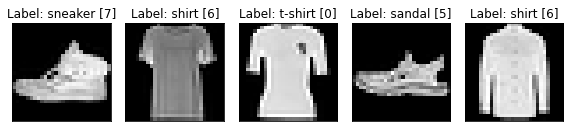

In [4]:
### Plot some sample
label_names=['t-shirt','trouser','pullover','dress','coat','sandal','shirt',
             'sneaker','bag','boot']
fig, axs = plt.subplots(1, 5, figsize=(8,8))
for ax in axs.flatten():
    # random.choice allows to randomly sample from a list-like object (basically anything that can be accessed with an index, like our dataset)
    img, label = random.choice(train_dataset)
    ax.imshow(np.array(img), cmap='gist_gray')
    ax.set_title(f'Label: {label_names[label]} [{label}]')
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('./Img/clothe_samples.svg', format='svg')
plt.tight_layout()

In [5]:
# In this case the train_transform and test_transform are the same, 
# but we keep them separate for potential future updates
train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

### Define train dataloader
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
### Define test dataloader
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [6]:
batch_data, batch_labels = next(iter(train_dataloader))
print(f"TRAIN BATCH SHAPE")
print(f"\t Data: {batch_data.shape}")
print(f"\t Labels: {batch_labels.shape}")

batch_data, batch_labels = next(iter(test_dataloader))
print(f"TEST BATCH SHAPE")
print(f"\t Data: {batch_data.shape}")
print(f"\t Labels: {batch_labels.shape}")

TRAIN BATCH SHAPE
	 Data: torch.Size([256, 1, 28, 28])
	 Labels: torch.Size([256])
TEST BATCH SHAPE
	 Data: torch.Size([256, 1, 28, 28])
	 Labels: torch.Size([256])


# Implement autoencoder

**2 pt - Implement and test (convolutional) autoencoder, reporting the trend of reconstruction loss and some examples of image reconstruction; explore advanced optimizers and regularization methods**


In [7]:
encoded_space_dim = 2
max_epochs        = 10
learning_rate     = 1e-3
regularization    = 0.


In [8]:
# Initialize the autoencoder
AE = model.Autoencoder(encoded_space_dim)


In [9]:
### Define the loss function for reconstruction
loss_fn = nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': AE.encoder.parameters()},
    {'params': AE.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
AE.to(device)


Selected device: cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (8): ReLU(inplac

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH 1/10
AVERAGE TRAIN LOSS: 0.09352531284093857
AVERAGE TEST LOSS: 0.04421302676200867


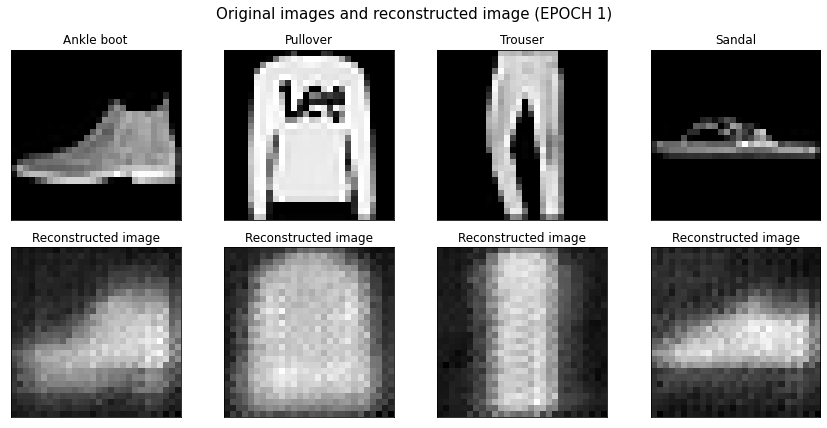

 10%|█         | 1/10 [00:25<03:47, 25.22s/it]

EPOCH 2/10
AVERAGE TRAIN LOSS: 0.0408201739192009


 20%|██        | 2/10 [00:49<03:18, 24.82s/it]

AVERAGE TEST LOSS: 0.038555633276700974
EPOCH 3/10
AVERAGE TRAIN LOSS: 0.03699951991438866


 30%|███       | 3/10 [01:14<02:54, 24.89s/it]

AVERAGE TEST LOSS: 0.03600844740867615
EPOCH 4/10
AVERAGE TRAIN LOSS: 0.03513478860259056


 40%|████      | 4/10 [01:38<02:27, 24.52s/it]

AVERAGE TEST LOSS: 0.03471613675355911
EPOCH 5/10
AVERAGE TRAIN LOSS: 0.034103889018297195


 50%|█████     | 5/10 [02:02<02:01, 24.21s/it]

AVERAGE TEST LOSS: 0.03409736976027489
EPOCH 6/10
AVERAGE TRAIN LOSS: 0.0333879292011261
AVERAGE TEST LOSS: 0.03327097371220589


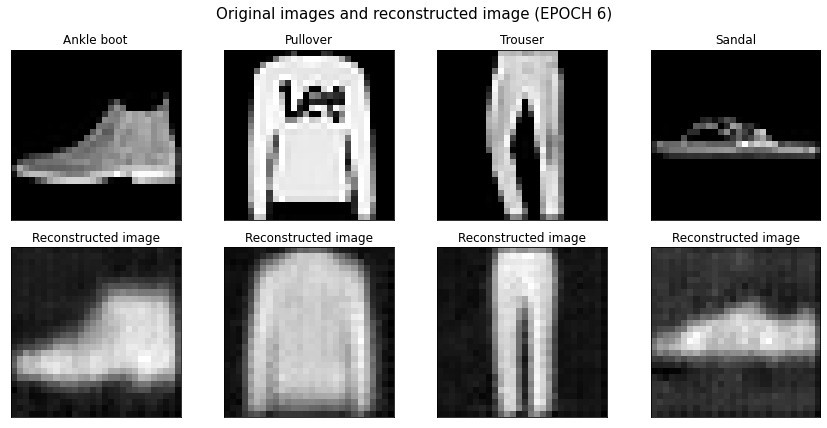

 60%|██████    | 6/10 [02:28<01:38, 24.74s/it]

EPOCH 7/10
AVERAGE TRAIN LOSS: 0.03276354819536209


 70%|███████   | 7/10 [02:52<01:14, 24.77s/it]

AVERAGE TEST LOSS: 0.032610319554805756
EPOCH 8/10
AVERAGE TRAIN LOSS: 0.03211339935660362


 80%|████████  | 8/10 [03:18<00:49, 24.95s/it]

AVERAGE TEST LOSS: 0.03195946663618088
EPOCH 9/10
AVERAGE TRAIN LOSS: 0.0316300243139267


 90%|█████████ | 9/10 [03:42<00:24, 24.72s/it]

AVERAGE TEST LOSS: 0.03170430660247803
EPOCH 10/10
AVERAGE TRAIN LOSS: 0.031196417286992073


100%|██████████| 10/10 [04:07<00:00, 24.75s/it]

AVERAGE TEST LOSS: 0.031180649995803833


In [10]:
train_loss, test_loss = AE.training_cycle(device,
                                train_dataloader,
                                test_dataloader,
                                loss_fn,
                                optim,
                                max_epochs,
                                test_dataset,
                                encoded_space_dim,
                                plot = True,
                                keep_plots = False,
                                keep_model=False,
                                verbose=True)

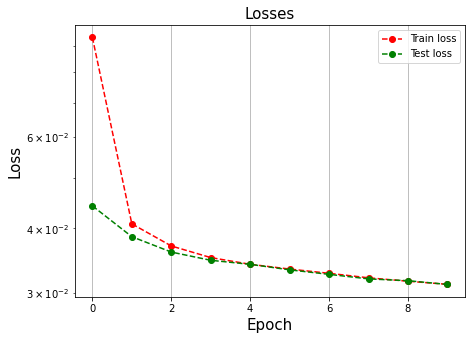

In [11]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train_loss, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test_loss, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('./imgs/classification/losses.svg', format='svg')
plt.show()

# Optimize autoencoder parameters

**1 pt - optimize hyperparameters using grid/random search or automatic tuning tools (e.g., Optuna)**

In [12]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')


Selected device: cpu


In [14]:
def objective(trial):
    max_epochs = 8
    
    # Parameters for the search
    encoded_space_dim      = trial.suggest_categorical("encoded_space_dim", [2,10])
    optimizer_name         = trial.suggest_categorical('optimizer_name',["SGD", "Adam"])
    lr                     = trial.suggest_loguniform("lr", 1e-5, 1e-1)
    regularization         = trial.suggest_loguniform("regularization", 1e-5, 1e-1)
    
    
    ### Initialize both network
    AE = model.Autoencoder(encoded_space_dim)
    AE.to(device)
 
    
    ### Define the loss function
    loss_fn = nn.MSELoss()
    
    
    #Define the optimizer
    optimizer = getattr(torch.optim,optimizer_name)(AE.parameters(), lr=lr, weight_decay=regularization)
    
    #The bad thing of this simple approach is that we only consider the last epoch test loss as the valid one.
    train, test = AE.training_cycle(device,
                                train_dataloader,
                                test_dataloader,
                                loss_fn,
                                optimizer,
                                max_epochs,
                                test_dataset,
                                encoded_space_dim,
                                plot = False,
                                keep_plots = False,
                                keep_model=False,
                                verbose=False)
 
    return test[-1]

In [15]:
#Define the study
study = optuna.create_study(study_name="no_pruning", direction="minimize")
study.optimize(objective, n_trials=100, timeout=21600) #6 hours

[I 2022-07-02 21:00:23,147] A new study created in memory with name: no_pruning
  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.3576478064060211


 12%|█▎        | 1/8 [00:19<02:17, 19.69s/it]

AVERAGE TEST LOSS: 0.3469625413417816
AVERAGE TRAIN LOSS: 0.33972010016441345


 25%|██▌       | 2/8 [00:42<02:09, 21.61s/it]

AVERAGE TEST LOSS: 0.3297361731529236
AVERAGE TRAIN LOSS: 0.3230876624584198


 38%|███▊      | 3/8 [01:05<01:50, 22.06s/it]

AVERAGE TEST LOSS: 0.3138495981693268
AVERAGE TRAIN LOSS: 0.30775460600852966


 50%|█████     | 4/8 [01:30<01:32, 23.23s/it]

AVERAGE TEST LOSS: 0.29919862747192383
AVERAGE TRAIN LOSS: 0.29366642236709595


 62%|██████▎   | 5/8 [01:54<01:11, 23.70s/it]

AVERAGE TEST LOSS: 0.2856844365596771
AVERAGE TRAIN LOSS: 0.28065237402915955


 75%|███████▌  | 6/8 [02:20<00:48, 24.46s/it]

AVERAGE TEST LOSS: 0.2732201814651489
AVERAGE TRAIN LOSS: 0.26869019865989685


 88%|████████▊ | 7/8 [02:49<00:25, 25.84s/it]

AVERAGE TEST LOSS: 0.2617221176624298
AVERAGE TRAIN LOSS: 0.25757306814193726


100%|██████████| 8/8 [03:15<00:00, 24.49s/it]
[I 2022-07-02 21:03:39,058] Trial 0 finished with value: 0.2511177957057953 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'SGD', 'lr': 8.210896978156658e-05, 'regularization': 4.015283409318722e-05}. Best is trial 0 with value: 0.2511177957057953.


AVERAGE TEST LOSS: 0.2511177957057953


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.1272106170654297


 12%|█▎        | 1/8 [00:24<02:53, 24.83s/it]

AVERAGE TEST LOSS: 0.12358884513378143
AVERAGE TRAIN LOSS: 0.12452282011508942


 25%|██▌       | 2/8 [00:45<02:13, 22.25s/it]

AVERAGE TEST LOSS: 0.12386941909790039
AVERAGE TRAIN LOSS: 0.12468800693750381


 38%|███▊      | 3/8 [01:05<01:46, 21.25s/it]

AVERAGE TEST LOSS: 0.12391166388988495
AVERAGE TRAIN LOSS: 0.12470831722021103


 50%|█████     | 4/8 [01:28<01:28, 22.09s/it]

AVERAGE TEST LOSS: 0.12402210384607315
AVERAGE TRAIN LOSS: 0.12471263110637665


 62%|██████▎   | 5/8 [01:49<01:05, 21.68s/it]

AVERAGE TEST LOSS: 0.12396923452615738
AVERAGE TRAIN LOSS: 0.124714694917202


 75%|███████▌  | 6/8 [02:13<00:44, 22.32s/it]

AVERAGE TEST LOSS: 0.12397067248821259
AVERAGE TRAIN LOSS: 0.12475930899381638


 88%|████████▊ | 7/8 [02:41<00:24, 24.39s/it]

AVERAGE TEST LOSS: 0.12389151751995087
AVERAGE TRAIN LOSS: 0.12471863627433777


100%|██████████| 8/8 [03:09<00:00, 23.64s/it]
[I 2022-07-02 21:06:48,163] Trial 1 finished with value: 0.12393204867839813 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0869157174634721, 'regularization': 0.07004575350104551}. Best is trial 1 with value: 0.12393204867839813.


AVERAGE TEST LOSS: 0.12393204867839813


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.13637138903141022


 12%|█▎        | 1/8 [00:20<02:23, 20.51s/it]

AVERAGE TEST LOSS: 0.1354554295539856
AVERAGE TRAIN LOSS: 0.13627217710018158


 25%|██▌       | 2/8 [00:40<02:02, 20.47s/it]

AVERAGE TEST LOSS: 0.13533954322338104
AVERAGE TRAIN LOSS: 0.13615766167640686


 38%|███▊      | 3/8 [01:01<01:41, 20.28s/it]

AVERAGE TEST LOSS: 0.13522501289844513
AVERAGE TRAIN LOSS: 0.13604359328746796


 50%|█████     | 4/8 [01:22<01:22, 20.74s/it]

AVERAGE TEST LOSS: 0.1351117193698883
AVERAGE TRAIN LOSS: 0.1359247863292694


 62%|██████▎   | 5/8 [01:42<01:01, 20.58s/it]

AVERAGE TEST LOSS: 0.13499972224235535
AVERAGE TRAIN LOSS: 0.13581739366054535


 75%|███████▌  | 6/8 [02:03<00:41, 20.58s/it]

AVERAGE TEST LOSS: 0.13488894701004028
AVERAGE TRAIN LOSS: 0.1357208788394928


 88%|████████▊ | 7/8 [02:23<00:20, 20.48s/it]

AVERAGE TEST LOSS: 0.1347794085741043
AVERAGE TRAIN LOSS: 0.13560326397418976


100%|██████████| 8/8 [02:43<00:00, 20.45s/it]
[I 2022-07-02 21:09:31,739] Trial 2 finished with value: 0.13467106223106384 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 1.1061070495459877e-05, 'regularization': 0.05596077435805609}. Best is trial 1 with value: 0.12393204867839813.


AVERAGE TEST LOSS: 0.13467106223106384


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12468058615922928


 12%|█▎        | 1/8 [00:22<02:38, 22.70s/it]

AVERAGE TEST LOSS: 0.1239025741815567
AVERAGE TRAIN LOSS: 0.12465020269155502


 25%|██▌       | 2/8 [00:45<02:16, 22.73s/it]

AVERAGE TEST LOSS: 0.12386504560709
AVERAGE TRAIN LOSS: 0.1246480718255043


 38%|███▊      | 3/8 [01:10<01:59, 23.99s/it]

AVERAGE TEST LOSS: 0.12386853992938995
AVERAGE TRAIN LOSS: 0.12465909123420715


 50%|█████     | 4/8 [02:03<02:21, 35.46s/it]

AVERAGE TEST LOSS: 0.12387292087078094
AVERAGE TRAIN LOSS: 0.12464366108179092


 62%|██████▎   | 5/8 [02:40<01:47, 35.69s/it]

AVERAGE TEST LOSS: 0.12387970834970474
AVERAGE TRAIN LOSS: 0.12466154247522354


 75%|███████▌  | 6/8 [03:23<01:16, 38.26s/it]

AVERAGE TEST LOSS: 0.12387039512395859
AVERAGE TRAIN LOSS: 0.12465885281562805


 88%|████████▊ | 7/8 [04:14<00:42, 42.34s/it]

AVERAGE TEST LOSS: 0.12386734783649445
AVERAGE TRAIN LOSS: 0.12467294931411743


100%|██████████| 8/8 [05:17<00:00, 39.73s/it]
[I 2022-07-02 21:14:49,577] Trial 3 finished with value: 0.12386883795261383 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.004535431560197775, 'regularization': 0.027737949731314902}. Best is trial 3 with value: 0.12386883795261383.


AVERAGE TEST LOSS: 0.12386883795261383


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12271525710821152


 12%|█▎        | 1/8 [00:25<02:58, 25.46s/it]

AVERAGE TEST LOSS: 0.12178023159503937
AVERAGE TRAIN LOSS: 0.12252442538738251


 25%|██▌       | 2/8 [00:49<02:27, 24.59s/it]

AVERAGE TEST LOSS: 0.122056744992733
AVERAGE TRAIN LOSS: 0.12257859855890274


 38%|███▊      | 3/8 [01:17<02:11, 26.33s/it]

AVERAGE TEST LOSS: 0.12159977108240128
AVERAGE TRAIN LOSS: 0.12249502539634705


 50%|█████     | 4/8 [02:13<02:32, 38.08s/it]

AVERAGE TEST LOSS: 0.12169961631298065
AVERAGE TRAIN LOSS: 0.1225280612707138


 62%|██████▎   | 5/8 [03:10<02:14, 44.78s/it]

AVERAGE TEST LOSS: 0.12355053424835205
AVERAGE TRAIN LOSS: 0.12257082015275955


 75%|███████▌  | 6/8 [03:40<01:19, 39.75s/it]

AVERAGE TEST LOSS: 0.12171681225299835
AVERAGE TRAIN LOSS: 0.1225319430232048


 88%|████████▊ | 7/8 [04:10<00:36, 36.54s/it]

AVERAGE TEST LOSS: 0.12176625430583954
AVERAGE TRAIN LOSS: 0.1224956288933754


100%|██████████| 8/8 [04:39<00:00, 34.97s/it]
[I 2022-07-02 21:19:29,366] Trial 4 finished with value: 0.121596559882164 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.03786578347268075, 'regularization': 0.012524978887729143}. Best is trial 4 with value: 0.121596559882164.


AVERAGE TEST LOSS: 0.121596559882164


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12493732571601868


 12%|█▎        | 1/8 [00:23<02:42, 23.16s/it]

AVERAGE TEST LOSS: 0.1241735965013504
AVERAGE TRAIN LOSS: 0.12490203231573105


 25%|██▌       | 2/8 [00:53<02:43, 27.32s/it]

AVERAGE TEST LOSS: 0.12416677176952362
AVERAGE TRAIN LOSS: 0.1248944029211998


 38%|███▊      | 3/8 [01:18<02:12, 26.47s/it]

AVERAGE TEST LOSS: 0.1241602674126625
AVERAGE TRAIN LOSS: 0.1249224990606308


 50%|█████     | 4/8 [01:41<01:39, 24.84s/it]

AVERAGE TEST LOSS: 0.12415405362844467
AVERAGE TRAIN LOSS: 0.12490661442279816


 62%|██████▎   | 5/8 [02:05<01:14, 24.71s/it]

AVERAGE TEST LOSS: 0.12414805591106415
AVERAGE TRAIN LOSS: 0.12490256875753403


 75%|███████▌  | 6/8 [02:28<00:47, 23.95s/it]

AVERAGE TEST LOSS: 0.12414231151342392
AVERAGE TRAIN LOSS: 0.12490832060575485


 88%|████████▊ | 7/8 [02:49<00:23, 23.22s/it]

AVERAGE TEST LOSS: 0.12413680553436279
AVERAGE TRAIN LOSS: 0.12489042431116104


100%|██████████| 8/8 [03:13<00:00, 24.21s/it]
[I 2022-07-02 21:22:43,048] Trial 5 finished with value: 0.12413151562213898 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 4.5266246227125816e-05, 'regularization': 0.006296641021296669}. Best is trial 4 with value: 0.121596559882164.


AVERAGE TEST LOSS: 0.12413151562213898


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.057834040373563766


 12%|█▎        | 1/8 [00:26<03:07, 26.74s/it]

AVERAGE TEST LOSS: 0.037103600800037384
AVERAGE TRAIN LOSS: 0.03561287745833397


 25%|██▌       | 2/8 [00:52<02:36, 26.11s/it]

AVERAGE TEST LOSS: 0.034661564975976944
AVERAGE TRAIN LOSS: 0.03403853997588158


 38%|███▊      | 3/8 [01:17<02:08, 25.69s/it]

AVERAGE TEST LOSS: 0.03390774875879288
AVERAGE TRAIN LOSS: 0.03327084332704544


 50%|█████     | 4/8 [01:43<01:43, 25.94s/it]

AVERAGE TEST LOSS: 0.033131398260593414
AVERAGE TRAIN LOSS: 0.03254061937332153


 62%|██████▎   | 5/8 [02:09<01:17, 25.79s/it]

AVERAGE TEST LOSS: 0.032475367188453674
AVERAGE TRAIN LOSS: 0.03186453506350517


 75%|███████▌  | 6/8 [02:33<00:50, 25.19s/it]

AVERAGE TEST LOSS: 0.031487978994846344
AVERAGE TRAIN LOSS: 0.031218871474266052


 88%|████████▊ | 7/8 [03:03<00:26, 26.72s/it]

AVERAGE TEST LOSS: 0.03162471204996109
AVERAGE TRAIN LOSS: 0.030852286145091057


100%|██████████| 8/8 [03:39<00:00, 27.43s/it]
[I 2022-07-02 21:26:22,505] Trial 6 finished with value: 0.030845869332551956 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0024509278030644312, 'regularization': 1.9665999738021947e-05}. Best is trial 6 with value: 0.030845869332551956.


AVERAGE TEST LOSS: 0.030845869332551956


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12445195019245148


 12%|█▎        | 1/8 [00:23<02:44, 23.50s/it]

AVERAGE TEST LOSS: 0.12365901470184326
AVERAGE TRAIN LOSS: 0.12437953799962997


 25%|██▌       | 2/8 [00:45<02:15, 22.52s/it]

AVERAGE TEST LOSS: 0.12364015728235245
AVERAGE TRAIN LOSS: 0.1243891790509224


 38%|███▊      | 3/8 [01:06<01:49, 21.90s/it]

AVERAGE TEST LOSS: 0.12362222373485565
AVERAGE TRAIN LOSS: 0.12435726076364517


 50%|█████     | 4/8 [01:27<01:26, 21.63s/it]

AVERAGE TEST LOSS: 0.12360458076000214
AVERAGE TRAIN LOSS: 0.12436185777187347


 62%|██████▎   | 5/8 [01:49<01:05, 21.67s/it]

AVERAGE TEST LOSS: 0.12358713150024414
AVERAGE TRAIN LOSS: 0.12433979660272598


 75%|███████▌  | 6/8 [02:10<00:43, 21.53s/it]

AVERAGE TEST LOSS: 0.12356994301080704
AVERAGE TRAIN LOSS: 0.12432252615690231


 88%|████████▊ | 7/8 [02:31<00:21, 21.42s/it]

AVERAGE TEST LOSS: 0.1235528439283371
AVERAGE TRAIN LOSS: 0.12431053817272186


100%|██████████| 8/8 [02:52<00:00, 21.62s/it]
[I 2022-07-02 21:29:15,494] Trial 7 finished with value: 0.1235358938574791 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0006239475147326141, 'regularization': 6.112447237611185e-05}. Best is trial 6 with value: 0.030845869332551956.


AVERAGE TEST LOSS: 0.1235358938574791


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.13660858571529388


 12%|█▎        | 1/8 [00:21<02:31, 21.59s/it]

AVERAGE TEST LOSS: 0.12403770536184311
AVERAGE TRAIN LOSS: 0.1247292086482048


 25%|██▌       | 2/8 [00:42<02:08, 21.43s/it]

AVERAGE TEST LOSS: 0.1239219456911087
AVERAGE TRAIN LOSS: 0.12471096217632294


 38%|███▊      | 3/8 [01:04<01:46, 21.34s/it]

AVERAGE TEST LOSS: 0.12390782684087753
AVERAGE TRAIN LOSS: 0.12464995682239532


 50%|█████     | 4/8 [01:26<01:26, 21.60s/it]

AVERAGE TEST LOSS: 0.12389377504587173
AVERAGE TRAIN LOSS: 0.12464302778244019


 62%|██████▎   | 5/8 [01:47<01:04, 21.57s/it]

AVERAGE TEST LOSS: 0.12389756739139557
AVERAGE TRAIN LOSS: 0.124636709690094


 75%|███████▌  | 6/8 [02:08<00:42, 21.35s/it]

AVERAGE TEST LOSS: 0.1238928809762001
AVERAGE TRAIN LOSS: 0.12466531246900558


 88%|████████▊ | 7/8 [02:29<00:21, 21.20s/it]

AVERAGE TEST LOSS: 0.12388579547405243
AVERAGE TRAIN LOSS: 0.12465965002775192


100%|██████████| 8/8 [02:51<00:00, 21.38s/it]
[I 2022-07-02 21:32:06,584] Trial 8 finished with value: 0.12387605011463165 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.01707760703863121, 'regularization': 0.039949099855397414}. Best is trial 6 with value: 0.030845869332551956.


AVERAGE TEST LOSS: 0.12387605011463165


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0998741090297699


 12%|█▎        | 1/8 [00:21<02:28, 21.28s/it]

AVERAGE TEST LOSS: 0.08740793168544769
AVERAGE TRAIN LOSS: 0.08775807172060013


 25%|██▌       | 2/8 [00:42<02:06, 21.16s/it]

AVERAGE TEST LOSS: 0.0870039239525795
AVERAGE TRAIN LOSS: 0.08764900267124176


 38%|███▊      | 3/8 [01:04<01:48, 21.76s/it]

AVERAGE TEST LOSS: 0.08831954002380371
AVERAGE TRAIN LOSS: 0.08770863711833954


 50%|█████     | 4/8 [01:28<01:30, 22.63s/it]

AVERAGE TEST LOSS: 0.08691301941871643
AVERAGE TRAIN LOSS: 0.08773217350244522


 62%|██████▎   | 5/8 [01:52<01:09, 23.19s/it]

AVERAGE TEST LOSS: 0.08693446218967438
AVERAGE TRAIN LOSS: 0.08786480128765106


 75%|███████▌  | 6/8 [02:16<00:46, 23.20s/it]

AVERAGE TEST LOSS: 0.0876680463552475
AVERAGE TRAIN LOSS: 0.08768065273761749


 88%|████████▊ | 7/8 [02:41<00:23, 24.00s/it]

AVERAGE TEST LOSS: 0.08714751899242401
AVERAGE TRAIN LOSS: 0.08768250793218613


100%|██████████| 8/8 [03:10<00:00, 23.87s/it]
[I 2022-07-02 21:35:17,559] Trial 9 finished with value: 0.08696399629116058 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.029740346952627072, 'regularization': 0.00024404433639723666}. Best is trial 6 with value: 0.030845869332551956.


AVERAGE TEST LOSS: 0.08696399629116058


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06654679775238037


 12%|█▎        | 1/8 [00:23<02:44, 23.45s/it]

AVERAGE TEST LOSS: 0.0389469675719738
AVERAGE TRAIN LOSS: 0.036949969828128815


 25%|██▌       | 2/8 [00:45<02:16, 22.83s/it]

AVERAGE TEST LOSS: 0.035673078149557114
AVERAGE TRAIN LOSS: 0.034943293780088425


 38%|███▊      | 3/8 [01:08<01:53, 22.69s/it]

AVERAGE TEST LOSS: 0.03426523879170418
AVERAGE TRAIN LOSS: 0.0337442122399807


 50%|█████     | 4/8 [01:30<01:29, 22.30s/it]

AVERAGE TEST LOSS: 0.03348066285252571
AVERAGE TRAIN LOSS: 0.03289828076958656


 62%|██████▎   | 5/8 [01:52<01:07, 22.41s/it]

AVERAGE TEST LOSS: 0.03289617970585823
AVERAGE TRAIN LOSS: 0.03228137642145157


 75%|███████▌  | 6/8 [02:14<00:44, 22.17s/it]

AVERAGE TEST LOSS: 0.03205905109643936
AVERAGE TRAIN LOSS: 0.03176765516400337


 88%|████████▊ | 7/8 [02:36<00:22, 22.09s/it]

AVERAGE TEST LOSS: 0.03165040910243988
AVERAGE TRAIN LOSS: 0.03140215948224068


100%|██████████| 8/8 [03:00<00:00, 22.53s/it]
[I 2022-07-02 21:38:17,841] Trial 10 finished with value: 0.03168196976184845 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0009069441389952786, 'regularization': 1.1918159832380177e-05}. Best is trial 6 with value: 0.030845869332551956.


AVERAGE TEST LOSS: 0.03168196976184845


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08082035183906555


 12%|█▎        | 1/8 [00:21<02:29, 21.34s/it]

AVERAGE TEST LOSS: 0.04267245531082153
AVERAGE TRAIN LOSS: 0.03898319602012634


 25%|██▌       | 2/8 [00:42<02:08, 21.40s/it]

AVERAGE TEST LOSS: 0.036291588097810745
AVERAGE TRAIN LOSS: 0.035069528967142105


 38%|███▊      | 3/8 [01:04<01:47, 21.58s/it]

AVERAGE TEST LOSS: 0.03426073119044304
AVERAGE TRAIN LOSS: 0.03353552147746086


 50%|█████     | 4/8 [01:25<01:26, 21.52s/it]

AVERAGE TEST LOSS: 0.033017829060554504
AVERAGE TRAIN LOSS: 0.03250100836157799


 62%|██████▎   | 5/8 [01:47<01:04, 21.65s/it]

AVERAGE TEST LOSS: 0.032084934413433075
AVERAGE TRAIN LOSS: 0.03171597421169281


 75%|███████▌  | 6/8 [02:10<00:43, 21.90s/it]

AVERAGE TEST LOSS: 0.03149931877851486
AVERAGE TRAIN LOSS: 0.031192054972052574


 88%|████████▊ | 7/8 [02:37<00:23, 23.60s/it]

AVERAGE TEST LOSS: 0.031006067991256714
AVERAGE TRAIN LOSS: 0.030786791816353798


100%|██████████| 8/8 [03:02<00:00, 22.75s/it]
[I 2022-07-02 21:41:19,893] Trial 11 finished with value: 0.030727839097380638 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0010557304853044788, 'regularization': 1.1220583772733681e-05}. Best is trial 11 with value: 0.030727839097380638.


AVERAGE TEST LOSS: 0.030727839097380638


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.07328380644321442


 12%|█▎        | 1/8 [00:21<02:31, 21.65s/it]

AVERAGE TEST LOSS: 0.03714034706354141
AVERAGE TRAIN LOSS: 0.03539657965302467


 25%|██▌       | 2/8 [00:43<02:11, 21.98s/it]

AVERAGE TEST LOSS: 0.03412751108407974
AVERAGE TRAIN LOSS: 0.03350113332271576


 38%|███▊      | 3/8 [01:05<01:48, 21.77s/it]

AVERAGE TEST LOSS: 0.033267535269260406
AVERAGE TRAIN LOSS: 0.032146330922842026


 50%|█████     | 4/8 [01:27<01:27, 21.78s/it]

AVERAGE TEST LOSS: 0.03226295858621597
AVERAGE TRAIN LOSS: 0.03138457611203194


 62%|██████▎   | 5/8 [01:48<01:05, 21.68s/it]

AVERAGE TEST LOSS: 0.03148837387561798
AVERAGE TRAIN LOSS: 0.030742624774575233


 75%|███████▌  | 6/8 [02:10<00:43, 21.75s/it]

AVERAGE TEST LOSS: 0.03093741275370121
AVERAGE TRAIN LOSS: 0.030410002917051315


 88%|████████▊ | 7/8 [02:35<00:22, 22.75s/it]

AVERAGE TEST LOSS: 0.030361467972397804
AVERAGE TRAIN LOSS: 0.030063914135098457


100%|██████████| 8/8 [03:03<00:00, 22.98s/it]
[I 2022-07-02 21:44:23,727] Trial 12 finished with value: 0.03049146570265293 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.004699615014654472, 'regularization': 1.0089643431531974e-05}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03049146570265293


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.10900622606277466


 12%|█▎        | 1/8 [00:21<02:32, 21.81s/it]

AVERAGE TEST LOSS: 0.07668669521808624
AVERAGE TRAIN LOSS: 0.052073512226343155


 25%|██▌       | 2/8 [00:43<02:10, 21.71s/it]

AVERAGE TEST LOSS: 0.042122483253479004
AVERAGE TRAIN LOSS: 0.040350861847400665


 38%|███▊      | 3/8 [01:05<01:48, 21.68s/it]

AVERAGE TEST LOSS: 0.03899319842457771
AVERAGE TRAIN LOSS: 0.03831886872649193


 50%|█████     | 4/8 [01:26<01:26, 21.56s/it]

AVERAGE TEST LOSS: 0.03779389336705208
AVERAGE TRAIN LOSS: 0.03728250786662102


 62%|██████▎   | 5/8 [01:47<01:04, 21.52s/it]

AVERAGE TEST LOSS: 0.03683288022875786
AVERAGE TRAIN LOSS: 0.036512188613414764


 75%|███████▌  | 6/8 [02:09<00:43, 21.59s/it]

AVERAGE TEST LOSS: 0.03623272851109505
AVERAGE TRAIN LOSS: 0.03592592850327492


 88%|████████▊ | 7/8 [02:31<00:21, 21.65s/it]

AVERAGE TEST LOSS: 0.03589383140206337
AVERAGE TRAIN LOSS: 0.035563115030527115


100%|██████████| 8/8 [02:53<00:00, 21.72s/it]
[I 2022-07-02 21:47:17,473] Trial 13 finished with value: 0.03540673851966858 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0002752864827522732, 'regularization': 0.00024083367597429727}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03540673851966858


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.09639376401901245


 12%|█▎        | 1/8 [00:21<02:28, 21.28s/it]

AVERAGE TEST LOSS: 0.08767272531986237
AVERAGE TRAIN LOSS: 0.08817357569932938


 25%|██▌       | 2/8 [00:46<02:21, 23.52s/it]

AVERAGE TEST LOSS: 0.08760298788547516
AVERAGE TRAIN LOSS: 0.08826802670955658


 38%|███▊      | 3/8 [01:09<01:57, 23.56s/it]

AVERAGE TEST LOSS: 0.08753521740436554
AVERAGE TRAIN LOSS: 0.08813745528459549


 50%|█████     | 4/8 [01:35<01:37, 24.34s/it]

AVERAGE TEST LOSS: 0.08758725970983505
AVERAGE TRAIN LOSS: 0.08822284638881683


 62%|██████▎   | 5/8 [01:58<01:11, 23.97s/it]

AVERAGE TEST LOSS: 0.08847491443157196
AVERAGE TRAIN LOSS: 0.08810778707265854


 75%|███████▌  | 6/8 [02:22<00:47, 23.96s/it]

AVERAGE TEST LOSS: 0.08842436969280243
AVERAGE TRAIN LOSS: 0.08810241520404816


 88%|████████▊ | 7/8 [02:50<00:25, 25.29s/it]

AVERAGE TEST LOSS: 0.08750118315219879
AVERAGE TRAIN LOSS: 0.08815813809633255


100%|██████████| 8/8 [03:23<00:00, 25.45s/it]
[I 2022-07-02 21:50:41,138] Trial 14 finished with value: 0.08752486854791641 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.00527860437541984, 'regularization': 0.0015491892766002372}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.08752486854791641


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06073010340332985


 12%|█▎        | 1/8 [00:21<02:31, 21.65s/it]

AVERAGE TEST LOSS: 0.0387272983789444
AVERAGE TRAIN LOSS: 0.037440165877342224


 25%|██▌       | 2/8 [00:43<02:09, 21.57s/it]

AVERAGE TEST LOSS: 0.03629491105675697
AVERAGE TRAIN LOSS: 0.0372416228055954


 38%|███▊      | 3/8 [01:04<01:48, 21.64s/it]

AVERAGE TEST LOSS: 0.03529999405145645
AVERAGE TRAIN LOSS: 0.03436330333352089


 50%|█████     | 4/8 [01:27<01:27, 21.83s/it]

AVERAGE TEST LOSS: 0.0340503565967083
AVERAGE TRAIN LOSS: 0.03448192775249481


 62%|██████▎   | 5/8 [01:48<01:05, 21.77s/it]

AVERAGE TEST LOSS: 0.03363339975476265
AVERAGE TRAIN LOSS: 0.033196981996297836


 75%|███████▌  | 6/8 [02:10<00:43, 21.87s/it]

AVERAGE TEST LOSS: 0.03282582759857178
AVERAGE TRAIN LOSS: 0.032693613320589066


 88%|████████▊ | 7/8 [02:35<00:22, 22.95s/it]

AVERAGE TEST LOSS: 0.032554805278778076
AVERAGE TRAIN LOSS: 0.03268270939588547


100%|██████████| 8/8 [03:07<00:00, 23.41s/it]
[I 2022-07-02 21:53:48,467] Trial 15 finished with value: 0.032361388206481934 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.009292077123652626, 'regularization': 0.00016146170403928217}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.032361388206481934


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.10469384491443634


 12%|█▎        | 1/8 [00:21<02:31, 21.63s/it]

AVERAGE TEST LOSS: 0.0677255392074585
AVERAGE TRAIN LOSS: 0.06247716769576073


 25%|██▌       | 2/8 [00:43<02:09, 21.53s/it]

AVERAGE TEST LOSS: 0.04789647459983826
AVERAGE TRAIN LOSS: 0.04336555302143097


 38%|███▊      | 3/8 [01:04<01:47, 21.53s/it]

AVERAGE TEST LOSS: 0.041130803525447845
AVERAGE TRAIN LOSS: 0.04033482074737549


 50%|█████     | 4/8 [01:26<01:26, 21.54s/it]

AVERAGE TEST LOSS: 0.039731211960315704
AVERAGE TRAIN LOSS: 0.03947503864765167


 62%|██████▎   | 5/8 [01:47<01:04, 21.56s/it]

AVERAGE TEST LOSS: 0.0392288975417614
AVERAGE TRAIN LOSS: 0.039038922637701035


 75%|███████▌  | 6/8 [02:09<00:43, 21.54s/it]

AVERAGE TEST LOSS: 0.03888740390539169
AVERAGE TRAIN LOSS: 0.03877703845500946


 88%|████████▊ | 7/8 [02:31<00:21, 21.77s/it]

AVERAGE TEST LOSS: 0.038632337003946304
AVERAGE TRAIN LOSS: 0.03856886923313141


100%|██████████| 8/8 [02:57<00:00, 22.14s/it]
[I 2022-07-02 21:56:45,582] Trial 16 finished with value: 0.038525503128767014 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.00032342373552511936, 'regularization': 0.0009507642088434514}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.038525503128767014


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.10290233045816422


 12%|█▎        | 1/8 [00:21<02:32, 21.72s/it]

AVERAGE TEST LOSS: 0.03973403573036194
AVERAGE TRAIN LOSS: 0.037275657057762146


 25%|██▌       | 2/8 [00:43<02:10, 21.77s/it]

AVERAGE TEST LOSS: 0.03564644977450371
AVERAGE TRAIN LOSS: 0.03465507924556732


 38%|███▊      | 3/8 [01:04<01:47, 21.60s/it]

AVERAGE TEST LOSS: 0.03415106609463692
AVERAGE TRAIN LOSS: 0.0334894061088562


 50%|█████     | 4/8 [01:27<01:28, 22.05s/it]

AVERAGE TEST LOSS: 0.0331539586186409
AVERAGE TRAIN LOSS: 0.03263476490974426


 62%|██████▎   | 5/8 [01:49<01:06, 22.05s/it]

AVERAGE TEST LOSS: 0.032525621354579926
AVERAGE TRAIN LOSS: 0.03196052461862564


 75%|███████▌  | 6/8 [02:11<00:43, 21.97s/it]

AVERAGE TEST LOSS: 0.031848274171352386
AVERAGE TRAIN LOSS: 0.03146098926663399


 88%|████████▊ | 7/8 [02:35<00:22, 22.78s/it]

AVERAGE TEST LOSS: 0.03185904026031494
AVERAGE TRAIN LOSS: 0.031064394861459732


100%|██████████| 8/8 [03:04<00:00, 23.12s/it]
[I 2022-07-02 21:59:50,538] Trial 17 finished with value: 0.03108508512377739 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0017449768022730118, 'regularization': 5.5620232890213766e-05}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03108508512377739


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.15052489936351776


 12%|█▎        | 1/8 [00:21<02:30, 21.45s/it]

AVERAGE TEST LOSS: 0.07710306346416473
AVERAGE TRAIN LOSS: 0.06414102762937546


 25%|██▌       | 2/8 [00:42<02:08, 21.41s/it]

AVERAGE TEST LOSS: 0.051330871880054474
AVERAGE TRAIN LOSS: 0.0460360012948513


 38%|███▊      | 3/8 [01:04<01:48, 21.65s/it]

AVERAGE TEST LOSS: 0.04280523583292961
AVERAGE TRAIN LOSS: 0.04110829532146454


 50%|█████     | 4/8 [01:26<01:26, 21.69s/it]

AVERAGE TEST LOSS: 0.03987143188714981
AVERAGE TRAIN LOSS: 0.03900216519832611


 62%|██████▎   | 5/8 [01:48<01:05, 21.68s/it]

AVERAGE TEST LOSS: 0.0383339449763298
AVERAGE TRAIN LOSS: 0.03774634003639221


 75%|███████▌  | 6/8 [02:10<00:43, 21.90s/it]

AVERAGE TEST LOSS: 0.03735004737973213
AVERAGE TRAIN LOSS: 0.036871425807476044


 88%|████████▊ | 7/8 [02:32<00:21, 21.82s/it]

AVERAGE TEST LOSS: 0.03664161264896393
AVERAGE TRAIN LOSS: 0.036171991378068924


100%|██████████| 8/8 [02:53<00:00, 21.72s/it]
[I 2022-07-02 22:02:44,313] Trial 18 finished with value: 0.03599248081445694 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.00012833252763378857, 'regularization': 1.1512703463931438e-05}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03599248081445694


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.10148245841264725


 12%|█▎        | 1/8 [00:21<02:31, 21.61s/it]

AVERAGE TEST LOSS: 0.043140798807144165
AVERAGE TRAIN LOSS: 0.04075280949473381


 25%|██▌       | 2/8 [00:42<02:08, 21.46s/it]

AVERAGE TEST LOSS: 0.03947550058364868
AVERAGE TRAIN LOSS: 0.039107173681259155


 38%|███▊      | 3/8 [01:04<01:46, 21.38s/it]

AVERAGE TEST LOSS: 0.03908742219209671
AVERAGE TRAIN LOSS: 0.038347672671079636


 50%|█████     | 4/8 [01:25<01:25, 21.49s/it]

AVERAGE TEST LOSS: 0.03829954192042351
AVERAGE TRAIN LOSS: 0.03799021989107132


 62%|██████▎   | 5/8 [01:47<01:04, 21.64s/it]

AVERAGE TEST LOSS: 0.03795694559812546
AVERAGE TRAIN LOSS: 0.03771147131919861


 75%|███████▌  | 6/8 [02:11<00:44, 22.23s/it]

AVERAGE TEST LOSS: 0.037978190928697586
AVERAGE TRAIN LOSS: 0.03758266195654869


 88%|████████▊ | 7/8 [02:41<00:24, 24.96s/it]

AVERAGE TEST LOSS: 0.03756377846002579
AVERAGE TRAIN LOSS: 0.0374428927898407


100%|██████████| 8/8 [03:20<00:00, 25.11s/it]
[I 2022-07-02 22:06:05,246] Trial 19 finished with value: 0.03749348968267441 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0019241104847046529, 'regularization': 0.00079031590184553}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03749348968267441


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06048286333680153


 12%|█▎        | 1/8 [00:21<02:30, 21.50s/it]

AVERAGE TEST LOSS: 0.037989381700754166
AVERAGE TRAIN LOSS: 0.036296602338552475


 25%|██▌       | 2/8 [00:43<02:10, 21.72s/it]

AVERAGE TEST LOSS: 0.03486546874046326
AVERAGE TRAIN LOSS: 0.035917412489652634


 38%|███▊      | 3/8 [01:05<01:48, 21.68s/it]

AVERAGE TEST LOSS: 0.03363809734582901
AVERAGE TRAIN LOSS: 0.03298687934875488


 50%|█████     | 4/8 [01:26<01:26, 21.70s/it]

AVERAGE TEST LOSS: 0.03248830884695053
AVERAGE TRAIN LOSS: 0.03200409561395645


 62%|██████▎   | 5/8 [01:48<01:05, 21.74s/it]

AVERAGE TEST LOSS: 0.032487474381923676
AVERAGE TRAIN LOSS: 0.031502388417720795


 75%|███████▌  | 6/8 [02:11<00:44, 22.19s/it]

AVERAGE TEST LOSS: 0.03131375461816788
AVERAGE TRAIN LOSS: 0.03120557777583599


 88%|████████▊ | 7/8 [02:37<00:23, 23.38s/it]

AVERAGE TEST LOSS: 0.03090871497988701
AVERAGE TRAIN LOSS: 0.03083263896405697


100%|██████████| 8/8 [03:09<00:00, 23.69s/it]
[I 2022-07-02 22:09:14,781] Trial 20 finished with value: 0.03140300512313843 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.009164663949875395, 'regularization': 3.0255668581239644e-05}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03140300512313843


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0566711351275444


 12%|█▎        | 1/8 [00:21<02:31, 21.61s/it]

AVERAGE TEST LOSS: 0.03723205253481865
AVERAGE TRAIN LOSS: 0.03590644896030426


 25%|██▌       | 2/8 [00:43<02:09, 21.65s/it]

AVERAGE TEST LOSS: 0.034677762538194656
AVERAGE TRAIN LOSS: 0.034120917320251465


 38%|███▊      | 3/8 [01:04<01:48, 21.67s/it]

AVERAGE TEST LOSS: 0.03395215421915054
AVERAGE TRAIN LOSS: 0.03333946689963341


 50%|█████     | 4/8 [01:26<01:26, 21.61s/it]

AVERAGE TEST LOSS: 0.03299583122134209
AVERAGE TRAIN LOSS: 0.03264507278800011


 62%|██████▎   | 5/8 [01:48<01:05, 21.70s/it]

AVERAGE TEST LOSS: 0.03258303552865982
AVERAGE TRAIN LOSS: 0.03201417997479439


 75%|███████▌  | 6/8 [02:10<00:43, 21.86s/it]

AVERAGE TEST LOSS: 0.03136586397886276
AVERAGE TRAIN LOSS: 0.031167231500148773


 88%|████████▊ | 7/8 [02:37<00:23, 23.44s/it]

AVERAGE TEST LOSS: 0.030972052365541458
AVERAGE TRAIN LOSS: 0.030735431239008904


100%|██████████| 8/8 [03:07<00:00, 23.40s/it]
[I 2022-07-02 22:12:21,997] Trial 21 finished with value: 0.03050290048122406 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.002735481862924617, 'regularization': 1.0345998491939795e-05}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03050290048122406


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.11501609534025192


 12%|█▎        | 1/8 [00:21<02:31, 21.62s/it]

AVERAGE TEST LOSS: 0.04623287171125412
AVERAGE TRAIN LOSS: 0.040784671902656555


 25%|██▌       | 2/8 [00:43<02:09, 21.58s/it]

AVERAGE TEST LOSS: 0.03843957930803299
AVERAGE TRAIN LOSS: 0.03707259148359299


 38%|███▊      | 3/8 [01:04<01:48, 21.65s/it]

AVERAGE TEST LOSS: 0.03611075133085251
AVERAGE TRAIN LOSS: 0.03533604368567467


 50%|█████     | 4/8 [01:26<01:26, 21.64s/it]

AVERAGE TEST LOSS: 0.034869592636823654
AVERAGE TRAIN LOSS: 0.034464240074157715


 62%|██████▎   | 5/8 [01:48<01:04, 21.66s/it]

AVERAGE TEST LOSS: 0.034193068742752075
AVERAGE TRAIN LOSS: 0.0338602177798748


 75%|███████▌  | 6/8 [02:10<00:43, 21.86s/it]

AVERAGE TEST LOSS: 0.03370436280965805
AVERAGE TRAIN LOSS: 0.03345595300197601


 88%|████████▊ | 7/8 [02:33<00:22, 22.32s/it]

AVERAGE TEST LOSS: 0.03328711539506912
AVERAGE TRAIN LOSS: 0.03312653303146362


100%|██████████| 8/8 [03:00<00:00, 22.51s/it]
[I 2022-07-02 22:15:22,065] Trial 22 finished with value: 0.03313363716006279 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0006371800459756999, 'regularization': 0.00010783594351124218}. Best is trial 12 with value: 0.03049146570265293.


AVERAGE TEST LOSS: 0.03313363716006279


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.09025920927524567


 12%|█▎        | 1/8 [00:21<02:29, 21.42s/it]

AVERAGE TEST LOSS: 0.03722357004880905
AVERAGE TRAIN LOSS: 0.03554779291152954


 25%|██▌       | 2/8 [00:43<02:09, 21.63s/it]

AVERAGE TEST LOSS: 0.03476669266819954
AVERAGE TRAIN LOSS: 0.033477213233709335


 38%|███▊      | 3/8 [01:05<01:49, 21.82s/it]

AVERAGE TEST LOSS: 0.0330074317753315
AVERAGE TRAIN LOSS: 0.03227807208895683


 50%|█████     | 4/8 [01:26<01:27, 21.77s/it]

AVERAGE TEST LOSS: 0.03207362815737724
AVERAGE TRAIN LOSS: 0.03139042481780052


 62%|██████▎   | 5/8 [01:49<01:05, 21.98s/it]

AVERAGE TEST LOSS: 0.03155949339270592
AVERAGE TRAIN LOSS: 0.031106116250157356


 75%|███████▌  | 6/8 [02:11<00:43, 21.92s/it]

AVERAGE TEST LOSS: 0.030841916799545288
AVERAGE TRAIN LOSS: 0.03031165339052677


 88%|████████▊ | 7/8 [02:34<00:22, 22.32s/it]

AVERAGE TEST LOSS: 0.030426939949393272
AVERAGE TRAIN LOSS: 0.030109168961644173


100%|██████████| 8/8 [02:59<00:00, 22.49s/it]
[I 2022-07-02 22:18:21,999] Trial 23 finished with value: 0.03011900745332241 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.003957576314515773, 'regularization': 1.0657388564101318e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.03011900745332241


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.07671066373586655


 12%|█▎        | 1/8 [00:21<02:28, 21.28s/it]

AVERAGE TEST LOSS: 0.03826570510864258
AVERAGE TRAIN LOSS: 0.03649253770709038


 25%|██▌       | 2/8 [00:43<02:09, 21.62s/it]

AVERAGE TEST LOSS: 0.035710982978343964
AVERAGE TRAIN LOSS: 0.034481704235076904


 38%|███▊      | 3/8 [01:04<01:47, 21.59s/it]

AVERAGE TEST LOSS: 0.03408550098538399
AVERAGE TRAIN LOSS: 0.03324047848582268


 50%|█████     | 4/8 [01:26<01:26, 21.60s/it]

AVERAGE TEST LOSS: 0.032997794449329376
AVERAGE TRAIN LOSS: 0.032288260757923126


 62%|██████▎   | 5/8 [01:48<01:05, 21.83s/it]

AVERAGE TEST LOSS: 0.032084304839372635
AVERAGE TRAIN LOSS: 0.03161299228668213


 75%|███████▌  | 6/8 [02:11<00:44, 22.11s/it]

AVERAGE TEST LOSS: 0.0313631072640419
AVERAGE TRAIN LOSS: 0.031120875850319862


 88%|████████▊ | 7/8 [02:40<00:24, 24.45s/it]

AVERAGE TEST LOSS: 0.031035244464874268
AVERAGE TRAIN LOSS: 0.03091195970773697


100%|██████████| 8/8 [03:12<00:00, 24.07s/it]
[I 2022-07-02 22:21:34,564] Trial 24 finished with value: 0.03120557591319084 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.004140445183423169, 'regularization': 2.3599536467698463e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.03120557591319084


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0501299612224102


 12%|█▎        | 1/8 [00:22<02:37, 22.44s/it]

AVERAGE TEST LOSS: 0.0369306318461895
AVERAGE TRAIN LOSS: 0.03528103232383728


 25%|██▌       | 2/8 [00:44<02:12, 22.14s/it]

AVERAGE TEST LOSS: 0.03472389653325081
AVERAGE TRAIN LOSS: 0.0340333916246891


 38%|███▊      | 3/8 [01:05<01:49, 21.88s/it]

AVERAGE TEST LOSS: 0.033373091369867325
AVERAGE TRAIN LOSS: 0.03296538442373276


 50%|█████     | 4/8 [01:27<01:27, 21.87s/it]

AVERAGE TEST LOSS: 0.033005259931087494
AVERAGE TRAIN LOSS: 0.03240963816642761


 62%|██████▎   | 5/8 [01:49<01:05, 21.74s/it]

AVERAGE TEST LOSS: 0.03235971927642822
AVERAGE TRAIN LOSS: 0.03208588808774948


 75%|███████▌  | 6/8 [02:11<00:43, 21.98s/it]

AVERAGE TEST LOSS: 0.03177065774798393
AVERAGE TRAIN LOSS: 0.03151850029826164


 88%|████████▊ | 7/8 [02:37<00:23, 23.12s/it]

AVERAGE TEST LOSS: 0.031455058604478836
AVERAGE TRAIN LOSS: 0.031295884400606155


100%|██████████| 8/8 [03:08<00:00, 23.50s/it]
[I 2022-07-02 22:24:42,610] Trial 25 finished with value: 0.03176431357860565 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0106368569397294, 'regularization': 7.775365765250338e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.03176431357860565


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05749962478876114


 12%|█▎        | 1/8 [00:21<02:31, 21.65s/it]

AVERAGE TEST LOSS: 0.036758098751306534
AVERAGE TRAIN LOSS: 0.03493667021393776


 25%|██▌       | 2/8 [00:43<02:10, 21.78s/it]

AVERAGE TEST LOSS: 0.03380323201417923
AVERAGE TRAIN LOSS: 0.033200453966856


 38%|███▊      | 3/8 [01:05<01:48, 21.74s/it]

AVERAGE TEST LOSS: 0.03253974765539169
AVERAGE TRAIN LOSS: 0.03208794817328453


 50%|█████     | 4/8 [01:27<01:27, 21.81s/it]

AVERAGE TEST LOSS: 0.032148610800504684
AVERAGE TRAIN LOSS: 0.03148695081472397


 62%|██████▎   | 5/8 [01:49<01:05, 21.93s/it]

AVERAGE TEST LOSS: 0.03155158832669258
AVERAGE TRAIN LOSS: 0.031099814921617508


 75%|███████▌  | 6/8 [02:11<00:43, 21.93s/it]

AVERAGE TEST LOSS: 0.03093579038977623
AVERAGE TRAIN LOSS: 0.030725905671715736


 88%|████████▊ | 7/8 [02:33<00:21, 21.95s/it]

AVERAGE TEST LOSS: 0.030764982104301453
AVERAGE TRAIN LOSS: 0.030391933396458626


100%|██████████| 8/8 [02:57<00:00, 22.15s/it]
[I 2022-07-02 22:27:39,861] Trial 26 finished with value: 0.030515551567077637 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0031065877514763595, 'regularization': 2.467082655037661e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.030515551567077637


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.09572754055261612


 12%|█▎        | 1/8 [00:21<02:29, 21.41s/it]

AVERAGE TEST LOSS: 0.08717796951532364
AVERAGE TRAIN LOSS: 0.0877605751156807


 25%|██▌       | 2/8 [00:43<02:10, 21.76s/it]

AVERAGE TEST LOSS: 0.08712216466665268
AVERAGE TRAIN LOSS: 0.0877622738480568


 38%|███▊      | 3/8 [01:06<01:51, 22.23s/it]

AVERAGE TEST LOSS: 0.08701182901859283
AVERAGE TRAIN LOSS: 0.08759299665689468


 50%|█████     | 4/8 [01:29<01:31, 22.78s/it]

AVERAGE TEST LOSS: 0.08770226687192917
AVERAGE TRAIN LOSS: 0.08775636553764343


 62%|██████▎   | 5/8 [01:56<01:12, 24.05s/it]

AVERAGE TEST LOSS: 0.0870819166302681
AVERAGE TRAIN LOSS: 0.08782574534416199


 75%|███████▌  | 6/8 [02:22<00:49, 24.89s/it]

AVERAGE TEST LOSS: 0.08729128539562225
AVERAGE TRAIN LOSS: 0.08765221387147903


 88%|████████▊ | 7/8 [02:52<00:26, 26.47s/it]

AVERAGE TEST LOSS: 0.08723334223031998
AVERAGE TRAIN LOSS: 0.08765845000743866


100%|██████████| 8/8 [03:25<00:00, 25.71s/it]
[I 2022-07-02 22:31:05,576] Trial 27 finished with value: 0.08751356601715088 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.024612477331971378, 'regularization': 0.000357409908226505}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.08751356601715088


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.11327537894248962


 12%|█▎        | 1/8 [00:21<02:28, 21.16s/it]

AVERAGE TEST LOSS: 0.08867867290973663
AVERAGE TRAIN LOSS: 0.0892099142074585


 25%|██▌       | 2/8 [00:43<02:11, 21.87s/it]

AVERAGE TEST LOSS: 0.08902473747730255
AVERAGE TRAIN LOSS: 0.08920372277498245


 38%|███▊      | 3/8 [01:08<01:56, 23.24s/it]

AVERAGE TEST LOSS: 0.08847896009683609
AVERAGE TRAIN LOSS: 0.08911525458097458


 50%|█████     | 4/8 [01:33<01:35, 23.90s/it]

AVERAGE TEST LOSS: 0.08835195749998093
AVERAGE TRAIN LOSS: 0.08939734101295471


 62%|██████▎   | 5/8 [01:58<01:13, 24.45s/it]

AVERAGE TEST LOSS: 0.0909995287656784
AVERAGE TRAIN LOSS: 0.0892774686217308


 75%|███████▌  | 6/8 [02:25<00:50, 25.14s/it]

AVERAGE TEST LOSS: 0.08821777999401093
AVERAGE TRAIN LOSS: 0.08938122540712357


 88%|████████▊ | 7/8 [02:54<00:26, 26.36s/it]

AVERAGE TEST LOSS: 0.08844362199306488
AVERAGE TRAIN LOSS: 0.08928662538528442


100%|██████████| 8/8 [03:26<00:00, 25.76s/it]
[I 2022-07-02 22:34:31,674] Trial 28 finished with value: 0.08829878270626068 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.05734239961913645, 'regularization': 0.0026633185285631885}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.08829878270626068


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12655147910118103


 12%|█▎        | 1/8 [00:20<02:26, 20.90s/it]

AVERAGE TEST LOSS: 0.12393493950366974
AVERAGE TRAIN LOSS: 0.12460091710090637


 25%|██▌       | 2/8 [00:41<02:05, 20.87s/it]

AVERAGE TEST LOSS: 0.12376658618450165
AVERAGE TRAIN LOSS: 0.12445338070392609


 38%|███▊      | 3/8 [01:03<01:45, 21.06s/it]

AVERAGE TEST LOSS: 0.12365448474884033
AVERAGE TRAIN LOSS: 0.12436169385910034


 50%|█████     | 4/8 [01:25<01:26, 21.51s/it]

AVERAGE TEST LOSS: 0.12356598675251007
AVERAGE TRAIN LOSS: 0.1242775022983551


 62%|██████▎   | 5/8 [01:47<01:05, 21.69s/it]

AVERAGE TEST LOSS: 0.12349919974803925
AVERAGE TRAIN LOSS: 0.12420058250427246


 75%|███████▌  | 6/8 [02:08<00:43, 21.60s/it]

AVERAGE TEST LOSS: 0.12343583256006241
AVERAGE TRAIN LOSS: 0.12414633482694626


 88%|████████▊ | 7/8 [02:30<00:21, 21.52s/it]

AVERAGE TEST LOSS: 0.1233770027756691
AVERAGE TRAIN LOSS: 0.12408801168203354


100%|██████████| 8/8 [02:51<00:00, 21.38s/it]
[I 2022-07-02 22:37:22,704] Trial 29 finished with value: 0.1233225092291832 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'SGD', 'lr': 0.006921534099308891, 'regularization': 3.495567718053661e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.1233225092291832


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05378394573926926


 12%|█▎        | 1/8 [00:21<02:30, 21.57s/it]

AVERAGE TEST LOSS: 0.036344628781080246
AVERAGE TRAIN LOSS: 0.03410583734512329


 25%|██▌       | 2/8 [00:43<02:10, 21.83s/it]

AVERAGE TEST LOSS: 0.03424783796072006
AVERAGE TRAIN LOSS: 0.032221417874097824


 38%|███▊      | 3/8 [01:05<01:48, 21.68s/it]

AVERAGE TEST LOSS: 0.032144349068403244
AVERAGE TRAIN LOSS: 0.03174460306763649


 50%|█████     | 4/8 [01:26<01:26, 21.71s/it]

AVERAGE TEST LOSS: 0.03174667805433273
AVERAGE TRAIN LOSS: 0.031119555234909058


 62%|██████▎   | 5/8 [01:48<01:04, 21.64s/it]

AVERAGE TEST LOSS: 0.030838007107377052
AVERAGE TRAIN LOSS: 0.030827699229121208


 75%|███████▌  | 6/8 [02:10<00:43, 21.70s/it]

AVERAGE TEST LOSS: 0.03103664144873619
AVERAGE TRAIN LOSS: 0.030796360224485397


 88%|████████▊ | 7/8 [02:35<00:22, 22.87s/it]

AVERAGE TEST LOSS: 0.030218590050935745
AVERAGE TRAIN LOSS: 0.030446089804172516


100%|██████████| 8/8 [03:04<00:00, 23.10s/it]
[I 2022-07-02 22:40:27,527] Trial 30 finished with value: 0.030799824744462967 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.016081296919310505, 'regularization': 1.6403442129070123e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.030799824744462967


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0536910779774189


 12%|█▎        | 1/8 [00:21<02:32, 21.86s/it]

AVERAGE TEST LOSS: 0.035992223769426346
AVERAGE TRAIN LOSS: 0.034765828400850296


 25%|██▌       | 2/8 [00:43<02:10, 21.78s/it]

AVERAGE TEST LOSS: 0.034057095646858215
AVERAGE TRAIN LOSS: 0.033561062067747116


 38%|███▊      | 3/8 [01:05<01:48, 21.75s/it]

AVERAGE TEST LOSS: 0.03321429342031479
AVERAGE TRAIN LOSS: 0.032412465661764145


 50%|█████     | 4/8 [01:27<01:27, 21.96s/it]

AVERAGE TEST LOSS: 0.03194340318441391
AVERAGE TRAIN LOSS: 0.03162837773561478


 62%|██████▎   | 5/8 [01:50<01:06, 22.14s/it]

AVERAGE TEST LOSS: 0.031584687530994415
AVERAGE TRAIN LOSS: 0.03114342875778675


 75%|███████▌  | 6/8 [02:12<00:44, 22.09s/it]

AVERAGE TEST LOSS: 0.030889764428138733
AVERAGE TRAIN LOSS: 0.03073013946413994


 88%|████████▊ | 7/8 [02:36<00:22, 22.86s/it]

AVERAGE TEST LOSS: 0.03070859983563423
AVERAGE TRAIN LOSS: 0.03042595274746418


100%|██████████| 8/8 [03:04<00:00, 23.12s/it]
[I 2022-07-02 22:43:32,473] Trial 31 finished with value: 0.030538249760866165 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0026094220598746687, 'regularization': 3.610023325660309e-05}. Best is trial 23 with value: 0.03011900745332241.


AVERAGE TEST LOSS: 0.030538249760866165


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.04995819181203842


 12%|█▎        | 1/8 [00:21<02:32, 21.85s/it]

AVERAGE TEST LOSS: 0.03562338277697563
AVERAGE TRAIN LOSS: 0.03397107496857643


 25%|██▌       | 2/8 [00:43<02:10, 21.72s/it]

AVERAGE TEST LOSS: 0.03336784243583679
AVERAGE TRAIN LOSS: 0.03231675922870636


 38%|███▊      | 3/8 [01:05<01:48, 21.79s/it]

AVERAGE TEST LOSS: 0.03211777284741402
AVERAGE TRAIN LOSS: 0.031373195350170135


 50%|█████     | 4/8 [01:27<01:27, 21.94s/it]

AVERAGE TEST LOSS: 0.030978048220276833
AVERAGE TRAIN LOSS: 0.03064628317952156


 62%|██████▎   | 5/8 [01:49<01:05, 21.87s/it]

AVERAGE TEST LOSS: 0.03146475553512573
AVERAGE TRAIN LOSS: 0.030354930087924004


 75%|███████▌  | 6/8 [02:11<00:43, 21.88s/it]

AVERAGE TEST LOSS: 0.03041374310851097
AVERAGE TRAIN LOSS: 0.029954293742775917


 88%|████████▊ | 7/8 [02:34<00:22, 22.20s/it]

AVERAGE TEST LOSS: 0.02990162931382656
AVERAGE TRAIN LOSS: 0.029739785939455032


100%|██████████| 8/8 [02:59<00:00, 22.43s/it]
[I 2022-07-02 22:46:31,940] Trial 32 finished with value: 0.029779959470033646 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.004008700582620688, 'regularization': 1.9084429018097332e-05}. Best is trial 32 with value: 0.029779959470033646.


AVERAGE TEST LOSS: 0.029779959470033646


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0671987310051918


 12%|█▎        | 1/8 [00:21<02:31, 21.71s/it]

AVERAGE TEST LOSS: 0.03797188773751259
AVERAGE TRAIN LOSS: 0.03606690093874931


 25%|██▌       | 2/8 [00:43<02:11, 21.92s/it]

AVERAGE TEST LOSS: 0.03475350886583328
AVERAGE TRAIN LOSS: 0.033981986343860626


 38%|███▊      | 3/8 [01:05<01:49, 22.00s/it]

AVERAGE TEST LOSS: 0.03341986984014511
AVERAGE TRAIN LOSS: 0.03288795053958893


 50%|█████     | 4/8 [01:27<01:27, 21.98s/it]

AVERAGE TEST LOSS: 0.03272588178515434
AVERAGE TRAIN LOSS: 0.03211745247244835


 62%|██████▎   | 5/8 [01:50<01:06, 22.25s/it]

AVERAGE TEST LOSS: 0.03189690038561821
AVERAGE TRAIN LOSS: 0.03139720857143402


 75%|███████▌  | 6/8 [02:12<00:44, 22.10s/it]

AVERAGE TEST LOSS: 0.031622398644685745
AVERAGE TRAIN LOSS: 0.030941342934966087


 88%|████████▊ | 7/8 [02:35<00:22, 22.47s/it]

AVERAGE TEST LOSS: 0.03091152012348175
AVERAGE TRAIN LOSS: 0.03050512820482254


100%|██████████| 8/8 [03:00<00:00, 22.59s/it]
[I 2022-07-02 22:49:32,699] Trial 33 finished with value: 0.03054492548108101 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0015460866722311914, 'regularization': 1.1019423940785872e-05}. Best is trial 32 with value: 0.029779959470033646.


AVERAGE TEST LOSS: 0.03054492548108101


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12934550642967224


 12%|█▎        | 1/8 [00:23<02:42, 23.20s/it]

AVERAGE TEST LOSS: 0.12558315694332123
AVERAGE TRAIN LOSS: 0.1259959638118744


 25%|██▌       | 2/8 [00:45<02:14, 22.49s/it]

AVERAGE TEST LOSS: 0.1249815970659256
AVERAGE TRAIN LOSS: 0.12552541494369507


 38%|███▊      | 3/8 [01:11<02:01, 24.39s/it]

AVERAGE TEST LOSS: 0.12460160255432129
AVERAGE TRAIN LOSS: 0.1252070665359497


 50%|█████     | 4/8 [01:51<02:01, 30.46s/it]

AVERAGE TEST LOSS: 0.12435808032751083
AVERAGE TRAIN LOSS: 0.12502963840961456


 62%|██████▎   | 5/8 [02:15<01:24, 28.18s/it]

AVERAGE TEST LOSS: 0.12422416359186172
AVERAGE TRAIN LOSS: 0.12496224790811539


 75%|███████▌  | 6/8 [02:44<00:56, 28.21s/it]

AVERAGE TEST LOSS: 0.12413930892944336
AVERAGE TRAIN LOSS: 0.12487413734197617


 88%|████████▊ | 7/8 [03:17<00:29, 29.80s/it]

AVERAGE TEST LOSS: 0.1240738183259964
AVERAGE TRAIN LOSS: 0.12480459362268448


100%|██████████| 8/8 [03:48<00:00, 28.60s/it]
[I 2022-07-02 22:53:21,490] Trial 34 finished with value: 0.12401366233825684 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'SGD', 'lr': 0.004586353536893364, 'regularization': 5.1241028009077926e-05}. Best is trial 32 with value: 0.029779959470033646.


AVERAGE TEST LOSS: 0.12401366233825684


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05447307229042053


 12%|█▎        | 1/8 [00:23<02:43, 23.37s/it]

AVERAGE TEST LOSS: 0.0375666506588459
AVERAGE TRAIN LOSS: 0.036831144243478775


 25%|██▌       | 2/8 [00:45<02:14, 22.37s/it]

AVERAGE TEST LOSS: 0.046582549810409546
AVERAGE TRAIN LOSS: 0.03466184064745903


 38%|███▊      | 3/8 [01:06<01:50, 22.04s/it]

AVERAGE TEST LOSS: 0.033764418214559555
AVERAGE TRAIN LOSS: 0.03354881703853607


 50%|█████     | 4/8 [01:28<01:27, 21.95s/it]

AVERAGE TEST LOSS: 0.03282487392425537
AVERAGE TRAIN LOSS: 0.03238682821393013


 62%|██████▎   | 5/8 [01:50<01:05, 21.82s/it]

AVERAGE TEST LOSS: 0.032315127551555634
AVERAGE TRAIN LOSS: 0.03185288608074188


 75%|███████▌  | 6/8 [02:12<00:43, 21.88s/it]

AVERAGE TEST LOSS: 0.03372626751661301
AVERAGE TRAIN LOSS: 0.031649697571992874


 88%|████████▊ | 7/8 [02:36<00:22, 22.58s/it]

AVERAGE TEST LOSS: 0.03187572956085205
AVERAGE TRAIN LOSS: 0.031295619904994965


100%|██████████| 8/8 [03:05<00:00, 23.21s/it]
[I 2022-07-02 22:56:27,219] Trial 35 finished with value: 0.031430065631866455 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.013720133705441031, 'regularization': 1.9355241811187258e-05}. Best is trial 32 with value: 0.029779959470033646.


AVERAGE TEST LOSS: 0.031430065631866455


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.16330279409885406


 12%|█▎        | 1/8 [00:21<02:33, 21.87s/it]

AVERAGE TEST LOSS: 0.05595361068844795
AVERAGE TRAIN LOSS: 0.04589073359966278


 25%|██▌       | 2/8 [00:43<02:11, 21.90s/it]

AVERAGE TEST LOSS: 0.03768933191895485
AVERAGE TRAIN LOSS: 0.03437671437859535


 38%|███▊      | 3/8 [01:05<01:48, 21.72s/it]

AVERAGE TEST LOSS: 0.031784601509571075
AVERAGE TRAIN LOSS: 0.03002775087952614


 50%|█████     | 4/8 [01:26<01:26, 21.65s/it]

AVERAGE TEST LOSS: 0.028803925961256027
AVERAGE TRAIN LOSS: 0.027663830667734146


 62%|██████▎   | 5/8 [01:49<01:06, 22.05s/it]

AVERAGE TEST LOSS: 0.026906495913863182
AVERAGE TRAIN LOSS: 0.025978416204452515


 75%|███████▌  | 6/8 [02:11<00:43, 21.88s/it]

AVERAGE TEST LOSS: 0.02545998990535736
AVERAGE TRAIN LOSS: 0.02477683126926422


 88%|████████▊ | 7/8 [02:33<00:22, 22.06s/it]

AVERAGE TEST LOSS: 0.02441919781267643
AVERAGE TRAIN LOSS: 0.023862624540925026


100%|██████████| 8/8 [02:57<00:00, 22.22s/it]
[I 2022-07-02 22:59:25,017] Trial 36 finished with value: 0.023649031296372414 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0003813718632380492, 'regularization': 8.085872007234246e-05}. Best is trial 36 with value: 0.023649031296372414.


AVERAGE TEST LOSS: 0.023649031296372414


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.16393940150737762


 12%|█▎        | 1/8 [00:27<03:15, 27.93s/it]

AVERAGE TEST LOSS: 0.16093948483467102
AVERAGE TRAIN LOSS: 0.16009169816970825


 25%|██▌       | 2/8 [00:56<02:48, 28.01s/it]

AVERAGE TEST LOSS: 0.15734225511550903
AVERAGE TRAIN LOSS: 0.15671125054359436


 38%|███▊      | 3/8 [01:19<02:10, 26.16s/it]

AVERAGE TEST LOSS: 0.15409693121910095
AVERAGE TRAIN LOSS: 0.15359948575496674


 50%|█████     | 4/8 [01:43<01:39, 24.97s/it]

AVERAGE TEST LOSS: 0.15117068588733673
AVERAGE TRAIN LOSS: 0.15076090395450592


 62%|██████▎   | 5/8 [02:06<01:13, 24.40s/it]

AVERAGE TEST LOSS: 0.14853259921073914
AVERAGE TRAIN LOSS: 0.14828389883041382


 75%|███████▌  | 6/8 [02:30<00:48, 24.30s/it]

AVERAGE TEST LOSS: 0.14615288376808167
AVERAGE TRAIN LOSS: 0.1460162252187729


 88%|████████▊ | 7/8 [02:52<00:23, 23.46s/it]

AVERAGE TEST LOSS: 0.1440068483352661
AVERAGE TRAIN LOSS: 0.14398086071014404


100%|██████████| 8/8 [03:14<00:00, 24.27s/it]
[I 2022-07-02 23:02:39,208] Trial 37 finished with value: 0.14207112789154053 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 9.239887859124111e-05, 'regularization': 0.0001019148144177666}. Best is trial 36 with value: 0.023649031296372414.


AVERAGE TEST LOSS: 0.14207112789154053


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.38656550645828247


 12%|█▎        | 1/8 [00:22<02:34, 22.02s/it]

AVERAGE TEST LOSS: 0.3804958760738373
AVERAGE TRAIN LOSS: 0.37308013439178467


 25%|██▌       | 2/8 [00:45<02:16, 22.78s/it]

AVERAGE TEST LOSS: 0.35695451498031616
AVERAGE TRAIN LOSS: 0.3161793053150177


 38%|███▊      | 3/8 [01:10<01:58, 23.74s/it]

AVERAGE TEST LOSS: 0.26243075728416443
AVERAGE TRAIN LOSS: 0.23584091663360596


 50%|█████     | 4/8 [01:34<01:35, 23.96s/it]

AVERAGE TEST LOSS: 0.21418368816375732
AVERAGE TRAIN LOSS: 0.20141296088695526


 62%|██████▎   | 5/8 [02:00<01:14, 24.69s/it]

AVERAGE TEST LOSS: 0.1884244978427887
AVERAGE TRAIN LOSS: 0.1746961772441864


 75%|███████▌  | 6/8 [02:22<00:47, 23.86s/it]

AVERAGE TEST LOSS: 0.15745672583580017
AVERAGE TRAIN LOSS: 0.13997161388397217


 88%|████████▊ | 7/8 [02:45<00:23, 23.38s/it]

AVERAGE TEST LOSS: 0.12117371708154678
AVERAGE TRAIN LOSS: 0.10652679949998856


100%|██████████| 8/8 [03:07<00:00, 23.50s/it]
[I 2022-07-02 23:05:47,234] Trial 38 finished with value: 0.09446416795253754 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 1.466536943451125e-05, 'regularization': 3.6288482889160504e-05}. Best is trial 36 with value: 0.023649031296372414.


AVERAGE TEST LOSS: 0.09446416795253754


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.1246277317404747


 12%|█▎        | 1/8 [00:21<02:33, 21.99s/it]

AVERAGE TEST LOSS: 0.12387309223413467
AVERAGE TRAIN LOSS: 0.1246592253446579


 25%|██▌       | 2/8 [00:47<02:22, 23.79s/it]

AVERAGE TEST LOSS: 0.1238676905632019
AVERAGE TRAIN LOSS: 0.12463298439979553


 38%|███▊      | 3/8 [01:09<01:55, 23.20s/it]

AVERAGE TEST LOSS: 0.12386325746774673
AVERAGE TRAIN LOSS: 0.12462332099676132


 50%|█████     | 4/8 [01:32<01:32, 23.20s/it]

AVERAGE TEST LOSS: 0.12385933101177216
AVERAGE TRAIN LOSS: 0.12459734827280045


 62%|██████▎   | 5/8 [01:54<01:08, 22.73s/it]

AVERAGE TEST LOSS: 0.12385554611682892
AVERAGE TRAIN LOSS: 0.12461049854755402


 75%|███████▌  | 6/8 [02:17<00:45, 22.62s/it]

AVERAGE TEST LOSS: 0.1238517314195633
AVERAGE TRAIN LOSS: 0.12458834052085876


 88%|████████▊ | 7/8 [02:39<00:22, 22.49s/it]

AVERAGE TEST LOSS: 0.12384824454784393
AVERAGE TRAIN LOSS: 0.12460236996412277


100%|██████████| 8/8 [03:01<00:00, 22.67s/it]
[I 2022-07-02 23:08:48,578] Trial 39 finished with value: 0.1238449364900589 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0002716341378796122, 'regularization': 0.0004809666051390978}. Best is trial 36 with value: 0.023649031296372414.


AVERAGE TEST LOSS: 0.1238449364900589


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08885364234447479


 12%|█▎        | 1/8 [00:22<02:37, 22.46s/it]

AVERAGE TEST LOSS: 0.03965115547180176
AVERAGE TRAIN LOSS: 0.031453687697649


 25%|██▌       | 2/8 [00:44<02:14, 22.46s/it]

AVERAGE TEST LOSS: 0.027428453788161278
AVERAGE TRAIN LOSS: 0.02542947046458721


 38%|███▊      | 3/8 [01:07<01:52, 22.45s/it]

AVERAGE TEST LOSS: 0.02413000538945198
AVERAGE TRAIN LOSS: 0.02301047369837761


 50%|█████     | 4/8 [01:30<01:30, 22.58s/it]

AVERAGE TEST LOSS: 0.022588055580854416
AVERAGE TRAIN LOSS: 0.021738458424806595


 62%|██████▎   | 5/8 [01:52<01:07, 22.61s/it]

AVERAGE TEST LOSS: 0.02147461287677288
AVERAGE TRAIN LOSS: 0.020802071318030357


 75%|███████▌  | 6/8 [02:15<00:45, 22.62s/it]

AVERAGE TEST LOSS: 0.02054518088698387
AVERAGE TRAIN LOSS: 0.01994822919368744


 88%|████████▊ | 7/8 [02:37<00:22, 22.60s/it]

AVERAGE TEST LOSS: 0.019801344722509384
AVERAGE TRAIN LOSS: 0.01932155340909958


100%|██████████| 8/8 [03:00<00:00, 22.59s/it]
[I 2022-07-02 23:11:49,281] Trial 40 finished with value: 0.019266244024038315 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0005420348252474947, 'regularization': 1.959607958278523e-05}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.019266244024038315


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.07451460510492325


 12%|█▎        | 1/8 [00:22<02:39, 22.71s/it]

AVERAGE TEST LOSS: 0.03695142641663551
AVERAGE TRAIN LOSS: 0.030079370364546776


 25%|██▌       | 2/8 [00:45<02:15, 22.57s/it]

AVERAGE TEST LOSS: 0.026942599564790726
AVERAGE TRAIN LOSS: 0.025263287127017975


 38%|███▊      | 3/8 [01:08<01:53, 22.79s/it]

AVERAGE TEST LOSS: 0.024397743865847588
AVERAGE TRAIN LOSS: 0.023421937599778175


 50%|█████     | 4/8 [01:30<01:30, 22.64s/it]

AVERAGE TEST LOSS: 0.022981399670243263
AVERAGE TRAIN LOSS: 0.022227056324481964


 62%|██████▎   | 5/8 [01:53<01:08, 22.70s/it]

AVERAGE TEST LOSS: 0.021950002759695053
AVERAGE TRAIN LOSS: 0.021296286955475807


 75%|███████▌  | 6/8 [02:16<00:45, 22.89s/it]

AVERAGE TEST LOSS: 0.02115289866924286
AVERAGE TRAIN LOSS: 0.020569898188114166


 88%|████████▊ | 7/8 [02:39<00:22, 22.80s/it]

AVERAGE TEST LOSS: 0.02049764059484005
AVERAGE TRAIN LOSS: 0.0199271310120821


100%|██████████| 8/8 [03:02<00:00, 22.79s/it]
[I 2022-07-02 23:14:51,664] Trial 41 finished with value: 0.01984652690589428 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.000538366867817644, 'regularization': 1.7998987758143564e-05}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.01984652690589428


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08283618092536926


 12%|█▎        | 1/8 [00:22<02:39, 22.71s/it]

AVERAGE TEST LOSS: 0.038301970809698105
AVERAGE TRAIN LOSS: 0.030662285163998604


 25%|██▌       | 2/8 [00:45<02:16, 22.77s/it]

AVERAGE TEST LOSS: 0.027340063825249672
AVERAGE TRAIN LOSS: 0.02538597770035267


 38%|███▊      | 3/8 [01:07<01:52, 22.58s/it]

AVERAGE TEST LOSS: 0.024198930710554123
AVERAGE TRAIN LOSS: 0.02316082827746868


 50%|█████     | 4/8 [01:30<01:29, 22.48s/it]

AVERAGE TEST LOSS: 0.022646140307188034
AVERAGE TRAIN LOSS: 0.021907400339841843


 62%|██████▎   | 5/8 [01:52<01:07, 22.48s/it]

AVERAGE TEST LOSS: 0.02165546827018261
AVERAGE TRAIN LOSS: 0.020999202504754066


 75%|███████▌  | 6/8 [02:15<00:45, 22.59s/it]

AVERAGE TEST LOSS: 0.020844299346208572
AVERAGE TRAIN LOSS: 0.02028374746441841


 88%|████████▊ | 7/8 [02:38<00:22, 22.63s/it]

AVERAGE TEST LOSS: 0.020201411098241806
AVERAGE TRAIN LOSS: 0.01971564255654812


100%|██████████| 8/8 [03:00<00:00, 22.57s/it]
[I 2022-07-02 23:17:52,252] Trial 42 finished with value: 0.01972450688481331 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0004168568640790319, 'regularization': 1.8167128492596267e-05}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.01972450688481331


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.11349188536405563


 12%|█▎        | 1/8 [00:23<02:41, 23.05s/it]

AVERAGE TEST LOSS: 0.04548891633749008
AVERAGE TRAIN LOSS: 0.034580156207084656


 25%|██▌       | 2/8 [00:45<02:16, 22.79s/it]

AVERAGE TEST LOSS: 0.030194496735930443
AVERAGE TRAIN LOSS: 0.027942458167672157


 38%|███▊      | 3/8 [01:08<01:53, 22.62s/it]

AVERAGE TEST LOSS: 0.02645239792764187
AVERAGE TRAIN LOSS: 0.02532769925892353


 50%|█████     | 4/8 [01:30<01:30, 22.60s/it]

AVERAGE TEST LOSS: 0.02476757951080799
AVERAGE TRAIN LOSS: 0.023972589522600174


 62%|██████▎   | 5/8 [01:52<01:07, 22.45s/it]

AVERAGE TEST LOSS: 0.023626526817679405
AVERAGE TRAIN LOSS: 0.022966787219047546


 75%|███████▌  | 6/8 [02:15<00:45, 22.60s/it]

AVERAGE TEST LOSS: 0.02277258411049843
AVERAGE TRAIN LOSS: 0.022198505699634552


 88%|████████▊ | 7/8 [02:39<00:22, 22.85s/it]

AVERAGE TEST LOSS: 0.0221849475055933
AVERAGE TRAIN LOSS: 0.021584782749414444


100%|██████████| 8/8 [03:05<00:00, 23.24s/it]
[I 2022-07-02 23:20:58,174] Trial 43 finished with value: 0.02161034569144249 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0004663154168036131, 'regularization': 9.282476747643503e-05}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.02161034569144249


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.09350857883691788


 12%|█▎        | 1/8 [00:22<02:35, 22.14s/it]

AVERAGE TEST LOSS: 0.04352915287017822
AVERAGE TRAIN LOSS: 0.03418245539069176


 25%|██▌       | 2/8 [00:46<02:22, 23.68s/it]

AVERAGE TEST LOSS: 0.02999209426343441
AVERAGE TRAIN LOSS: 0.027955375611782074


 38%|███▊      | 3/8 [01:09<01:57, 23.41s/it]

AVERAGE TEST LOSS: 0.026540854945778847
AVERAGE TRAIN LOSS: 0.0254813302308321


 50%|█████     | 4/8 [01:32<01:32, 23.04s/it]

AVERAGE TEST LOSS: 0.025007152929902077
AVERAGE TRAIN LOSS: 0.0242210291326046


 62%|██████▎   | 5/8 [01:54<01:08, 22.84s/it]

AVERAGE TEST LOSS: 0.023923173546791077
AVERAGE TRAIN LOSS: 0.02332596853375435


 75%|███████▌  | 6/8 [02:17<00:45, 22.74s/it]

AVERAGE TEST LOSS: 0.02322204038500786
AVERAGE TRAIN LOSS: 0.0226410161703825


 88%|████████▊ | 7/8 [02:40<00:22, 22.83s/it]

AVERAGE TEST LOSS: 0.02263200841844082
AVERAGE TRAIN LOSS: 0.022103898227214813


100%|██████████| 8/8 [03:03<00:00, 22.98s/it]
[I 2022-07-02 23:24:02,028] Trial 44 finished with value: 0.022062672302126884 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00042160924011305344, 'regularization': 0.00013775024594237377}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.022062672302126884


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.11747398972511292


 12%|█▎        | 1/8 [00:22<02:37, 22.43s/it]

AVERAGE TEST LOSS: 0.09253343939781189
AVERAGE TRAIN LOSS: 0.065536729991436


 25%|██▌       | 2/8 [00:44<02:14, 22.46s/it]

AVERAGE TEST LOSS: 0.04396609589457512
AVERAGE TRAIN LOSS: 0.037825897336006165


 38%|███▊      | 3/8 [01:07<01:52, 22.46s/it]

AVERAGE TEST LOSS: 0.03353339433670044
AVERAGE TRAIN LOSS: 0.031418848782777786


 50%|█████     | 4/8 [01:29<01:29, 22.49s/it]

AVERAGE TEST LOSS: 0.030018847435712814
AVERAGE TRAIN LOSS: 0.028848538175225258


 62%|██████▎   | 5/8 [01:52<01:07, 22.44s/it]

AVERAGE TEST LOSS: 0.02810307964682579
AVERAGE TRAIN LOSS: 0.027063751593232155


 75%|███████▌  | 6/8 [02:15<00:45, 22.64s/it]

AVERAGE TEST LOSS: 0.026627350598573685
AVERAGE TRAIN LOSS: 0.025968104600906372


 88%|████████▊ | 7/8 [02:37<00:22, 22.61s/it]

AVERAGE TEST LOSS: 0.025874584913253784
AVERAGE TRAIN LOSS: 0.025282518938183784


100%|██████████| 8/8 [03:01<00:00, 22.63s/it]
[I 2022-07-02 23:27:03,080] Trial 45 finished with value: 0.025209644809365273 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0001639849555844789, 'regularization': 0.0001672538802769559}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.025209644809365273


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.35721856355667114


 12%|█▎        | 1/8 [00:22<02:34, 22.10s/it]

AVERAGE TEST LOSS: 0.3172605633735657
AVERAGE TRAIN LOSS: 0.20070171356201172


 25%|██▌       | 2/8 [00:44<02:13, 22.20s/it]

AVERAGE TEST LOSS: 0.11663851886987686
AVERAGE TRAIN LOSS: 0.09249790012836456


 38%|███▊      | 3/8 [01:07<01:52, 22.57s/it]

AVERAGE TEST LOSS: 0.0794246718287468
AVERAGE TRAIN LOSS: 0.0748208686709404


 50%|█████     | 4/8 [01:29<01:29, 22.40s/it]

AVERAGE TEST LOSS: 0.07077057659626007
AVERAGE TRAIN LOSS: 0.06472693383693695


 62%|██████▎   | 5/8 [01:52<01:07, 22.61s/it]

AVERAGE TEST LOSS: 0.05900008603930473
AVERAGE TRAIN LOSS: 0.056600652635097504


 75%|███████▌  | 6/8 [02:14<00:44, 22.47s/it]

AVERAGE TEST LOSS: 0.05473317950963974
AVERAGE TRAIN LOSS: 0.05298184975981712


 88%|████████▊ | 7/8 [02:36<00:22, 22.40s/it]

AVERAGE TEST LOSS: 0.051198504865169525
AVERAGE TRAIN LOSS: 0.04951890558004379


100%|██████████| 8/8 [02:59<00:00, 22.49s/it]
[I 2022-07-02 23:30:03,041] Trial 46 finished with value: 0.04811973124742508 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 4.261251112964757e-05, 'regularization': 0.00013481535473745324}. Best is trial 40 with value: 0.019266244024038315.


AVERAGE TEST LOSS: 0.04811973124742508


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06511425226926804


 12%|█▎        | 1/8 [00:22<02:37, 22.47s/it]

AVERAGE TEST LOSS: 0.030462468042969704
AVERAGE TRAIN LOSS: 0.02686203643679619


 25%|██▌       | 2/8 [00:44<02:14, 22.50s/it]

AVERAGE TEST LOSS: 0.024740682914853096
AVERAGE TRAIN LOSS: 0.023601727560162544


 38%|███▊      | 3/8 [01:07<01:52, 22.47s/it]

AVERAGE TEST LOSS: 0.0231491532176733
AVERAGE TRAIN LOSS: 0.022108208388090134


 50%|█████     | 4/8 [01:29<01:29, 22.42s/it]

AVERAGE TEST LOSS: 0.0216988418251276
AVERAGE TRAIN LOSS: 0.021067701280117035


 62%|██████▎   | 5/8 [01:52<01:07, 22.62s/it]

AVERAGE TEST LOSS: 0.020977582782506943
AVERAGE TRAIN LOSS: 0.020286288112401962


 75%|███████▌  | 6/8 [02:15<00:45, 22.57s/it]

AVERAGE TEST LOSS: 0.020226703956723213
AVERAGE TRAIN LOSS: 0.019699938595294952


 88%|████████▊ | 7/8 [02:38<00:22, 22.77s/it]

AVERAGE TEST LOSS: 0.019570818170905113
AVERAGE TRAIN LOSS: 0.019203389063477516


100%|██████████| 8/8 [03:06<00:00, 23.27s/it]
[I 2022-07-02 23:33:09,207] Trial 47 finished with value: 0.019172342494130135 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0007877197330965986, 'regularization': 6.19343995421544e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.019172342494130135


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.19459602236747742


 12%|█▎        | 1/8 [00:22<02:39, 22.72s/it]

AVERAGE TEST LOSS: 0.17095041275024414
AVERAGE TRAIN LOSS: 0.15828028321266174


 25%|██▌       | 2/8 [00:45<02:17, 22.98s/it]

AVERAGE TEST LOSS: 0.1464754045009613
AVERAGE TRAIN LOSS: 0.1408947855234146


 38%|███▊      | 3/8 [01:19<02:18, 27.70s/it]

AVERAGE TEST LOSS: 0.1348634511232376
AVERAGE TRAIN LOSS: 0.13270777463912964


 50%|█████     | 4/8 [01:41<01:42, 25.50s/it]

AVERAGE TEST LOSS: 0.1293751299381256
AVERAGE TRAIN LOSS: 0.1287430077791214


 62%|██████▎   | 5/8 [02:03<01:12, 24.17s/it]

AVERAGE TEST LOSS: 0.12678800523281097
AVERAGE TRAIN LOSS: 0.1269124150276184


 75%|███████▌  | 6/8 [02:24<00:46, 23.34s/it]

AVERAGE TEST LOSS: 0.12556493282318115
AVERAGE TRAIN LOSS: 0.12602005898952484


 88%|████████▊ | 7/8 [02:47<00:22, 22.98s/it]

AVERAGE TEST LOSS: 0.12497849762439728
AVERAGE TRAIN LOSS: 0.12561216950416565


100%|██████████| 8/8 [03:09<00:00, 23.63s/it]
[I 2022-07-02 23:36:18,229] Trial 48 finished with value: 0.12469024956226349 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0007468329856584395, 'regularization': 5.212695679102434e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.12469024956226349


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.12508362531661987


 12%|█▎        | 1/8 [00:23<02:46, 23.83s/it]

AVERAGE TEST LOSS: 0.12394692748785019
AVERAGE TRAIN LOSS: 0.12476488202810287


 25%|██▌       | 2/8 [00:51<02:36, 26.02s/it]

AVERAGE TEST LOSS: 0.12403734773397446
AVERAGE TRAIN LOSS: 0.1247829869389534


 38%|███▊      | 3/8 [01:15<02:06, 25.22s/it]

AVERAGE TEST LOSS: 0.12401773780584335
AVERAGE TRAIN LOSS: 0.12478853762149811


 50%|█████     | 4/8 [02:05<02:20, 35.08s/it]

AVERAGE TEST LOSS: 0.12402208149433136
AVERAGE TRAIN LOSS: 0.12480006366968155


 62%|██████▎   | 5/8 [02:41<01:45, 35.18s/it]

AVERAGE TEST LOSS: 0.1240471825003624
AVERAGE TRAIN LOSS: 0.12478092312812805


 75%|███████▌  | 6/8 [03:21<01:14, 37.04s/it]

AVERAGE TEST LOSS: 0.12397251278162003
AVERAGE TRAIN LOSS: 0.1247631385922432


 88%|████████▊ | 7/8 [04:02<00:38, 38.36s/it]

AVERAGE TEST LOSS: 0.12400071322917938
AVERAGE TRAIN LOSS: 0.12479560077190399


100%|██████████| 8/8 [04:37<00:00, 34.67s/it]
[I 2022-07-02 23:40:55,597] Trial 49 finished with value: 0.12398438155651093 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0011189229552883895, 'regularization': 0.0898757596502217}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.12398438155651093


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.1272294670343399


 12%|█▎        | 1/8 [00:22<02:35, 22.20s/it]

AVERAGE TEST LOSS: 0.0491558313369751
AVERAGE TRAIN LOSS: 0.03821490705013275


 25%|██▌       | 2/8 [00:44<02:14, 22.34s/it]

AVERAGE TEST LOSS: 0.0325361005961895
AVERAGE TRAIN LOSS: 0.029987093061208725


 38%|███▊      | 3/8 [01:07<01:53, 22.78s/it]

AVERAGE TEST LOSS: 0.028012141585350037
AVERAGE TRAIN LOSS: 0.02664339542388916


 50%|█████     | 4/8 [01:30<01:30, 22.64s/it]

AVERAGE TEST LOSS: 0.02578849159181118
AVERAGE TRAIN LOSS: 0.024804813787341118


 62%|██████▎   | 5/8 [01:52<01:07, 22.59s/it]

AVERAGE TEST LOSS: 0.024268437176942825
AVERAGE TRAIN LOSS: 0.02347823604941368


 75%|███████▌  | 6/8 [02:15<00:45, 22.52s/it]

AVERAGE TEST LOSS: 0.02315547689795494
AVERAGE TRAIN LOSS: 0.022456331178545952


 88%|████████▊ | 7/8 [02:37<00:22, 22.54s/it]

AVERAGE TEST LOSS: 0.02226106822490692
AVERAGE TRAIN LOSS: 0.02166142500936985


100%|██████████| 8/8 [03:00<00:00, 22.62s/it]
[I 2022-07-02 23:43:56,561] Trial 50 finished with value: 0.021544044837355614 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0004703388000079863, 'regularization': 1.6335554213426672e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.021544044837355614


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.15088622272014618


 12%|█▎        | 1/8 [00:22<02:35, 22.28s/it]

AVERAGE TEST LOSS: 0.06827498972415924
AVERAGE TRAIN LOSS: 0.055483728647232056


 25%|██▌       | 2/8 [00:44<02:14, 22.39s/it]

AVERAGE TEST LOSS: 0.04258580878376961
AVERAGE TRAIN LOSS: 0.03757968544960022


 38%|███▊      | 3/8 [01:07<01:52, 22.47s/it]

AVERAGE TEST LOSS: 0.034037183970212936
AVERAGE TRAIN LOSS: 0.03163956105709076


 50%|█████     | 4/8 [01:29<01:29, 22.37s/it]

AVERAGE TEST LOSS: 0.02981274202466011
AVERAGE TRAIN LOSS: 0.028438182547688484


 62%|██████▎   | 5/8 [01:52<01:07, 22.49s/it]

AVERAGE TEST LOSS: 0.027509082108736038
AVERAGE TRAIN LOSS: 0.026597892865538597


 75%|███████▌  | 6/8 [02:14<00:45, 22.57s/it]

AVERAGE TEST LOSS: 0.026124339550733566
AVERAGE TRAIN LOSS: 0.025433434173464775


 88%|████████▊ | 7/8 [02:37<00:22, 22.60s/it]

AVERAGE TEST LOSS: 0.02517133392393589
AVERAGE TRAIN LOSS: 0.02459244802594185


100%|██████████| 8/8 [03:00<00:00, 22.53s/it]
[I 2022-07-02 23:46:56,859] Trial 51 finished with value: 0.024402907118201256 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0001890989525458195, 'regularization': 1.7490211936995995e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.024402907118201256


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.09040077775716782


 12%|█▎        | 1/8 [00:22<02:37, 22.50s/it]

AVERAGE TEST LOSS: 0.041524361819028854
AVERAGE TRAIN LOSS: 0.03186861053109169


 25%|██▌       | 2/8 [00:44<02:14, 22.40s/it]

AVERAGE TEST LOSS: 0.027331173419952393
AVERAGE TRAIN LOSS: 0.02550463378429413


 38%|███▊      | 3/8 [01:07<01:53, 22.66s/it]

AVERAGE TEST LOSS: 0.024515923112630844
AVERAGE TRAIN LOSS: 0.02349761873483658


 50%|█████     | 4/8 [01:30<01:30, 22.67s/it]

AVERAGE TEST LOSS: 0.022967752069234848
AVERAGE TRAIN LOSS: 0.022214824333786964


 62%|██████▎   | 5/8 [01:52<01:07, 22.56s/it]

AVERAGE TEST LOSS: 0.02196630835533142
AVERAGE TRAIN LOSS: 0.02131005935370922


 75%|███████▌  | 6/8 [02:15<00:45, 22.59s/it]

AVERAGE TEST LOSS: 0.021155748516321182
AVERAGE TRAIN LOSS: 0.02066686563193798


 88%|████████▊ | 7/8 [02:38<00:22, 22.70s/it]

AVERAGE TEST LOSS: 0.020647598430514336
AVERAGE TRAIN LOSS: 0.02018917351961136


100%|██████████| 8/8 [03:01<00:00, 22.74s/it]
[I 2022-07-02 23:49:58,812] Trial 52 finished with value: 0.02017533779144287 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00044716420821364023, 'regularization': 2.6263885352673945e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.02017533779144287


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.13706354796886444


 12%|█▎        | 1/8 [00:22<02:35, 22.24s/it]

AVERAGE TEST LOSS: 0.12133856117725372
AVERAGE TRAIN LOSS: 0.12212180346250534


 25%|██▌       | 2/8 [00:48<02:27, 24.65s/it]

AVERAGE TEST LOSS: 0.12137621641159058
AVERAGE TRAIN LOSS: 0.12218069285154343


 38%|███▊      | 3/8 [01:11<01:58, 23.64s/it]

AVERAGE TEST LOSS: 0.12143246084451675
AVERAGE TRAIN LOSS: 0.12237056344747543


 50%|█████     | 4/8 [01:52<02:03, 30.76s/it]

AVERAGE TEST LOSS: 0.12175107002258301
AVERAGE TRAIN LOSS: 0.12262243032455444


 62%|██████▎   | 5/8 [02:31<01:41, 33.67s/it]

AVERAGE TEST LOSS: 0.12201780080795288
AVERAGE TRAIN LOSS: 0.12289761751890182


 75%|███████▌  | 6/8 [03:06<01:08, 34.06s/it]

AVERAGE TEST LOSS: 0.12224654108285904
AVERAGE TRAIN LOSS: 0.12313374131917953


 88%|████████▊ | 7/8 [03:41<00:34, 34.28s/it]

AVERAGE TEST LOSS: 0.12250754982233047
AVERAGE TRAIN LOSS: 0.12328322231769562


100%|██████████| 8/8 [04:21<00:00, 32.72s/it]
[I 2022-07-02 23:54:20,605] Trial 53 finished with value: 0.12259868532419205 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0011893337987901435, 'regularization': 0.01772379962717688}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.12259868532419205


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08212469518184662


 12%|█▎        | 1/8 [00:22<02:34, 22.10s/it]

AVERAGE TEST LOSS: 0.04026024043560028
AVERAGE TRAIN LOSS: 0.031166117638349533


 25%|██▌       | 2/8 [00:44<02:13, 22.25s/it]

AVERAGE TEST LOSS: 0.027539869770407677
AVERAGE TRAIN LOSS: 0.025747602805495262


 38%|███▊      | 3/8 [01:06<01:51, 22.33s/it]

AVERAGE TEST LOSS: 0.02467101253569126
AVERAGE TRAIN LOSS: 0.023675596341490746


 50%|█████     | 4/8 [01:29<01:29, 22.29s/it]

AVERAGE TEST LOSS: 0.023312630131840706
AVERAGE TRAIN LOSS: 0.02246442809700966


 62%|██████▎   | 5/8 [01:51<01:07, 22.41s/it]

AVERAGE TEST LOSS: 0.022133145481348038
AVERAGE TRAIN LOSS: 0.021434707567095757


 75%|███████▌  | 6/8 [02:14<00:44, 22.40s/it]

AVERAGE TEST LOSS: 0.021241899579763412
AVERAGE TRAIN LOSS: 0.020632341504096985


 88%|████████▊ | 7/8 [02:36<00:22, 22.54s/it]

AVERAGE TEST LOSS: 0.020411312580108643
AVERAGE TRAIN LOSS: 0.019919777289032936


100%|██████████| 8/8 [03:01<00:00, 22.73s/it]
[I 2022-07-02 23:57:22,489] Trial 54 finished with value: 0.019715983420610428 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0005510227889975864, 'regularization': 2.5973405994921093e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.019715983420610428


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.3158537745475769


 12%|█▎        | 1/8 [00:22<02:37, 22.43s/it]

AVERAGE TEST LOSS: 0.08379931002855301
AVERAGE TRAIN LOSS: 0.062152571976184845


 25%|██▌       | 2/8 [00:45<02:16, 22.77s/it]

AVERAGE TEST LOSS: 0.04942867159843445
AVERAGE TRAIN LOSS: 0.042231883853673935


 38%|███▊      | 3/8 [01:07<01:52, 22.51s/it]

AVERAGE TEST LOSS: 0.03810920566320419
AVERAGE TRAIN LOSS: 0.03603483736515045


 50%|█████     | 4/8 [01:30<01:30, 22.53s/it]

AVERAGE TEST LOSS: 0.03429307043552399
AVERAGE TRAIN LOSS: 0.03270159289240837


 62%|██████▎   | 5/8 [01:52<01:07, 22.53s/it]

AVERAGE TEST LOSS: 0.0312467273324728
AVERAGE TRAIN LOSS: 0.029965300112962723


 75%|███████▌  | 6/8 [02:15<00:45, 22.51s/it]

AVERAGE TEST LOSS: 0.02898396924138069
AVERAGE TRAIN LOSS: 0.02809181623160839


 88%|████████▊ | 7/8 [02:38<00:22, 22.61s/it]

AVERAGE TEST LOSS: 0.027573740109801292
AVERAGE TRAIN LOSS: 0.02683398872613907


100%|██████████| 8/8 [03:00<00:00, 22.61s/it]
[I 2022-07-03 00:00:23,399] Trial 55 finished with value: 0.02651616372168064 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00021273251130646273, 'regularization': 2.679783393048211e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.02651616372168064


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08341434597969055


 12%|█▎        | 1/8 [00:22<02:35, 22.16s/it]

AVERAGE TEST LOSS: 0.035385437309741974
AVERAGE TRAIN LOSS: 0.029909027740359306


 25%|██▌       | 2/8 [00:45<02:16, 22.82s/it]

AVERAGE TEST LOSS: 0.027023563161492348
AVERAGE TRAIN LOSS: 0.025399789214134216


 38%|███▊      | 3/8 [01:08<01:53, 22.74s/it]

AVERAGE TEST LOSS: 0.024556893855333328
AVERAGE TRAIN LOSS: 0.023600811138749123


 50%|█████     | 4/8 [01:31<01:31, 22.81s/it]

AVERAGE TEST LOSS: 0.02325238659977913
AVERAGE TRAIN LOSS: 0.02263244427740574


 62%|██████▎   | 5/8 [01:53<01:08, 22.76s/it]

AVERAGE TEST LOSS: 0.022466246038675308
AVERAGE TRAIN LOSS: 0.02191970869898796


 75%|███████▌  | 6/8 [02:16<00:45, 22.70s/it]

AVERAGE TEST LOSS: 0.02184288017451763
AVERAGE TRAIN LOSS: 0.021274272352457047


 88%|████████▊ | 7/8 [02:41<00:23, 23.59s/it]

AVERAGE TEST LOSS: 0.021180208772420883
AVERAGE TRAIN LOSS: 0.02068118192255497


100%|██████████| 8/8 [03:13<00:00, 24.24s/it]
[I 2022-07-03 00:03:37,310] Trial 56 finished with value: 0.0207267627120018 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0008338974050856156, 'regularization': 5.884405321189286e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.0207267627120018


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.1424890011548996


 12%|█▎        | 1/8 [00:22<02:36, 22.31s/it]

AVERAGE TEST LOSS: 0.05310161039233208
AVERAGE TRAIN LOSS: 0.03948711231350899


 25%|██▌       | 2/8 [00:44<02:12, 22.14s/it]

AVERAGE TEST LOSS: 0.032839566469192505
AVERAGE TRAIN LOSS: 0.030376141890883446


 38%|███▊      | 3/8 [01:07<01:52, 22.40s/it]

AVERAGE TEST LOSS: 0.028647974133491516
AVERAGE TRAIN LOSS: 0.027183353900909424


 50%|█████     | 4/8 [01:29<01:29, 22.30s/it]

AVERAGE TEST LOSS: 0.026298556476831436
AVERAGE TRAIN LOSS: 0.02528378553688526


 62%|██████▎   | 5/8 [01:51<01:07, 22.37s/it]

AVERAGE TEST LOSS: 0.02478879503905773
AVERAGE TRAIN LOSS: 0.024029431864619255


 75%|███████▌  | 6/8 [02:14<00:44, 22.39s/it]

AVERAGE TEST LOSS: 0.023683074861764908
AVERAGE TRAIN LOSS: 0.022953419014811516


 88%|████████▊ | 7/8 [02:37<00:22, 22.79s/it]

AVERAGE TEST LOSS: 0.02263585664331913
AVERAGE TRAIN LOSS: 0.022025322541594505


100%|██████████| 8/8 [03:03<00:00, 22.89s/it]
[I 2022-07-03 00:06:40,438] Trial 57 finished with value: 0.021949078887701035 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0005128455930496603, 'regularization': 3.710240206712444e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.021949078887701035


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.13330112397670746


 12%|█▎        | 1/8 [00:23<02:44, 23.52s/it]

AVERAGE TEST LOSS: 0.1299118846654892
AVERAGE TRAIN LOSS: 0.12895748019218445


 25%|██▌       | 2/8 [00:46<02:20, 23.49s/it]

AVERAGE TEST LOSS: 0.12657323479652405
AVERAGE TRAIN LOSS: 0.12631310522556305


 38%|███▊      | 3/8 [01:08<01:53, 22.77s/it]

AVERAGE TEST LOSS: 0.1246645450592041
AVERAGE TRAIN LOSS: 0.12493614852428436


 50%|█████     | 4/8 [01:31<01:31, 22.86s/it]

AVERAGE TEST LOSS: 0.12369318306446075
AVERAGE TRAIN LOSS: 0.12415769696235657


 62%|██████▎   | 5/8 [01:53<01:07, 22.55s/it]

AVERAGE TEST LOSS: 0.12311281263828278
AVERAGE TRAIN LOSS: 0.12366358190774918


 75%|███████▌  | 6/8 [02:16<00:45, 22.54s/it]

AVERAGE TEST LOSS: 0.12275350093841553
AVERAGE TRAIN LOSS: 0.12341387569904327


 88%|████████▊ | 7/8 [02:39<00:22, 22.80s/it]

AVERAGE TEST LOSS: 0.1225009560585022
AVERAGE TRAIN LOSS: 0.12315642833709717


100%|██████████| 8/8 [03:04<00:00, 23.03s/it]
[I 2022-07-03 00:09:44,702] Trial 58 finished with value: 0.12231919914484024 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 5.8060153012243605e-05, 'regularization': 0.007115309533988606}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.12231919914484024


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.21361495554447174


 12%|█▎        | 1/8 [00:22<02:34, 22.06s/it]

AVERAGE TEST LOSS: 0.0930161103606224
AVERAGE TRAIN LOSS: 0.07012767344713211


 25%|██▌       | 2/8 [00:44<02:12, 22.16s/it]

AVERAGE TEST LOSS: 0.054695624858140945
AVERAGE TRAIN LOSS: 0.04682797193527222


 38%|███▊      | 3/8 [01:06<01:51, 22.29s/it]

AVERAGE TEST LOSS: 0.03990515321493149
AVERAGE TRAIN LOSS: 0.03681246191263199


 50%|█████     | 4/8 [01:28<01:28, 22.16s/it]

AVERAGE TEST LOSS: 0.034596629440784454
AVERAGE TRAIN LOSS: 0.03307550027966499


 62%|██████▎   | 5/8 [01:51<01:06, 22.23s/it]

AVERAGE TEST LOSS: 0.03182977810502052
AVERAGE TRAIN LOSS: 0.030745193362236023


 75%|███████▌  | 6/8 [02:13<00:44, 22.40s/it]

AVERAGE TEST LOSS: 0.02992272935807705
AVERAGE TRAIN LOSS: 0.02904980443418026


 88%|████████▊ | 7/8 [02:36<00:22, 22.42s/it]

AVERAGE TEST LOSS: 0.028476720675826073
AVERAGE TRAIN LOSS: 0.027754491195082664


100%|██████████| 8/8 [02:59<00:00, 22.39s/it]
[I 2022-07-03 00:12:43,865] Trial 59 finished with value: 0.02738760970532894 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0001248887755397778, 'regularization': 1.4375544952924922e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.02738760970532894


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.10435276478528976


 12%|█▎        | 1/8 [00:22<02:36, 22.37s/it]

AVERAGE TEST LOSS: 0.051488835364580154
AVERAGE TRAIN LOSS: 0.03996193781495094


 25%|██▌       | 2/8 [00:44<02:14, 22.40s/it]

AVERAGE TEST LOSS: 0.03311591595411301
AVERAGE TRAIN LOSS: 0.029844162985682487


 38%|███▊      | 3/8 [01:07<01:51, 22.39s/it]

AVERAGE TEST LOSS: 0.02770494855940342
AVERAGE TRAIN LOSS: 0.026441343128681183


 50%|█████     | 4/8 [01:30<01:30, 22.58s/it]

AVERAGE TEST LOSS: 0.025649582967162132
AVERAGE TRAIN LOSS: 0.024801207706332207


 62%|██████▎   | 5/8 [01:52<01:07, 22.58s/it]

AVERAGE TEST LOSS: 0.024401981383562088
AVERAGE TRAIN LOSS: 0.023711565881967545


 75%|███████▌  | 6/8 [02:14<00:44, 22.42s/it]

AVERAGE TEST LOSS: 0.023442581295967102
AVERAGE TRAIN LOSS: 0.022872556000947952


 88%|████████▊ | 7/8 [02:38<00:22, 22.79s/it]

AVERAGE TEST LOSS: 0.022708632051944733
AVERAGE TRAIN LOSS: 0.022172249853610992


100%|██████████| 8/8 [03:00<00:00, 22.60s/it]
[I 2022-07-03 00:15:44,660] Trial 60 finished with value: 0.02203001081943512 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0002797747819857273, 'regularization': 2.518096490014682e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.02203001081943512


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08655346930027008


 12%|█▎        | 1/8 [00:22<02:35, 22.27s/it]

AVERAGE TEST LOSS: 0.04021744430065155
AVERAGE TRAIN LOSS: 0.0337613970041275


 25%|██▌       | 2/8 [00:44<02:14, 22.34s/it]

AVERAGE TEST LOSS: 0.029609650373458862
AVERAGE TRAIN LOSS: 0.0271963682025671


 38%|███▊      | 3/8 [01:07<01:51, 22.34s/it]

AVERAGE TEST LOSS: 0.02577829919755459
AVERAGE TRAIN LOSS: 0.02451832965016365


 50%|█████     | 4/8 [01:29<01:29, 22.38s/it]

AVERAGE TEST LOSS: 0.023856576532125473
AVERAGE TRAIN LOSS: 0.023059839382767677


 62%|██████▎   | 5/8 [01:51<01:07, 22.37s/it]

AVERAGE TEST LOSS: 0.02273610793054104
AVERAGE TRAIN LOSS: 0.021927909925580025


 75%|███████▌  | 6/8 [02:14<00:44, 22.45s/it]

AVERAGE TEST LOSS: 0.02169356681406498
AVERAGE TRAIN LOSS: 0.021020149812102318


 88%|████████▊ | 7/8 [02:37<00:22, 22.69s/it]

AVERAGE TEST LOSS: 0.020858466625213623
AVERAGE TRAIN LOSS: 0.02041212096810341


100%|██████████| 8/8 [03:00<00:00, 22.62s/it]
[I 2022-07-03 00:18:45,680] Trial 61 finished with value: 0.02032110095024109 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0008187736270478204, 'regularization': 6.432841671139622e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.02032110095024109


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.1009509488940239


 12%|█▎        | 1/8 [00:22<02:36, 22.36s/it]

AVERAGE TEST LOSS: 0.046879105269908905
AVERAGE TRAIN LOSS: 0.03543853014707565


 25%|██▌       | 2/8 [00:44<02:14, 22.37s/it]

AVERAGE TEST LOSS: 0.030089933425188065
AVERAGE TRAIN LOSS: 0.02802196331322193


 38%|███▊      | 3/8 [01:07<01:52, 22.44s/it]

AVERAGE TEST LOSS: 0.026581352576613426
AVERAGE TRAIN LOSS: 0.025365756824612617


 50%|█████     | 4/8 [01:29<01:29, 22.46s/it]

AVERAGE TEST LOSS: 0.024724211543798447
AVERAGE TRAIN LOSS: 0.023757655173540115


 62%|██████▎   | 5/8 [01:52<01:07, 22.39s/it]

AVERAGE TEST LOSS: 0.023266315460205078
AVERAGE TRAIN LOSS: 0.022489702329039574


 75%|███████▌  | 6/8 [02:14<00:44, 22.49s/it]

AVERAGE TEST LOSS: 0.022231480106711388
AVERAGE TRAIN LOSS: 0.021606599912047386


 88%|████████▊ | 7/8 [02:37<00:22, 22.65s/it]

AVERAGE TEST LOSS: 0.021417286247015
AVERAGE TRAIN LOSS: 0.020924454554915428


100%|██████████| 8/8 [03:02<00:00, 22.79s/it]
[I 2022-07-03 00:21:48,046] Trial 62 finished with value: 0.020940210670232773 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0006263849651836575, 'regularization': 4.3743029543769725e-05}. Best is trial 47 with value: 0.019172342494130135.


AVERAGE TEST LOSS: 0.020940210670232773


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0710093080997467


 12%|█▎        | 1/8 [00:23<02:46, 23.86s/it]

AVERAGE TEST LOSS: 0.029265141114592552
AVERAGE TRAIN LOSS: 0.025877274572849274


 25%|██▌       | 2/8 [00:47<02:23, 23.94s/it]

AVERAGE TEST LOSS: 0.02405570074915886
AVERAGE TRAIN LOSS: 0.02255167067050934


 38%|███▊      | 3/8 [01:10<01:56, 23.27s/it]

AVERAGE TEST LOSS: 0.021716728806495667
AVERAGE TRAIN LOSS: 0.02086682617664337


 50%|█████     | 4/8 [01:32<01:32, 23.03s/it]

AVERAGE TEST LOSS: 0.020559046417474747
AVERAGE TRAIN LOSS: 0.01978258229792118


 62%|██████▎   | 5/8 [01:55<01:08, 22.79s/it]

AVERAGE TEST LOSS: 0.019726980477571487
AVERAGE TRAIN LOSS: 0.018961885944008827


 75%|███████▌  | 6/8 [02:17<00:45, 22.72s/it]

AVERAGE TEST LOSS: 0.018797380849719048
AVERAGE TRAIN LOSS: 0.018354833126068115


 88%|████████▊ | 7/8 [02:41<00:22, 22.85s/it]

AVERAGE TEST LOSS: 0.018290389329195023
AVERAGE TRAIN LOSS: 0.017820661887526512


100%|██████████| 8/8 [03:04<00:00, 23.09s/it]
[I 2022-07-03 00:24:52,818] Trial 63 finished with value: 0.0177875068038702 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.001413756832383468, 'regularization': 2.681450981415252e-05}. Best is trial 63 with value: 0.0177875068038702.


AVERAGE TEST LOSS: 0.0177875068038702


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.059917282313108444


 12%|█▎        | 1/8 [00:22<02:36, 22.36s/it]

AVERAGE TEST LOSS: 0.029167797416448593
AVERAGE TRAIN LOSS: 0.025556158274412155


 25%|██▌       | 2/8 [00:44<02:14, 22.37s/it]

AVERAGE TEST LOSS: 0.023568838834762573
AVERAGE TRAIN LOSS: 0.022405903786420822


 38%|███▊      | 3/8 [01:07<01:52, 22.47s/it]

AVERAGE TEST LOSS: 0.021870654076337814
AVERAGE TRAIN LOSS: 0.02108626440167427


 50%|█████     | 4/8 [01:29<01:29, 22.43s/it]

AVERAGE TEST LOSS: 0.020641833543777466
AVERAGE TRAIN LOSS: 0.019840171560645103


 62%|██████▎   | 5/8 [01:52<01:07, 22.42s/it]

AVERAGE TEST LOSS: 0.0196380652487278
AVERAGE TRAIN LOSS: 0.01901029236614704


 75%|███████▌  | 6/8 [02:14<00:45, 22.54s/it]

AVERAGE TEST LOSS: 0.01892472431063652
AVERAGE TRAIN LOSS: 0.018415382131934166


 88%|████████▊ | 7/8 [02:37<00:22, 22.70s/it]

AVERAGE TEST LOSS: 0.01834936998784542
AVERAGE TRAIN LOSS: 0.01792820543050766


100%|██████████| 8/8 [03:01<00:00, 22.69s/it]
[I 2022-07-03 00:27:54,371] Trial 64 finished with value: 0.018083298578858376 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0012675599757847084, 'regularization': 2.3873239219187102e-05}. Best is trial 63 with value: 0.0177875068038702.


AVERAGE TEST LOSS: 0.018083298578858376


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05878928303718567


 12%|█▎        | 1/8 [00:23<02:42, 23.23s/it]

AVERAGE TEST LOSS: 0.02887202426791191
AVERAGE TRAIN LOSS: 0.025730658322572708


 25%|██▌       | 2/8 [00:45<02:16, 22.77s/it]

AVERAGE TEST LOSS: 0.023803461343050003
AVERAGE TRAIN LOSS: 0.022578397765755653


 38%|███▊      | 3/8 [01:07<01:52, 22.48s/it]

AVERAGE TEST LOSS: 0.021821415051817894
AVERAGE TRAIN LOSS: 0.020989324897527695


 50%|█████     | 4/8 [01:30<01:29, 22.50s/it]

AVERAGE TEST LOSS: 0.02072204276919365
AVERAGE TRAIN LOSS: 0.019790643826127052


 62%|██████▎   | 5/8 [01:52<01:07, 22.50s/it]

AVERAGE TEST LOSS: 0.019618773832917213
AVERAGE TRAIN LOSS: 0.0189493540674448


 75%|███████▌  | 6/8 [02:15<00:45, 22.57s/it]

AVERAGE TEST LOSS: 0.018884655088186264
AVERAGE TRAIN LOSS: 0.018358932808041573


 88%|████████▊ | 7/8 [02:38<00:22, 22.74s/it]

AVERAGE TEST LOSS: 0.018352169543504715
AVERAGE TRAIN LOSS: 0.017983509227633476


100%|██████████| 8/8 [03:01<00:00, 22.74s/it]
[I 2022-07-03 00:30:56,324] Trial 65 finished with value: 0.018102843314409256 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0013190371003088822, 'regularization': 1.3289228218741122e-05}. Best is trial 63 with value: 0.0177875068038702.


AVERAGE TEST LOSS: 0.018102843314409256


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0516652874648571


 12%|█▎        | 1/8 [00:22<02:34, 22.13s/it]

AVERAGE TEST LOSS: 0.027315998449921608
AVERAGE TRAIN LOSS: 0.024489419534802437


 25%|██▌       | 2/8 [00:44<02:14, 22.49s/it]

AVERAGE TEST LOSS: 0.02306138537824154
AVERAGE TRAIN LOSS: 0.021915147081017494


 38%|███▊      | 3/8 [01:07<01:53, 22.68s/it]

AVERAGE TEST LOSS: 0.02172859013080597
AVERAGE TRAIN LOSS: 0.020381083711981773


 50%|█████     | 4/8 [01:30<01:30, 22.69s/it]

AVERAGE TEST LOSS: 0.02009100839495659
AVERAGE TRAIN LOSS: 0.019440967589616776


 62%|██████▎   | 5/8 [01:52<01:07, 22.57s/it]

AVERAGE TEST LOSS: 0.019254932180047035
AVERAGE TRAIN LOSS: 0.01881365291774273


 75%|███████▌  | 6/8 [02:15<00:45, 22.60s/it]

AVERAGE TEST LOSS: 0.01871657744050026
AVERAGE TRAIN LOSS: 0.018170924857258797


 88%|████████▊ | 7/8 [02:38<00:22, 22.71s/it]

AVERAGE TEST LOSS: 0.018095359206199646
AVERAGE TRAIN LOSS: 0.017630193382501602


100%|██████████| 8/8 [03:02<00:00, 22.84s/it]
[I 2022-07-03 00:33:59,077] Trial 66 finished with value: 0.017584266141057014 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0014915344538194233, 'regularization': 1.2529228285332396e-05}. Best is trial 66 with value: 0.017584266141057014.


AVERAGE TEST LOSS: 0.017584266141057014


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05373752489686012


 12%|█▎        | 1/8 [00:22<02:37, 22.54s/it]

AVERAGE TEST LOSS: 0.027393579483032227
AVERAGE TRAIN LOSS: 0.024603592231869698


 25%|██▌       | 2/8 [00:44<02:14, 22.46s/it]

AVERAGE TEST LOSS: 0.02320600301027298
AVERAGE TRAIN LOSS: 0.02188287302851677


 38%|███▊      | 3/8 [01:07<01:52, 22.51s/it]

AVERAGE TEST LOSS: 0.02145025134086609
AVERAGE TRAIN LOSS: 0.020518461242318153


 50%|█████     | 4/8 [01:30<01:30, 22.51s/it]

AVERAGE TEST LOSS: 0.020448800176382065
AVERAGE TRAIN LOSS: 0.019610922783613205


 62%|██████▎   | 5/8 [01:52<01:07, 22.43s/it]

AVERAGE TEST LOSS: 0.01952178217470646
AVERAGE TRAIN LOSS: 0.018818559125065804


 75%|███████▌  | 6/8 [02:15<00:45, 22.53s/it]

AVERAGE TEST LOSS: 0.0187026709318161
AVERAGE TRAIN LOSS: 0.0181054025888443


 88%|████████▊ | 7/8 [02:37<00:22, 22.62s/it]

AVERAGE TEST LOSS: 0.01791975274682045
AVERAGE TRAIN LOSS: 0.017517779022455215


100%|██████████| 8/8 [03:01<00:00, 22.66s/it]
[I 2022-07-03 00:37:00,387] Trial 67 finished with value: 0.017565758898854256 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0013436438033780592, 'regularization': 1.3247251013072924e-05}. Best is trial 67 with value: 0.017565758898854256.


AVERAGE TEST LOSS: 0.017565758898854256


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.13013185560703278


 12%|█▎        | 1/8 [00:22<02:39, 22.75s/it]

AVERAGE TEST LOSS: 0.1262480616569519
AVERAGE TRAIN LOSS: 0.12608666718006134


 25%|██▌       | 2/8 [00:46<02:20, 23.39s/it]

AVERAGE TEST LOSS: 0.12475128471851349
AVERAGE TRAIN LOSS: 0.12534506618976593


 38%|███▊      | 3/8 [01:08<01:53, 22.78s/it]

AVERAGE TEST LOSS: 0.1244548112154007
AVERAGE TRAIN LOSS: 0.12514549493789673


 50%|█████     | 4/8 [01:30<01:29, 22.39s/it]

AVERAGE TEST LOSS: 0.12437071651220322
AVERAGE TRAIN LOSS: 0.1251121461391449


 62%|██████▎   | 5/8 [01:52<01:06, 22.22s/it]

AVERAGE TEST LOSS: 0.1243266612291336
AVERAGE TRAIN LOSS: 0.1250528246164322


 75%|███████▌  | 6/8 [02:14<00:44, 22.08s/it]

AVERAGE TEST LOSS: 0.12429139763116837
AVERAGE TRAIN LOSS: 0.12501946091651917


 88%|████████▊ | 7/8 [02:36<00:22, 22.01s/it]

AVERAGE TEST LOSS: 0.12425918877124786
AVERAGE TRAIN LOSS: 0.12498203665018082


100%|██████████| 8/8 [02:57<00:00, 22.21s/it]
[I 2022-07-03 00:39:58,121] Trial 68 finished with value: 0.12422893196344376 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0016992143201076029, 'regularization': 1.306279392765397e-05}. Best is trial 67 with value: 0.017565758898854256.


AVERAGE TEST LOSS: 0.12422893196344376


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06177101284265518


 12%|█▎        | 1/8 [00:22<02:35, 22.17s/it]

AVERAGE TEST LOSS: 0.03136309236288071
AVERAGE TRAIN LOSS: 0.027083368971943855


 25%|██▌       | 2/8 [00:44<02:14, 22.41s/it]

AVERAGE TEST LOSS: 0.025378037244081497
AVERAGE TRAIN LOSS: 0.023554570972919464


 38%|███▊      | 3/8 [01:07<01:51, 22.34s/it]

AVERAGE TEST LOSS: 0.022788044065237045
AVERAGE TRAIN LOSS: 0.02143757976591587


 50%|█████     | 4/8 [01:29<01:29, 22.46s/it]

AVERAGE TEST LOSS: 0.0208220686763525
AVERAGE TRAIN LOSS: 0.020043687894940376


 62%|██████▎   | 5/8 [01:52<01:07, 22.59s/it]

AVERAGE TEST LOSS: 0.01962030492722988
AVERAGE TRAIN LOSS: 0.019251897931098938


 75%|███████▌  | 6/8 [02:15<00:45, 22.77s/it]

AVERAGE TEST LOSS: 0.019146224483847618
AVERAGE TRAIN LOSS: 0.0183897502720356


 88%|████████▊ | 7/8 [02:38<00:22, 22.85s/it]

AVERAGE TEST LOSS: 0.01848328672349453
AVERAGE TRAIN LOSS: 0.0178686510771513


100%|██████████| 8/8 [03:01<00:00, 22.73s/it]
[I 2022-07-03 00:42:59,971] Trial 69 finished with value: 0.017938973382115364 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0023073418992084526, 'regularization': 1.0021136031507811e-05}. Best is trial 67 with value: 0.017565758898854256.


AVERAGE TEST LOSS: 0.017938973382115364


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.08221188932657242


 12%|█▎        | 1/8 [00:22<02:36, 22.37s/it]

AVERAGE TEST LOSS: 0.03303810954093933
AVERAGE TRAIN LOSS: 0.02873833104968071


 25%|██▌       | 2/8 [00:44<02:13, 22.23s/it]

AVERAGE TEST LOSS: 0.02637067437171936
AVERAGE TRAIN LOSS: 0.02468276396393776


 38%|███▊      | 3/8 [01:07<01:51, 22.36s/it]

AVERAGE TEST LOSS: 0.023746756836771965
AVERAGE TRAIN LOSS: 0.02264655940234661


 50%|█████     | 4/8 [01:30<01:30, 22.64s/it]

AVERAGE TEST LOSS: 0.02208743430674076
AVERAGE TRAIN LOSS: 0.021369826048612595


 62%|██████▎   | 5/8 [01:52<01:07, 22.49s/it]

AVERAGE TEST LOSS: 0.021123379468917847
AVERAGE TRAIN LOSS: 0.020471666008234024


 75%|███████▌  | 6/8 [02:15<00:45, 22.80s/it]

AVERAGE TEST LOSS: 0.020277084782719612
AVERAGE TRAIN LOSS: 0.019696703180670738


 88%|████████▊ | 7/8 [02:44<00:24, 24.64s/it]

AVERAGE TEST LOSS: 0.019525637850165367
AVERAGE TRAIN LOSS: 0.01911497302353382


100%|██████████| 8/8 [03:12<00:00, 24.00s/it]
[I 2022-07-03 00:46:12,010] Trial 70 finished with value: 0.01974148489534855 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0021632439421111526, 'regularization': 1.38796911179345e-05}. Best is trial 67 with value: 0.017565758898854256.


AVERAGE TEST LOSS: 0.01974148489534855


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.055862750858068466


 12%|█▎        | 1/8 [00:22<02:36, 22.38s/it]

AVERAGE TEST LOSS: 0.028210703283548355
AVERAGE TRAIN LOSS: 0.02531115896999836


 25%|██▌       | 2/8 [00:44<02:14, 22.34s/it]

AVERAGE TEST LOSS: 0.023551778867840767
AVERAGE TRAIN LOSS: 0.022258786484599113


 38%|███▊      | 3/8 [01:06<01:51, 22.32s/it]

AVERAGE TEST LOSS: 0.02158235013484955
AVERAGE TRAIN LOSS: 0.020731288939714432


 50%|█████     | 4/8 [01:29<01:29, 22.44s/it]

AVERAGE TEST LOSS: 0.02039487287402153
AVERAGE TRAIN LOSS: 0.019624296575784683


 62%|██████▎   | 5/8 [01:52<01:07, 22.64s/it]

AVERAGE TEST LOSS: 0.019283777102828026
AVERAGE TRAIN LOSS: 0.018727092072367668


 75%|███████▌  | 6/8 [02:15<00:45, 22.60s/it]

AVERAGE TEST LOSS: 0.01867477037012577
AVERAGE TRAIN LOSS: 0.018037309870123863


 88%|████████▊ | 7/8 [02:37<00:22, 22.51s/it]

AVERAGE TEST LOSS: 0.018176276236772537
AVERAGE TRAIN LOSS: 0.01748593896627426


100%|██████████| 8/8 [03:00<00:00, 22.51s/it]
[I 2022-07-03 00:49:12,145] Trial 71 finished with value: 0.017520776018500328 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0012719707023053637, 'regularization': 1.0277650276531698e-05}. Best is trial 71 with value: 0.017520776018500328.


AVERAGE TEST LOSS: 0.017520776018500328


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05627724155783653


 12%|█▎        | 1/8 [00:22<02:36, 22.41s/it]

AVERAGE TEST LOSS: 0.027575556188821793
AVERAGE TRAIN LOSS: 0.024729156866669655


 25%|██▌       | 2/8 [00:45<02:15, 22.55s/it]

AVERAGE TEST LOSS: 0.023093704134225845
AVERAGE TRAIN LOSS: 0.021759217604994774


 38%|███▊      | 3/8 [01:07<01:52, 22.59s/it]

AVERAGE TEST LOSS: 0.02119183912873268
AVERAGE TRAIN LOSS: 0.02027900703251362


 50%|█████     | 4/8 [01:30<01:29, 22.49s/it]

AVERAGE TEST LOSS: 0.019815593957901
AVERAGE TRAIN LOSS: 0.019255556166172028


 62%|██████▎   | 5/8 [01:52<01:07, 22.53s/it]

AVERAGE TEST LOSS: 0.019062230363488197
AVERAGE TRAIN LOSS: 0.018492579460144043


 75%|███████▌  | 6/8 [02:14<00:44, 22.44s/it]

AVERAGE TEST LOSS: 0.0183949563652277
AVERAGE TRAIN LOSS: 0.017880987375974655


 88%|████████▊ | 7/8 [02:37<00:22, 22.53s/it]

AVERAGE TEST LOSS: 0.017778808251023293
AVERAGE TRAIN LOSS: 0.017439858987927437


100%|██████████| 8/8 [03:01<00:00, 22.63s/it]
[I 2022-07-03 00:52:13,205] Trial 72 finished with value: 0.01762419007718563 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0014093767528497686, 'regularization': 1.0472248767151498e-05}. Best is trial 71 with value: 0.017520776018500328.


AVERAGE TEST LOSS: 0.01762419007718563


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06315865367650986


 12%|█▎        | 1/8 [00:23<02:42, 23.26s/it]

AVERAGE TEST LOSS: 0.029769083485007286
AVERAGE TRAIN LOSS: 0.02635974809527397


 25%|██▌       | 2/8 [00:46<02:20, 23.49s/it]

AVERAGE TEST LOSS: 0.024440979585051537
AVERAGE TRAIN LOSS: 0.02301543951034546


 38%|███▊      | 3/8 [01:09<01:55, 23.00s/it]

AVERAGE TEST LOSS: 0.022269340232014656
AVERAGE TRAIN LOSS: 0.021360475569963455


 50%|█████     | 4/8 [01:33<01:33, 23.29s/it]

AVERAGE TEST LOSS: 0.02089283987879753
AVERAGE TRAIN LOSS: 0.020098183304071426


 62%|██████▎   | 5/8 [01:55<01:08, 22.95s/it]

AVERAGE TEST LOSS: 0.019816242158412933
AVERAGE TRAIN LOSS: 0.019163543358445168


 75%|███████▌  | 6/8 [02:17<00:45, 22.75s/it]

AVERAGE TEST LOSS: 0.019091015681624413
AVERAGE TRAIN LOSS: 0.018515851348638535


 88%|████████▊ | 7/8 [02:40<00:22, 22.83s/it]

AVERAGE TEST LOSS: 0.018692785874009132
AVERAGE TRAIN LOSS: 0.018011247739195824


100%|██████████| 8/8 [03:04<00:00, 23.01s/it]
[I 2022-07-03 00:55:17,299] Trial 73 finished with value: 0.018184751272201538 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00136203328370307, 'regularization': 1.1123470501262445e-05}. Best is trial 71 with value: 0.017520776018500328.


AVERAGE TEST LOSS: 0.018184751272201538


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.045456018298864365


 12%|█▎        | 1/8 [00:22<02:36, 22.34s/it]

AVERAGE TEST LOSS: 0.026357093825936317
AVERAGE TRAIN LOSS: 0.024278268218040466


 25%|██▌       | 2/8 [00:44<02:14, 22.37s/it]

AVERAGE TEST LOSS: 0.022766556590795517
AVERAGE TRAIN LOSS: 0.021804651245474815


 38%|███▊      | 3/8 [01:07<01:52, 22.49s/it]

AVERAGE TEST LOSS: 0.02116227149963379
AVERAGE TRAIN LOSS: 0.02032913826406002


 50%|█████     | 4/8 [01:29<01:29, 22.46s/it]

AVERAGE TEST LOSS: 0.01990455389022827
AVERAGE TRAIN LOSS: 0.019183572381734848


 62%|██████▎   | 5/8 [01:52<01:07, 22.49s/it]

AVERAGE TEST LOSS: 0.019041236490011215
AVERAGE TRAIN LOSS: 0.01851714961230755


 75%|███████▌  | 6/8 [02:15<00:45, 22.80s/it]

AVERAGE TEST LOSS: 0.018884222954511642
AVERAGE TRAIN LOSS: 0.01777227222919464


 88%|████████▊ | 7/8 [02:44<00:24, 24.77s/it]

AVERAGE TEST LOSS: 0.01756308414041996
AVERAGE TRAIN LOSS: 0.01722557470202446


100%|██████████| 8/8 [03:13<00:00, 24.21s/it]
[I 2022-07-03 00:58:30,975] Trial 74 finished with value: 0.017416834831237793 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0032604153637562343, 'regularization': 1.030497201703489e-05}. Best is trial 74 with value: 0.017416834831237793.


AVERAGE TEST LOSS: 0.017416834831237793


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.0477573499083519


 12%|█▎        | 1/8 [00:22<02:38, 22.70s/it]

AVERAGE TEST LOSS: 0.026099467650055885
AVERAGE TRAIN LOSS: 0.02371641993522644


 25%|██▌       | 2/8 [00:45<02:16, 22.83s/it]

AVERAGE TEST LOSS: 0.02185400202870369
AVERAGE TRAIN LOSS: 0.02071673609316349


 38%|███▊      | 3/8 [01:08<01:54, 22.85s/it]

AVERAGE TEST LOSS: 0.02005840837955475
AVERAGE TRAIN LOSS: 0.01939399726688862


 50%|█████     | 4/8 [01:30<01:30, 22.66s/it]

AVERAGE TEST LOSS: 0.019213607534766197
AVERAGE TRAIN LOSS: 0.018595268949866295


 62%|██████▎   | 5/8 [01:53<01:08, 22.77s/it]

AVERAGE TEST LOSS: 0.01826615445315838
AVERAGE TRAIN LOSS: 0.017872339114546776


 75%|███████▌  | 6/8 [02:16<00:45, 22.67s/it]

AVERAGE TEST LOSS: 0.017977893352508545
AVERAGE TRAIN LOSS: 0.017405444756150246


 88%|████████▊ | 7/8 [02:39<00:22, 22.87s/it]

AVERAGE TEST LOSS: 0.01740318536758423
AVERAGE TRAIN LOSS: 0.017022209241986275


100%|██████████| 8/8 [03:06<00:00, 23.31s/it]
[I 2022-07-03 01:01:37,473] Trial 75 finished with value: 0.01682005077600479 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0028183312422274905, 'regularization': 1.0194369179873386e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01682005077600479


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06730867922306061


 12%|█▎        | 1/8 [00:23<02:44, 23.45s/it]

AVERAGE TEST LOSS: 0.0282277949154377
AVERAGE TRAIN LOSS: 0.02547363005578518


 25%|██▌       | 2/8 [00:46<02:20, 23.36s/it]

AVERAGE TEST LOSS: 0.023285772651433945
AVERAGE TRAIN LOSS: 0.02197091467678547


 38%|███▊      | 3/8 [01:09<01:54, 22.94s/it]

AVERAGE TEST LOSS: 0.021217193454504013
AVERAGE TRAIN LOSS: 0.02034587226808071


 50%|█████     | 4/8 [01:31<01:31, 22.81s/it]

AVERAGE TEST LOSS: 0.02531478740274906
AVERAGE TRAIN LOSS: 0.019329838454723358


 62%|██████▎   | 5/8 [01:54<01:07, 22.63s/it]

AVERAGE TEST LOSS: 0.01897522434592247
AVERAGE TRAIN LOSS: 0.018466012552380562


 75%|███████▌  | 6/8 [02:16<00:45, 22.66s/it]

AVERAGE TEST LOSS: 0.01859625056385994
AVERAGE TRAIN LOSS: 0.018048444762825966


 88%|████████▊ | 7/8 [02:43<00:23, 23.88s/it]

AVERAGE TEST LOSS: 0.017946835607290268
AVERAGE TRAIN LOSS: 0.01753120683133602


100%|██████████| 8/8 [03:12<00:00, 24.08s/it]
[I 2022-07-03 01:04:50,130] Trial 76 finished with value: 0.017602715641260147 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.003203219784797794, 'regularization': 1.0273870856704652e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017602715641260147


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06786934286355972


 12%|█▎        | 1/8 [00:22<02:35, 22.23s/it]

AVERAGE TEST LOSS: 0.029624145478010178
AVERAGE TRAIN LOSS: 0.026665663346648216


 25%|██▌       | 2/8 [00:44<02:13, 22.27s/it]

AVERAGE TEST LOSS: 0.025136258453130722
AVERAGE TRAIN LOSS: 0.02362559735774994


 38%|███▊      | 3/8 [01:06<01:51, 22.23s/it]

AVERAGE TEST LOSS: 0.02348651923239231
AVERAGE TRAIN LOSS: 0.021774418652057648


 50%|█████     | 4/8 [01:29<01:29, 22.36s/it]

AVERAGE TEST LOSS: 0.021523218601942062
AVERAGE TRAIN LOSS: 0.02071152627468109


 62%|██████▎   | 5/8 [01:51<01:06, 22.28s/it]

AVERAGE TEST LOSS: 0.020184893161058426
AVERAGE TRAIN LOSS: 0.01947222650051117


 75%|███████▌  | 6/8 [02:15<00:45, 22.99s/it]

AVERAGE TEST LOSS: 0.020899582654237747
AVERAGE TRAIN LOSS: 0.018988721072673798


 88%|████████▊ | 7/8 [02:45<00:25, 25.18s/it]

AVERAGE TEST LOSS: 0.01917029172182083
AVERAGE TRAIN LOSS: 0.018388794735074043


100%|██████████| 8/8 [03:21<00:00, 25.22s/it]
[I 2022-07-03 01:08:11,933] Trial 77 finished with value: 0.018270444124937057 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.006264923237434901, 'regularization': 1.4277568423528767e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.018270444124937057


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05389558523893356


 12%|█▎        | 1/8 [00:22<02:35, 22.22s/it]

AVERAGE TEST LOSS: 0.02732136845588684
AVERAGE TRAIN LOSS: 0.024830441921949387


 25%|██▌       | 2/8 [00:45<02:15, 22.60s/it]

AVERAGE TEST LOSS: 0.023702075704932213
AVERAGE TRAIN LOSS: 0.022140661254525185


 38%|███▊      | 3/8 [01:07<01:52, 22.49s/it]

AVERAGE TEST LOSS: 0.021365223452448845
AVERAGE TRAIN LOSS: 0.020536893978714943


 50%|█████     | 4/8 [01:30<01:30, 22.56s/it]

AVERAGE TEST LOSS: 0.020083028823137283
AVERAGE TRAIN LOSS: 0.01927119307219982


 62%|██████▎   | 5/8 [01:52<01:07, 22.49s/it]

AVERAGE TEST LOSS: 0.01948992908000946
AVERAGE TRAIN LOSS: 0.018718134611845016


 75%|███████▌  | 6/8 [02:15<00:45, 22.58s/it]

AVERAGE TEST LOSS: 0.018823167309165
AVERAGE TRAIN LOSS: 0.018260598182678223


 88%|████████▊ | 7/8 [02:40<00:23, 23.52s/it]

AVERAGE TEST LOSS: 0.01866561733186245
AVERAGE TRAIN LOSS: 0.017832724377512932


100%|██████████| 8/8 [03:08<00:00, 23.51s/it]
[I 2022-07-03 01:11:20,053] Trial 78 finished with value: 0.01782095991075039 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0031879743106229645, 'regularization': 1.0011003419926553e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01782095991075039


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.13082236051559448


 12%|█▎        | 1/8 [00:21<02:31, 21.67s/it]

AVERAGE TEST LOSS: 0.12514667212963104
AVERAGE TRAIN LOSS: 0.12531642615795135


 25%|██▌       | 2/8 [00:43<02:11, 21.89s/it]

AVERAGE TEST LOSS: 0.12429747730493546
AVERAGE TRAIN LOSS: 0.12499595433473587


 38%|███▊      | 3/8 [01:05<01:49, 21.96s/it]

AVERAGE TEST LOSS: 0.1241706982254982
AVERAGE TRAIN LOSS: 0.12488846480846405


 50%|█████     | 4/8 [01:27<01:27, 21.81s/it]

AVERAGE TEST LOSS: 0.12409429252147675
AVERAGE TRAIN LOSS: 0.12480385601520538


 62%|██████▎   | 5/8 [01:48<01:05, 21.73s/it]

AVERAGE TEST LOSS: 0.12403605878353119
AVERAGE TRAIN LOSS: 0.12476209551095963


 75%|███████▌  | 6/8 [02:11<00:43, 21.94s/it]

AVERAGE TEST LOSS: 0.12399087101221085
AVERAGE TRAIN LOSS: 0.12470859289169312


 88%|████████▊ | 7/8 [02:32<00:21, 21.82s/it]

AVERAGE TEST LOSS: 0.12395374476909637
AVERAGE TRAIN LOSS: 0.12467549741268158


100%|██████████| 8/8 [02:54<00:00, 21.85s/it]
[I 2022-07-03 01:14:14,865] Trial 79 finished with value: 0.12392304837703705 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0030723066797677286, 'regularization': 3.271173162957333e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.12392304837703705


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.055835749953985214


 12%|█▎        | 1/8 [00:22<02:40, 22.92s/it]

AVERAGE TEST LOSS: 0.027526473626494408
AVERAGE TRAIN LOSS: 0.024872910231351852


 25%|██▌       | 2/8 [00:45<02:14, 22.47s/it]

AVERAGE TEST LOSS: 0.023364681750535965
AVERAGE TRAIN LOSS: 0.021861592307686806


 38%|███▊      | 3/8 [01:08<01:53, 22.71s/it]

AVERAGE TEST LOSS: 0.02133861556649208
AVERAGE TRAIN LOSS: 0.020213866606354713


 50%|█████     | 4/8 [01:30<01:30, 22.52s/it]

AVERAGE TEST LOSS: 0.019885089248418808
AVERAGE TRAIN LOSS: 0.019063467159867287


 62%|██████▎   | 5/8 [01:52<01:07, 22.46s/it]

AVERAGE TEST LOSS: 0.01885717734694481
AVERAGE TRAIN LOSS: 0.01832001842558384


 75%|███████▌  | 6/8 [02:15<00:45, 22.51s/it]

AVERAGE TEST LOSS: 0.01810578629374504
AVERAGE TRAIN LOSS: 0.017729759216308594


 88%|████████▊ | 7/8 [02:38<00:22, 22.80s/it]

AVERAGE TEST LOSS: 0.017645006999373436
AVERAGE TRAIN LOSS: 0.017253534868359566


100%|██████████| 8/8 [03:03<00:00, 22.89s/it]
[I 2022-07-03 01:17:17,983] Trial 80 finished with value: 0.017298052087426186 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.001761488726926199, 'regularization': 2.103592595152511e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017298052087426186


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05227233096957207


 12%|█▎        | 1/8 [00:22<02:35, 22.25s/it]

AVERAGE TEST LOSS: 0.027478644624352455
AVERAGE TRAIN LOSS: 0.024923905730247498


 25%|██▌       | 2/8 [00:45<02:15, 22.66s/it]

AVERAGE TEST LOSS: 0.023361509665846825
AVERAGE TRAIN LOSS: 0.02204233966767788


 38%|███▊      | 3/8 [01:07<01:52, 22.57s/it]

AVERAGE TEST LOSS: 0.021590907126665115
AVERAGE TRAIN LOSS: 0.020724495872855186


 50%|█████     | 4/8 [01:29<01:29, 22.45s/it]

AVERAGE TEST LOSS: 0.020361725240945816
AVERAGE TRAIN LOSS: 0.019488926976919174


 62%|██████▎   | 5/8 [01:52<01:07, 22.50s/it]

AVERAGE TEST LOSS: 0.019281145185232162
AVERAGE TRAIN LOSS: 0.018559414893388748


 75%|███████▌  | 6/8 [02:15<00:45, 22.51s/it]

AVERAGE TEST LOSS: 0.018635038286447525
AVERAGE TRAIN LOSS: 0.017888488247990608


 88%|████████▊ | 7/8 [02:38<00:22, 22.66s/it]

AVERAGE TEST LOSS: 0.0177901741117239
AVERAGE TRAIN LOSS: 0.0174426082521677


100%|██████████| 8/8 [03:01<00:00, 22.74s/it]
[I 2022-07-03 01:20:19,908] Trial 81 finished with value: 0.01757054217159748 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.001753026856489293, 'regularization': 2.1311438141626773e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01757054217159748


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06940481066703796


 12%|█▎        | 1/8 [00:22<02:37, 22.54s/it]

AVERAGE TEST LOSS: 0.029467295855283737
AVERAGE TRAIN LOSS: 0.02587549015879631


 25%|██▌       | 2/8 [00:44<02:14, 22.42s/it]

AVERAGE TEST LOSS: 0.02390475943684578
AVERAGE TRAIN LOSS: 0.022293996065855026


 38%|███▊      | 3/8 [01:07<01:51, 22.38s/it]

AVERAGE TEST LOSS: 0.021507786586880684
AVERAGE TRAIN LOSS: 0.0206203144043684


 50%|█████     | 4/8 [01:29<01:30, 22.52s/it]

AVERAGE TEST LOSS: 0.020203204825520515
AVERAGE TRAIN LOSS: 0.019589493051171303


 62%|██████▎   | 5/8 [01:52<01:08, 22.70s/it]

AVERAGE TEST LOSS: 0.01937820576131344
AVERAGE TRAIN LOSS: 0.018802141770720482


 75%|███████▌  | 6/8 [02:15<00:45, 22.70s/it]

AVERAGE TEST LOSS: 0.018551276996731758
AVERAGE TRAIN LOSS: 0.01803944818675518


 88%|████████▊ | 7/8 [02:40<00:23, 23.31s/it]

AVERAGE TEST LOSS: 0.01797848381102085
AVERAGE TRAIN LOSS: 0.017481300979852676


100%|██████████| 8/8 [03:06<00:00, 23.32s/it]
[I 2022-07-03 01:23:26,478] Trial 82 finished with value: 0.017667096108198166 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0019223890362322477, 'regularization': 1.4693214519429296e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017667096108198166


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.07254766672849655


 12%|█▎        | 1/8 [00:22<02:35, 22.19s/it]

AVERAGE TEST LOSS: 0.03332440182566643
AVERAGE TRAIN LOSS: 0.028466034680604935


 25%|██▌       | 2/8 [00:44<02:14, 22.37s/it]

AVERAGE TEST LOSS: 0.02605605125427246
AVERAGE TRAIN LOSS: 0.024112096056342125


 38%|███▊      | 3/8 [01:07<01:52, 22.44s/it]

AVERAGE TEST LOSS: 0.02338511496782303
AVERAGE TRAIN LOSS: 0.02250675857067108


 50%|█████     | 4/8 [01:29<01:29, 22.33s/it]

AVERAGE TEST LOSS: 0.02169421687722206
AVERAGE TRAIN LOSS: 0.020858509466052055


 62%|██████▎   | 5/8 [01:51<01:07, 22.42s/it]

AVERAGE TEST LOSS: 0.0210613664239645
AVERAGE TRAIN LOSS: 0.01997278816998005


 75%|███████▌  | 6/8 [02:14<00:44, 22.39s/it]

AVERAGE TEST LOSS: 0.019678454846143723
AVERAGE TRAIN LOSS: 0.018963931128382683


 88%|████████▊ | 7/8 [02:38<00:23, 23.11s/it]

AVERAGE TEST LOSS: 0.018680190667510033
AVERAGE TRAIN LOSS: 0.018200943246483803


100%|██████████| 8/8 [03:08<00:00, 23.57s/it]
[I 2022-07-03 01:26:35,038] Trial 83 finished with value: 0.018641892820596695 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00662855245404358, 'regularization': 1.9412020964271267e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.018641892820596695


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.04479004442691803


 12%|█▎        | 1/8 [00:22<02:35, 22.21s/it]

AVERAGE TEST LOSS: 0.026348372921347618
AVERAGE TRAIN LOSS: 0.023926792666316032


 25%|██▌       | 2/8 [00:44<02:13, 22.30s/it]

AVERAGE TEST LOSS: 0.022849464789032936
AVERAGE TRAIN LOSS: 0.02162208966910839


 38%|███▊      | 3/8 [01:07<01:52, 22.41s/it]

AVERAGE TEST LOSS: 0.021296149119734764
AVERAGE TRAIN LOSS: 0.020296648144721985


 50%|█████     | 4/8 [01:29<01:30, 22.54s/it]

AVERAGE TEST LOSS: 0.020200591534376144
AVERAGE TRAIN LOSS: 0.019122598692774773


 62%|██████▎   | 5/8 [01:52<01:07, 22.58s/it]

AVERAGE TEST LOSS: 0.019059808924794197
AVERAGE TRAIN LOSS: 0.018285997211933136


 75%|███████▌  | 6/8 [02:15<00:45, 22.78s/it]

AVERAGE TEST LOSS: 0.01838473044335842
AVERAGE TRAIN LOSS: 0.017742393538355827


 88%|████████▊ | 7/8 [02:42<00:24, 24.09s/it]

AVERAGE TEST LOSS: 0.01775233820080757
AVERAGE TRAIN LOSS: 0.01735008880496025


100%|██████████| 8/8 [03:13<00:00, 24.18s/it]
[I 2022-07-03 01:29:48,532] Trial 84 finished with value: 0.01732569932937622 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.003521476608505924, 'regularization': 1.256875394152933e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01732569932937622


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05859045311808586


 12%|█▎        | 1/8 [00:22<02:35, 22.21s/it]

AVERAGE TEST LOSS: 0.029396310448646545
AVERAGE TRAIN LOSS: 0.02613941766321659


 25%|██▌       | 2/8 [00:44<02:15, 22.55s/it]

AVERAGE TEST LOSS: 0.025617018342018127
AVERAGE TRAIN LOSS: 0.022861018776893616


 38%|███▊      | 3/8 [01:07<01:52, 22.46s/it]

AVERAGE TEST LOSS: 0.021889159455895424
AVERAGE TRAIN LOSS: 0.023086728528141975


 50%|█████     | 4/8 [01:29<01:29, 22.39s/it]

AVERAGE TEST LOSS: 0.020680194720625877
AVERAGE TRAIN LOSS: 0.01992426998913288


 62%|██████▎   | 5/8 [01:52<01:07, 22.40s/it]

AVERAGE TEST LOSS: 0.019823085516691208
AVERAGE TRAIN LOSS: 0.019187187775969505


 75%|███████▌  | 6/8 [02:14<00:45, 22.53s/it]

AVERAGE TEST LOSS: 0.018929755315184593
AVERAGE TRAIN LOSS: 0.018524346873164177


 88%|████████▊ | 7/8 [02:39<00:23, 23.18s/it]

AVERAGE TEST LOSS: 0.018459182232618332
AVERAGE TRAIN LOSS: 0.018133848905563354


100%|██████████| 8/8 [03:06<00:00, 23.37s/it]
[I 2022-07-03 01:32:55,492] Trial 85 finished with value: 0.01814139448106289 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.003671328747529671, 'regularization': 2.259696010079604e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01814139448106289


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.10837486386299133


 12%|█▎        | 1/8 [00:22<02:36, 22.42s/it]

AVERAGE TEST LOSS: 0.08809419721364975
AVERAGE TRAIN LOSS: 0.08833348006010056


 25%|██▌       | 2/8 [00:48<02:25, 24.31s/it]

AVERAGE TEST LOSS: 0.08861306309700012
AVERAGE TRAIN LOSS: 0.08831532299518585


 38%|███▊      | 3/8 [01:12<02:01, 24.37s/it]

AVERAGE TEST LOSS: 0.08829525858163834
AVERAGE TRAIN LOSS: 0.08823183178901672


 50%|█████     | 4/8 [01:38<01:40, 25.20s/it]

AVERAGE TEST LOSS: 0.08759398013353348
AVERAGE TRAIN LOSS: 0.08840116113424301


 62%|██████▎   | 5/8 [02:02<01:13, 24.47s/it]

AVERAGE TEST LOSS: 0.08756855875253677
AVERAGE TRAIN LOSS: 0.08819688856601715


 75%|███████▌  | 6/8 [02:26<00:48, 24.38s/it]

AVERAGE TEST LOSS: 0.08755464106798172
AVERAGE TRAIN LOSS: 0.08819516748189926


 88%|████████▊ | 7/8 [02:52<00:25, 25.02s/it]

AVERAGE TEST LOSS: 0.08754783123731613
AVERAGE TRAIN LOSS: 0.08823227882385254


100%|██████████| 8/8 [03:20<00:00, 25.06s/it]
[I 2022-07-03 01:36:16,010] Trial 86 finished with value: 0.08753351122140884 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.005365718252616368, 'regularization': 0.0015143945451287129}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.08753351122140884


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.05202470347285271


 12%|█▎        | 1/8 [00:22<02:36, 22.32s/it]

AVERAGE TEST LOSS: 0.027685338631272316
AVERAGE TRAIN LOSS: 0.024840014055371284


 25%|██▌       | 2/8 [00:44<02:14, 22.46s/it]

AVERAGE TEST LOSS: 0.023083696141839027
AVERAGE TRAIN LOSS: 0.021801037713885307


 38%|███▊      | 3/8 [01:07<01:51, 22.37s/it]

AVERAGE TEST LOSS: 0.021150657907128334
AVERAGE TRAIN LOSS: 0.020420309156179428


 50%|█████     | 4/8 [01:29<01:29, 22.36s/it]

AVERAGE TEST LOSS: 0.020041178911924362
AVERAGE TRAIN LOSS: 0.019447803497314453


 62%|██████▎   | 5/8 [01:53<01:08, 22.84s/it]

AVERAGE TEST LOSS: 0.019271574914455414
AVERAGE TRAIN LOSS: 0.01859344355762005


 75%|███████▌  | 6/8 [02:18<00:47, 23.78s/it]

AVERAGE TEST LOSS: 0.01828192174434662
AVERAGE TRAIN LOSS: 0.01791522093117237


 88%|████████▊ | 7/8 [02:47<00:25, 25.34s/it]

AVERAGE TEST LOSS: 0.017690453678369522
AVERAGE TRAIN LOSS: 0.017435347661376


100%|██████████| 8/8 [03:19<00:00, 24.91s/it]
[I 2022-07-03 01:39:35,285] Trial 87 finished with value: 0.017386609688401222 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0024605707742016937, 'regularization': 1.3173204230203894e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017386609688401222


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06669007241725922


 12%|█▎        | 1/8 [00:22<02:36, 22.41s/it]

AVERAGE TEST LOSS: 0.030690934509038925
AVERAGE TRAIN LOSS: 0.02705923654139042


 25%|██▌       | 2/8 [00:44<02:13, 22.32s/it]

AVERAGE TEST LOSS: 0.025011375546455383
AVERAGE TRAIN LOSS: 0.023633169010281563


 38%|███▊      | 3/8 [01:07<01:52, 22.42s/it]

AVERAGE TEST LOSS: 0.022656869143247604
AVERAGE TRAIN LOSS: 0.021701304242014885


 50%|█████     | 4/8 [01:29<01:29, 22.33s/it]

AVERAGE TEST LOSS: 0.0212829802185297
AVERAGE TRAIN LOSS: 0.020436426624655724


 62%|██████▎   | 5/8 [01:51<01:06, 22.31s/it]

AVERAGE TEST LOSS: 0.020261874422430992
AVERAGE TRAIN LOSS: 0.019647512584924698


 75%|███████▌  | 6/8 [02:14<00:44, 22.47s/it]

AVERAGE TEST LOSS: 0.019836977124214172
AVERAGE TRAIN LOSS: 0.018906813114881516


 88%|████████▊ | 7/8 [02:38<00:23, 23.14s/it]

AVERAGE TEST LOSS: 0.018707649782299995
AVERAGE TRAIN LOSS: 0.018439365550875664


100%|██████████| 8/8 [03:06<00:00, 23.37s/it]
[I 2022-07-03 01:42:42,250] Trial 88 finished with value: 0.01854013465344906 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0025623429207903008, 'regularization': 4.40160210547071e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01854013465344906


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.04970135539770126


 12%|█▎        | 1/8 [00:22<02:35, 22.19s/it]

AVERAGE TEST LOSS: 0.026696402579545975
AVERAGE TRAIN LOSS: 0.023997513577342033


 25%|██▌       | 2/8 [00:44<02:14, 22.38s/it]

AVERAGE TEST LOSS: 0.022723134607076645
AVERAGE TRAIN LOSS: 0.021473072469234467


 38%|███▊      | 3/8 [01:06<01:51, 22.32s/it]

AVERAGE TEST LOSS: 0.0207253135740757
AVERAGE TRAIN LOSS: 0.019997823983430862


 50%|█████     | 4/8 [01:29<01:30, 22.59s/it]

AVERAGE TEST LOSS: 0.01976744271814823
AVERAGE TRAIN LOSS: 0.019061174243688583


 62%|██████▎   | 5/8 [01:52<01:07, 22.64s/it]

AVERAGE TEST LOSS: 0.01877538301050663
AVERAGE TRAIN LOSS: 0.018261728808283806


 75%|███████▌  | 6/8 [02:15<00:45, 22.61s/it]

AVERAGE TEST LOSS: 0.018229376524686813
AVERAGE TRAIN LOSS: 0.01772686094045639


 88%|████████▊ | 7/8 [02:39<00:23, 23.16s/it]

AVERAGE TEST LOSS: 0.017862984910607338
AVERAGE TRAIN LOSS: 0.017392054200172424


100%|██████████| 8/8 [03:06<00:00, 23.29s/it]
[I 2022-07-03 01:45:48,611] Trial 89 finished with value: 0.017692601308226585 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0019624327722512574, 'regularization': 1.5706848465408953e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017692601308226585


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06421031057834625


 12%|█▎        | 1/8 [00:22<02:36, 22.34s/it]

AVERAGE TEST LOSS: 0.029220517724752426
AVERAGE TRAIN LOSS: 0.026023169979453087


 25%|██▌       | 2/8 [00:44<02:14, 22.41s/it]

AVERAGE TEST LOSS: 0.024059388786554337
AVERAGE TRAIN LOSS: 0.02259676903486252


 38%|███▊      | 3/8 [01:07<01:51, 22.37s/it]

AVERAGE TEST LOSS: 0.02196480520069599
AVERAGE TRAIN LOSS: 0.021043550223112106


 50%|█████     | 4/8 [01:29<01:29, 22.36s/it]

AVERAGE TEST LOSS: 0.02095625549554825
AVERAGE TRAIN LOSS: 0.019904721528291702


 62%|██████▎   | 5/8 [01:52<01:07, 22.46s/it]

AVERAGE TEST LOSS: 0.019710691645741463
AVERAGE TRAIN LOSS: 0.019069038331508636


 75%|███████▌  | 6/8 [02:14<00:45, 22.52s/it]

AVERAGE TEST LOSS: 0.018983915448188782
AVERAGE TRAIN LOSS: 0.018520910292863846


 88%|████████▊ | 7/8 [02:37<00:22, 22.57s/it]

AVERAGE TEST LOSS: 0.018547046929597855
AVERAGE TRAIN LOSS: 0.018124213442206383


100%|██████████| 8/8 [02:59<00:00, 22.49s/it]
[I 2022-07-03 01:48:48,554] Trial 90 finished with value: 0.01822982355952263 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00095154505535026, 'regularization': 1.2502246479297814e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01822982355952263


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06953469663858414


 12%|█▎        | 1/8 [00:22<02:35, 22.15s/it]

AVERAGE TEST LOSS: 0.028864914551377296
AVERAGE TRAIN LOSS: 0.02592264488339424


 25%|██▌       | 2/8 [00:44<02:14, 22.41s/it]

AVERAGE TEST LOSS: 0.023717403411865234
AVERAGE TRAIN LOSS: 0.02250082977116108


 38%|███▊      | 3/8 [01:07<01:51, 22.35s/it]

AVERAGE TEST LOSS: 0.021720077842473984
AVERAGE TRAIN LOSS: 0.020944010466337204


 50%|█████     | 4/8 [01:29<01:29, 22.45s/it]

AVERAGE TEST LOSS: 0.020384671166539192
AVERAGE TRAIN LOSS: 0.019490931183099747


 62%|██████▎   | 5/8 [01:51<01:07, 22.42s/it]

AVERAGE TEST LOSS: 0.019286904484033585
AVERAGE TRAIN LOSS: 0.018626447767019272


 75%|███████▌  | 6/8 [02:14<00:44, 22.40s/it]

AVERAGE TEST LOSS: 0.01871548220515251
AVERAGE TRAIN LOSS: 0.01808146759867668


 88%|████████▊ | 7/8 [02:37<00:22, 22.55s/it]

AVERAGE TEST LOSS: 0.018217431381344795
AVERAGE TRAIN LOSS: 0.017765682190656662


100%|██████████| 8/8 [03:01<00:00, 22.66s/it]
[I 2022-07-03 01:51:49,888] Trial 91 finished with value: 0.017619093880057335 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0035777584203305988, 'regularization': 2.072814200073983e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017619093880057335


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.04717447981238365


 12%|█▎        | 1/8 [00:23<02:41, 23.04s/it]

AVERAGE TEST LOSS: 0.03245608136057854
AVERAGE TRAIN LOSS: 0.02489561028778553


 25%|██▌       | 2/8 [00:45<02:15, 22.63s/it]

AVERAGE TEST LOSS: 0.022758563980460167
AVERAGE TRAIN LOSS: 0.025752311572432518


 38%|███▊      | 3/8 [01:07<01:52, 22.50s/it]

AVERAGE TEST LOSS: 0.021623726934194565
AVERAGE TRAIN LOSS: 0.020551413297653198


 50%|█████     | 4/8 [01:31<01:32, 23.00s/it]

AVERAGE TEST LOSS: 0.020405665040016174
AVERAGE TRAIN LOSS: 0.020920872688293457


 62%|██████▎   | 5/8 [01:55<01:10, 23.49s/it]

AVERAGE TEST LOSS: 0.01946422830224037
AVERAGE TRAIN LOSS: 0.01848672889173031


 75%|███████▌  | 6/8 [02:18<00:46, 23.27s/it]

AVERAGE TEST LOSS: 0.01879534311592579
AVERAGE TRAIN LOSS: 0.01790948584675789


 88%|████████▊ | 7/8 [02:45<00:24, 24.43s/it]

AVERAGE TEST LOSS: 0.019681472331285477
AVERAGE TRAIN LOSS: 0.01749718002974987


100%|██████████| 8/8 [03:19<00:00, 24.92s/it]
[I 2022-07-03 01:55:09,278] Trial 92 finished with value: 0.01814231649041176 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.007722179429548979, 'regularization': 1.6557257123204046e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01814231649041176


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.064276322722435


 12%|█▎        | 1/8 [00:22<02:35, 22.20s/it]

AVERAGE TEST LOSS: 0.028903519734740257
AVERAGE TRAIN LOSS: 0.026048079133033752


 25%|██▌       | 2/8 [00:44<02:13, 22.32s/it]

AVERAGE TEST LOSS: 0.02460932731628418
AVERAGE TRAIN LOSS: 0.02319180965423584


 38%|███▊      | 3/8 [01:07<01:51, 22.40s/it]

AVERAGE TEST LOSS: 0.022547228261828423
AVERAGE TRAIN LOSS: 0.021356796845793724


 50%|█████     | 4/8 [01:29<01:29, 22.48s/it]

AVERAGE TEST LOSS: 0.021548742428421974
AVERAGE TRAIN LOSS: 0.020079413428902626


 62%|██████▎   | 5/8 [01:52<01:07, 22.54s/it]

AVERAGE TEST LOSS: 0.019568856805562973
AVERAGE TRAIN LOSS: 0.019264662638306618


 75%|███████▌  | 6/8 [02:14<00:45, 22.51s/it]

AVERAGE TEST LOSS: 0.018949178978800774
AVERAGE TRAIN LOSS: 0.01861446537077427


 88%|████████▊ | 7/8 [02:38<00:22, 22.85s/it]

AVERAGE TEST LOSS: 0.01856308802962303
AVERAGE TRAIN LOSS: 0.01814844459295273


100%|██████████| 8/8 [03:05<00:00, 23.20s/it]
[I 2022-07-03 01:58:14,914] Trial 93 finished with value: 0.018199093639850616 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.005014014774529507, 'regularization': 3.0561051159944656e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.018199093639850616


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06361924111843109


 12%|█▎        | 1/8 [00:22<02:37, 22.47s/it]

AVERAGE TEST LOSS: 0.028785809874534607
AVERAGE TRAIN LOSS: 0.025757238268852234


 25%|██▌       | 2/8 [00:44<02:13, 22.25s/it]

AVERAGE TEST LOSS: 0.02437419258058071
AVERAGE TRAIN LOSS: 0.022880302742123604


 38%|███▊      | 3/8 [01:07<01:51, 22.38s/it]

AVERAGE TEST LOSS: 0.022322028875350952
AVERAGE TRAIN LOSS: 0.021585239097476006


 50%|█████     | 4/8 [01:29<01:29, 22.38s/it]

AVERAGE TEST LOSS: 0.021297868341207504
AVERAGE TRAIN LOSS: 0.020692037418484688


 62%|██████▎   | 5/8 [01:51<01:07, 22.41s/it]

AVERAGE TEST LOSS: 0.020923417061567307
AVERAGE TRAIN LOSS: 0.019876159727573395


 75%|███████▌  | 6/8 [02:15<00:45, 22.75s/it]

AVERAGE TEST LOSS: 0.019544074311852455
AVERAGE TRAIN LOSS: 0.01901385746896267


 88%|████████▊ | 7/8 [02:40<00:23, 23.49s/it]

AVERAGE TEST LOSS: 0.01874740794301033
AVERAGE TRAIN LOSS: 0.018284577876329422


100%|██████████| 8/8 [03:07<00:00, 23.50s/it]
[I 2022-07-03 02:01:22,926] Trial 94 finished with value: 0.018947042524814606 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0028362944112753394, 'regularization': 2.1480740003698456e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.018947042524814606


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.11081013083457947


 12%|█▎        | 1/8 [00:21<02:33, 21.94s/it]

AVERAGE TEST LOSS: 0.039064228534698486
AVERAGE TRAIN LOSS: 0.033183593302965164


 25%|██▌       | 2/8 [00:44<02:15, 22.56s/it]

AVERAGE TEST LOSS: 0.02986779436469078
AVERAGE TRAIN LOSS: 0.027901921421289444


 38%|███▊      | 3/8 [01:07<01:52, 22.44s/it]

AVERAGE TEST LOSS: 0.026760011911392212
AVERAGE TRAIN LOSS: 0.02537478134036064


 50%|█████     | 4/8 [01:29<01:30, 22.53s/it]

AVERAGE TEST LOSS: 0.024727866053581238
AVERAGE TRAIN LOSS: 0.023713786154985428


 62%|██████▎   | 5/8 [01:52<01:07, 22.48s/it]

AVERAGE TEST LOSS: 0.023288903757929802
AVERAGE TRAIN LOSS: 0.022603534162044525


 75%|███████▌  | 6/8 [02:14<00:44, 22.47s/it]

AVERAGE TEST LOSS: 0.022353384643793106
AVERAGE TRAIN LOSS: 0.021634088829159737


 88%|████████▊ | 7/8 [02:37<00:22, 22.67s/it]

AVERAGE TEST LOSS: 0.02135361172258854
AVERAGE TRAIN LOSS: 0.020743368193507195


100%|██████████| 8/8 [03:01<00:00, 22.74s/it]
[I 2022-07-03 02:04:24,838] Trial 95 finished with value: 0.020593855530023575 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0010169742944400922, 'regularization': 1.2677108952823616e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.020593855530023575


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.04889119789004326


 12%|█▎        | 1/8 [00:22<02:37, 22.53s/it]

AVERAGE TEST LOSS: 0.0270522590726614
AVERAGE TRAIN LOSS: 0.024203555658459663


 25%|██▌       | 2/8 [00:44<02:14, 22.36s/it]

AVERAGE TEST LOSS: 0.02298494055867195
AVERAGE TRAIN LOSS: 0.02174515835940838


 38%|███▊      | 3/8 [01:07<01:52, 22.45s/it]

AVERAGE TEST LOSS: 0.0211192537099123
AVERAGE TRAIN LOSS: 0.020339244976639748


 50%|█████     | 4/8 [01:29<01:29, 22.46s/it]

AVERAGE TEST LOSS: 0.020063022151589394
AVERAGE TRAIN LOSS: 0.019313206896185875


 62%|██████▎   | 5/8 [01:52<01:07, 22.42s/it]

AVERAGE TEST LOSS: 0.01918306015431881
AVERAGE TRAIN LOSS: 0.01847470924258232


 75%|███████▌  | 6/8 [02:15<00:45, 22.60s/it]

AVERAGE TEST LOSS: 0.018344154581427574
AVERAGE TRAIN LOSS: 0.01781197264790535


 88%|████████▊ | 7/8 [02:40<00:23, 23.40s/it]

AVERAGE TEST LOSS: 0.017746977508068085
AVERAGE TRAIN LOSS: 0.017343517392873764


100%|██████████| 8/8 [03:07<00:00, 23.44s/it]
[I 2022-07-03 02:07:32,355] Trial 96 finished with value: 0.017673712223768234 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0017755780819440929, 'regularization': 1.2388019369583397e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.017673712223768234


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.19378267228603363


 12%|█▎        | 1/8 [00:21<02:33, 21.99s/it]

AVERAGE TEST LOSS: 0.1381206065416336
AVERAGE TRAIN LOSS: 0.13027837872505188


 25%|██▌       | 2/8 [00:44<02:13, 22.17s/it]

AVERAGE TEST LOSS: 0.12549550831317902
AVERAGE TRAIN LOSS: 0.12547607719898224


 38%|███▊      | 3/8 [01:08<01:54, 22.93s/it]

AVERAGE TEST LOSS: 0.12436006963253021
AVERAGE TRAIN LOSS: 0.12505502998828888


 50%|█████     | 4/8 [01:30<01:30, 22.57s/it]

AVERAGE TEST LOSS: 0.12422832101583481
AVERAGE TRAIN LOSS: 0.12497741729021072


 62%|██████▎   | 5/8 [01:51<01:06, 22.28s/it]

AVERAGE TEST LOSS: 0.12418405711650848
AVERAGE TRAIN LOSS: 0.1249137744307518


 75%|███████▌  | 6/8 [02:13<00:44, 22.12s/it]

AVERAGE TEST LOSS: 0.12414513528347015
AVERAGE TRAIN LOSS: 0.12488111108541489


 88%|████████▊ | 7/8 [02:35<00:21, 21.98s/it]

AVERAGE TEST LOSS: 0.12410768121480942
AVERAGE TRAIN LOSS: 0.1248321384191513


100%|██████████| 8/8 [02:57<00:00, 22.16s/it]
[I 2022-07-03 02:10:29,641] Trial 97 finished with value: 0.12407267093658447 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.002494493014586674, 'regularization': 1.617446100502974e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.12407267093658447


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.04176162928342819


 12%|█▎        | 1/8 [00:22<02:37, 22.49s/it]

AVERAGE TEST LOSS: 0.025097155943512917
AVERAGE TRAIN LOSS: 0.0232926644384861


 25%|██▌       | 2/8 [00:44<02:14, 22.49s/it]

AVERAGE TEST LOSS: 0.021804645657539368
AVERAGE TRAIN LOSS: 0.0207300316542387


 38%|███▊      | 3/8 [01:07<01:52, 22.45s/it]

AVERAGE TEST LOSS: 0.020396625623106956
AVERAGE TRAIN LOSS: 0.019465677440166473


 50%|█████     | 4/8 [01:30<01:30, 22.60s/it]

AVERAGE TEST LOSS: 0.018922362476587296
AVERAGE TRAIN LOSS: 0.018169844523072243


 62%|██████▎   | 5/8 [01:52<01:07, 22.53s/it]

AVERAGE TEST LOSS: 0.01814412511885166
AVERAGE TRAIN LOSS: 0.01770929992198944


 75%|███████▌  | 6/8 [02:15<00:45, 22.74s/it]

AVERAGE TEST LOSS: 0.017324209213256836
AVERAGE TRAIN LOSS: 0.016786033287644386


 88%|████████▊ | 7/8 [02:40<00:23, 23.46s/it]

AVERAGE TEST LOSS: 0.01696600764989853
AVERAGE TRAIN LOSS: 0.0165680143982172


100%|██████████| 8/8 [03:07<00:00, 23.46s/it]
[I 2022-07-03 02:13:37,338] Trial 98 finished with value: 0.01690957322716713 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0043149968852077706, 'regularization': 1.2144328104093908e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01690957322716713


  0%|          | 0/8 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06912428885698318


 12%|█▎        | 1/8 [00:22<02:35, 22.18s/it]

AVERAGE TEST LOSS: 0.029216211289167404
AVERAGE TRAIN LOSS: 0.02670554257929325


 25%|██▌       | 2/8 [00:44<02:14, 22.43s/it]

AVERAGE TEST LOSS: 0.02610405720770359
AVERAGE TRAIN LOSS: 0.02318481355905533


 38%|███▊      | 3/8 [01:07<01:52, 22.50s/it]

AVERAGE TEST LOSS: 0.022278275340795517
AVERAGE TRAIN LOSS: 0.021254243329167366


 50%|█████     | 4/8 [01:29<01:29, 22.49s/it]

AVERAGE TEST LOSS: 0.024933863431215286
AVERAGE TRAIN LOSS: 0.020044611766934395


 62%|██████▎   | 5/8 [01:52<01:07, 22.56s/it]

AVERAGE TEST LOSS: 0.01963447965681553
AVERAGE TRAIN LOSS: 0.01909317634999752


 75%|███████▌  | 6/8 [02:15<00:45, 22.65s/it]

AVERAGE TEST LOSS: 0.018951287493109703
AVERAGE TRAIN LOSS: 0.01863999105989933


 88%|████████▊ | 7/8 [02:40<00:23, 23.35s/it]

AVERAGE TEST LOSS: 0.018914218991994858
AVERAGE TRAIN LOSS: 0.018302297219634056


100%|██████████| 8/8 [03:10<00:00, 23.78s/it]
[I 2022-07-03 02:16:47,581] Trial 99 finished with value: 0.01847761869430542 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.004487940559661654, 'regularization': 3.2296601077947314e-05}. Best is trial 75 with value: 0.01682005077600479.


AVERAGE TEST LOSS: 0.01847761869430542


In [16]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.01682005077600479
  Params: 
    encoded_space_dim: 10
    optimizer_name: Adam
    lr: 0.0028183312422274905
    regularization: 1.0194369179873386e-05


In [17]:
optuna.visualization.plot_param_importances(study)

In [18]:
optuna.visualization.plot_contour(study, params=['lr','encoded_space_dim'])

## Re train best model 

In [19]:
learning_rate       = trial.params['lr']
encoded_space_dim   = trial.params["encoded_space_dim"]
regularization_term = trial.params["regularization"]
n_epochs = 50 

In [20]:
AE = model.Autoencoder(encoded_space_dim)

In [21]:
### Define the loss function
loss_fn = nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': AE.encoder.parameters()},
    {'params': AE.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization_term)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
AE.to(device)

Selected device: cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (8): ReLU(inpl

  0%|          | 0/50 [00:00<?, ?it/s]

AVERAGE TRAIN LOSS: 0.06377112865447998
AVERAGE TEST LOSS: 0.027674129232764244


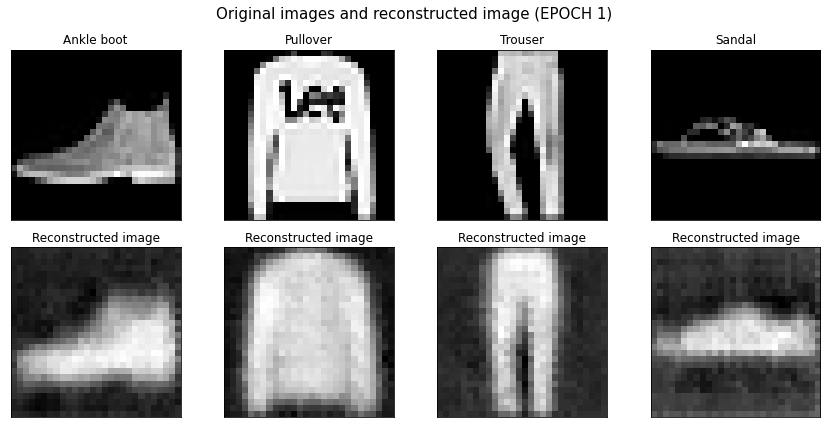

  2%|▏         | 1/50 [00:23<19:17, 23.62s/it]

AVERAGE TRAIN LOSS: 0.024161869660019875


  4%|▍         | 2/50 [00:45<18:17, 22.86s/it]

AVERAGE TEST LOSS: 0.022735433652997017
AVERAGE TRAIN LOSS: 0.020935265347361565


  6%|▌         | 3/50 [01:08<17:45, 22.68s/it]

AVERAGE TEST LOSS: 0.02018032595515251
AVERAGE TRAIN LOSS: 0.019278669729828835


  8%|▊         | 4/50 [01:31<17:35, 22.94s/it]

AVERAGE TEST LOSS: 0.019262051209807396
AVERAGE TRAIN LOSS: 0.018322117626667023


 10%|█         | 5/50 [01:54<17:05, 22.78s/it]

AVERAGE TEST LOSS: 0.01819649338722229
AVERAGE TRAIN LOSS: 0.01764252781867981
AVERAGE TEST LOSS: 0.01768496446311474


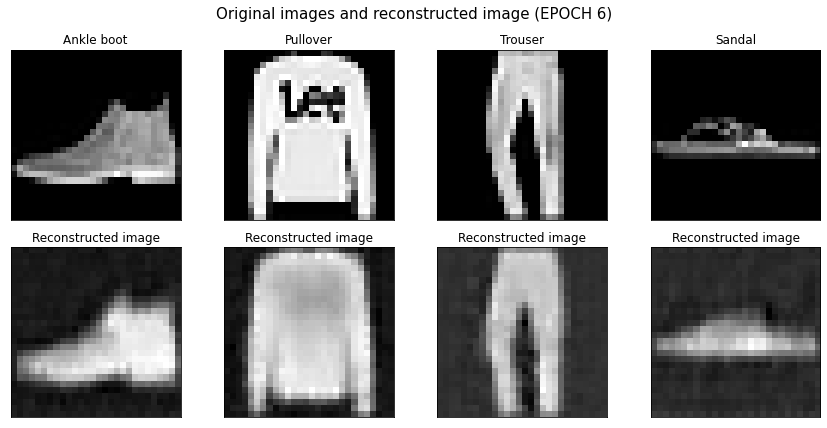

 12%|█▏        | 6/50 [02:17<16:54, 23.06s/it]

AVERAGE TRAIN LOSS: 0.01715977117419243


 14%|█▍        | 7/50 [02:43<17:09, 23.95s/it]

AVERAGE TEST LOSS: 0.017426392063498497
AVERAGE TRAIN LOSS: 0.016827132552862167


 16%|█▌        | 8/50 [03:11<17:41, 25.28s/it]

AVERAGE TEST LOSS: 0.016869233921170235
AVERAGE TRAIN LOSS: 0.01661793515086174


 18%|█▊        | 9/50 [03:40<18:01, 26.37s/it]

AVERAGE TEST LOSS: 0.016905436292290688
AVERAGE TRAIN LOSS: 0.016343899071216583


 20%|██        | 10/50 [04:09<18:07, 27.20s/it]

AVERAGE TEST LOSS: 0.01645265333354473
AVERAGE TRAIN LOSS: 0.016109099611639977
AVERAGE TEST LOSS: 0.01643659733235836


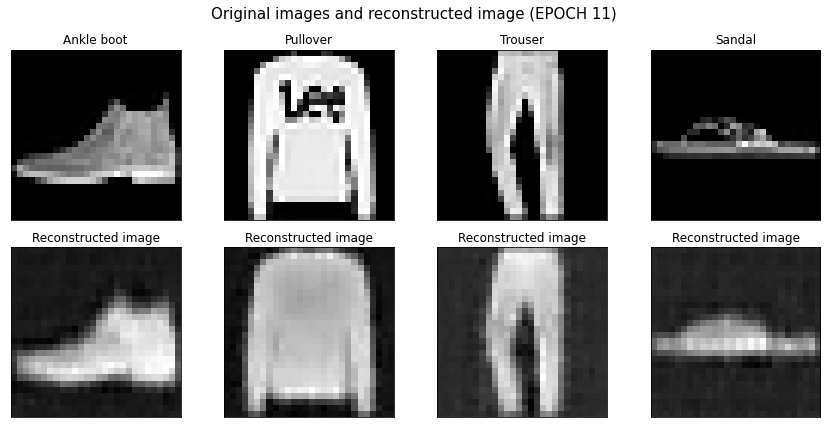

 22%|██▏       | 11/50 [04:39<18:13, 28.03s/it]

AVERAGE TRAIN LOSS: 0.016015203669667244


 24%|██▍       | 12/50 [05:09<18:06, 28.60s/it]

AVERAGE TEST LOSS: 0.01604612171649933
AVERAGE TRAIN LOSS: 0.015782911330461502


 26%|██▌       | 13/50 [05:39<17:53, 29.01s/it]

AVERAGE TEST LOSS: 0.016142982989549637
AVERAGE TRAIN LOSS: 0.01571471616625786


 28%|██▊       | 14/50 [06:09<17:33, 29.26s/it]

AVERAGE TEST LOSS: 0.01588243618607521
AVERAGE TRAIN LOSS: 0.015565448440611362


 30%|███       | 15/50 [06:35<16:32, 28.36s/it]

AVERAGE TEST LOSS: 0.0158206969499588
AVERAGE TRAIN LOSS: 0.015521450899541378
AVERAGE TEST LOSS: 0.015620742924511433


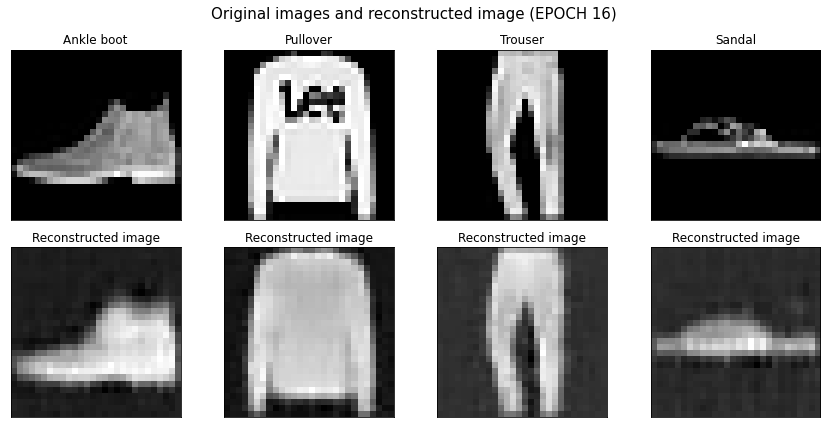

 32%|███▏      | 16/50 [07:03<16:04, 28.35s/it]

AVERAGE TRAIN LOSS: 0.015388709492981434


 34%|███▍      | 17/50 [07:31<15:31, 28.21s/it]

AVERAGE TEST LOSS: 0.015884747728705406
AVERAGE TRAIN LOSS: 0.015336434356868267


 36%|███▌      | 18/50 [07:59<15:00, 28.14s/it]

AVERAGE TEST LOSS: 0.015645300969481468
AVERAGE TRAIN LOSS: 0.015257403254508972


 38%|███▊      | 19/50 [08:27<14:30, 28.07s/it]

AVERAGE TEST LOSS: 0.015439013950526714
AVERAGE TRAIN LOSS: 0.015165051445364952


 40%|████      | 20/50 [08:52<13:38, 27.27s/it]

AVERAGE TEST LOSS: 0.01567472144961357
AVERAGE TRAIN LOSS: 0.015113645233213902
AVERAGE TEST LOSS: 0.01568772830069065


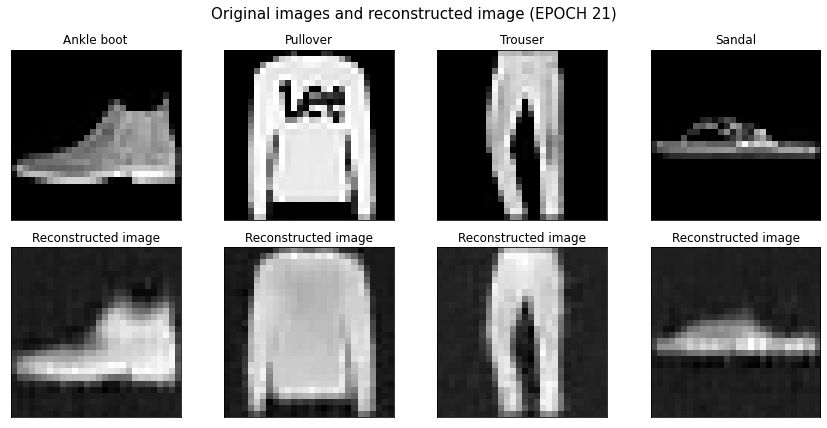

 42%|████▏     | 21/50 [09:19<13:00, 26.90s/it]

AVERAGE TRAIN LOSS: 0.015048445202410221


 44%|████▍     | 22/50 [09:44<12:22, 26.52s/it]

AVERAGE TEST LOSS: 0.015253612771630287
AVERAGE TRAIN LOSS: 0.014990944415330887


 46%|████▌     | 23/50 [10:10<11:51, 26.36s/it]

AVERAGE TEST LOSS: 0.01512516476213932
AVERAGE TRAIN LOSS: 0.014916369691491127


 48%|████▊     | 24/50 [10:38<11:35, 26.74s/it]

AVERAGE TEST LOSS: 0.015059980563819408
AVERAGE TRAIN LOSS: 0.014837461523711681


 50%|█████     | 25/50 [11:05<11:13, 26.94s/it]

AVERAGE TEST LOSS: 0.015062066726386547
AVERAGE TRAIN LOSS: 0.014792576432228088
AVERAGE TEST LOSS: 0.015123906545341015


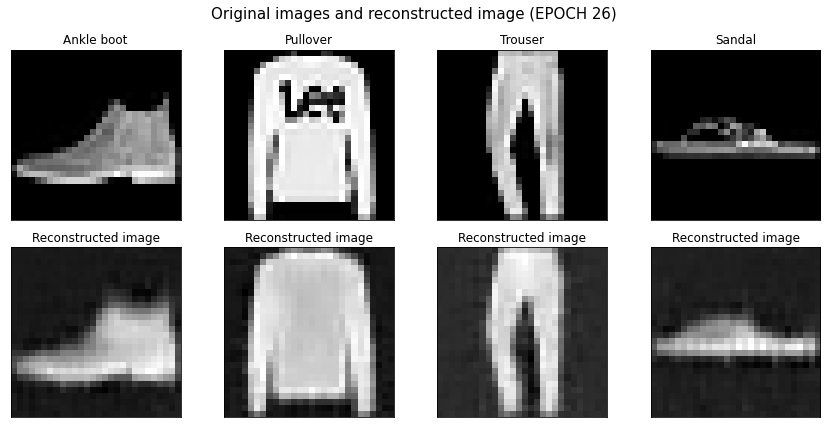

 52%|█████▏    | 26/50 [11:31<10:38, 26.60s/it]

AVERAGE TRAIN LOSS: 0.014742983505129814


 54%|█████▍    | 27/50 [11:56<10:01, 26.16s/it]

AVERAGE TEST LOSS: 0.015321284532546997
AVERAGE TRAIN LOSS: 0.014747483655810356


 56%|█████▌    | 28/50 [12:21<09:26, 25.77s/it]

AVERAGE TEST LOSS: 0.01501011848449707
AVERAGE TRAIN LOSS: 0.014634817838668823


 58%|█████▊    | 29/50 [12:47<09:01, 25.78s/it]

AVERAGE TEST LOSS: 0.014927762560546398
AVERAGE TRAIN LOSS: 0.014635875821113586


 60%|██████    | 30/50 [13:12<08:33, 25.68s/it]

AVERAGE TEST LOSS: 0.015071910806000233
AVERAGE TRAIN LOSS: 0.014589963480830193
AVERAGE TEST LOSS: 0.014856684021651745


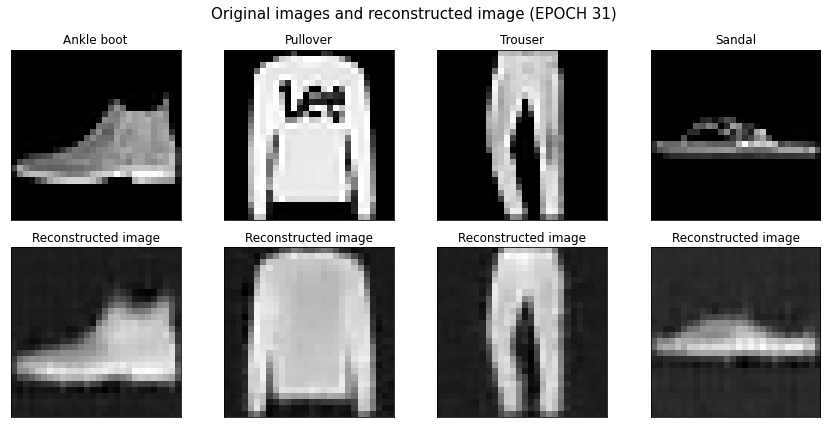

 62%|██████▏   | 31/50 [13:38<08:10, 25.81s/it]

AVERAGE TRAIN LOSS: 0.01454593800008297


 64%|██████▍   | 32/50 [14:05<07:51, 26.21s/it]

AVERAGE TEST LOSS: 0.015099063515663147
AVERAGE TRAIN LOSS: 0.014517787843942642


 66%|██████▌   | 33/50 [14:33<07:32, 26.62s/it]

AVERAGE TEST LOSS: 0.014759707264602184
AVERAGE TRAIN LOSS: 0.014446994289755821


 68%|██████▊   | 34/50 [15:01<07:10, 26.89s/it]

AVERAGE TEST LOSS: 0.01474541425704956
AVERAGE TRAIN LOSS: 0.014431336894631386


 70%|███████   | 35/50 [15:28<06:44, 26.98s/it]

AVERAGE TEST LOSS: 0.014711687341332436
AVERAGE TRAIN LOSS: 0.014394433237612247
AVERAGE TEST LOSS: 0.01464773714542389


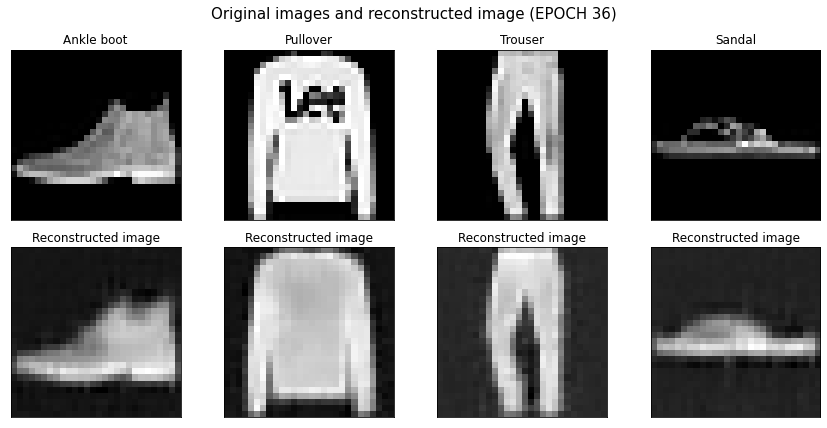

 72%|███████▏  | 36/50 [15:54<06:14, 26.73s/it]

AVERAGE TRAIN LOSS: 0.01431889459490776


 74%|███████▍  | 37/50 [16:19<05:42, 26.36s/it]

AVERAGE TEST LOSS: 0.014781394973397255
AVERAGE TRAIN LOSS: 0.01429931353777647


 76%|███████▌  | 38/50 [16:45<05:13, 26.13s/it]

AVERAGE TEST LOSS: 0.014629663899540901
AVERAGE TRAIN LOSS: 0.014409408904612064


 78%|███████▊  | 39/50 [17:11<04:47, 26.18s/it]

AVERAGE TEST LOSS: 0.014705812558531761
AVERAGE TRAIN LOSS: 0.014229600317776203


 80%|████████  | 40/50 [17:37<04:20, 26.00s/it]

AVERAGE TEST LOSS: 0.014492161571979523
AVERAGE TRAIN LOSS: 0.014208349399268627
AVERAGE TEST LOSS: 0.014457004144787788


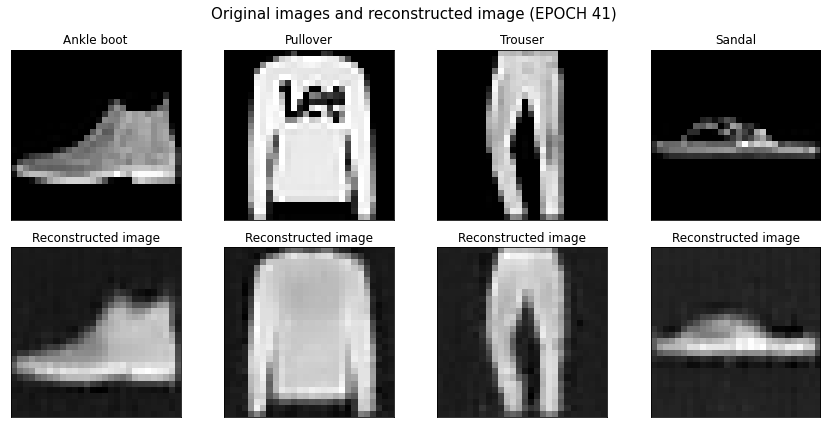

 82%|████████▏ | 41/50 [18:04<03:56, 26.25s/it]

AVERAGE TRAIN LOSS: 0.014195699244737625


 84%|████████▍ | 42/50 [18:31<03:32, 26.60s/it]

AVERAGE TEST LOSS: 0.014630617573857307
AVERAGE TRAIN LOSS: 0.01417279988527298


 86%|████████▌ | 43/50 [18:59<03:08, 26.95s/it]

AVERAGE TEST LOSS: 0.01466371864080429
AVERAGE TRAIN LOSS: 0.014144385233521461


 88%|████████▊ | 44/50 [19:26<02:41, 26.95s/it]

AVERAGE TEST LOSS: 0.014417609199881554
AVERAGE TRAIN LOSS: 0.014136484824120998


 90%|█████████ | 45/50 [19:52<02:13, 26.73s/it]

AVERAGE TEST LOSS: 0.014437684789299965
AVERAGE TRAIN LOSS: 0.014096475206315517
AVERAGE TEST LOSS: 0.014364764094352722


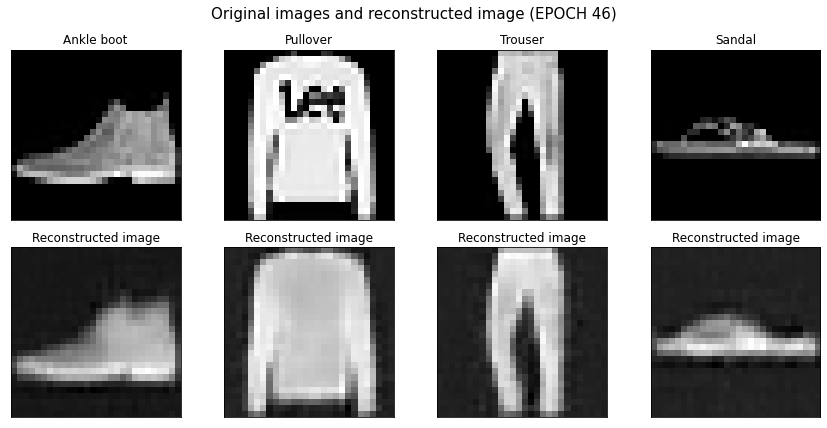

 92%|█████████▏| 46/50 [20:20<01:48, 27.01s/it]

AVERAGE TRAIN LOSS: 0.014065113849937916


 94%|█████████▍| 47/50 [20:47<01:21, 27.09s/it]

AVERAGE TEST LOSS: 0.014510205015540123
AVERAGE TRAIN LOSS: 0.014077097177505493


 96%|█████████▌| 48/50 [21:13<00:53, 26.91s/it]

AVERAGE TEST LOSS: 0.014384816400706768
AVERAGE TRAIN LOSS: 0.014067512936890125


 98%|█████████▊| 49/50 [21:41<00:27, 27.14s/it]

AVERAGE TEST LOSS: 0.014304177835583687
AVERAGE TRAIN LOSS: 0.014003788121044636


100%|██████████| 50/50 [22:10<00:00, 26.60s/it]

AVERAGE TEST LOSS: 0.014451044611632824


In [22]:
train_loss, test_loss = AE.training_cycle(device,
                                train_dataloader,
                                test_dataloader,
                                loss_fn,
                                optim,
                                n_epochs,
                                test_dataset,
                                encoded_space_dim,
                                plot = True,
                                keep_plots = True,
                                keep_model=True,
                                verbose = False)

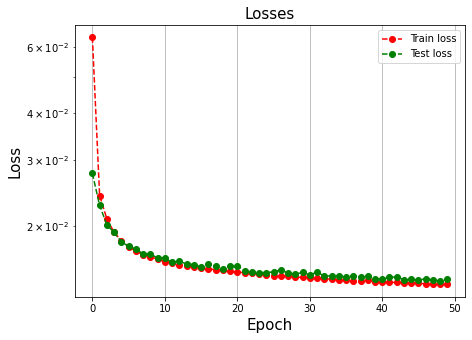

In [24]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train_loss, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test_loss, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
plt.savefig('./Img/best_model_losses.svg', format='svg')
plt.show()

# Latent space exploration

**2 pt - explore the latent space structure (e.g., PCA, t-SNE) and generate new samples from latent codes**

## Retrieve the encoded vector for each image in the test set

In [25]:
AE = model.Autoencoder(trial.params["encoded_space_dim"])

In [26]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [27]:
# Load network parameters
AE.encoder.load_state_dict(torch.load('Models/encoder_params.pth'))
AE.decoder.load_state_dict(torch.load('Models/decoder_params.pth'))

<All keys matched successfully>

In [28]:
### Get the encoded representation of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    AE.encoder.eval()
    with torch.no_grad():
        encoded_img  = AE.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)

100%|██████████| 10000/10000 [00:04<00:00, 2332.31it/s]


In [29]:
# Convert to a dataframe
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

Enc. Variable 0  Enc. Variable 1  Enc. Variable 2  Enc. Variable 3  \
0           -6.696325        -0.845913        11.276767        -2.528312   
1            5.745810         6.574839        15.359699       -19.037504   
2           20.884596         1.598249         0.620617        -2.044457   
3           14.416254        -2.162009        -2.302066        -0.962958   
4            2.134889         2.949183         4.125972       -18.476461   
...               ...              ...              ...              ...   
9995        -3.652858        -3.880819        15.955743        -9.086699   
9996         7.388012        -0.378547        -2.507296        -1.265597   
9997         7.639266        -6.763371         1.933300       -17.897032   
9998        10.907182        -0.833379        -3.015641         0.266010   
9999        -6.986737         2.441157         5.013482        -3.233139   

      Enc. Variable 4  Enc. Variable 5  Enc. Variable 6  Enc. Variable 7  \
0           -9.291834        16.053396        -7.420411         1.623725   
1          -17.428108        -8.656549        21.962122        -0.478813   
2           15.616800         8.512041        10.002040        -7.192258   
3           11.079624         3.294032         9.203775        -1.240803   
4           -8.925951        -6.490266         9.483162        -3.437080   
...               ...              ...              ...              ...   
9995       -16.081715        22.435478        -3.555591        10.572403   
9996         8.226217         1.892081         7.223393         0.618795   
9997         8.081782         6.208238        -4.377601        -6.485833   
9998        13.381686        10.590891        12.448139        -0.623510   
9999        -3.393566         9.087438        -2.405859        -5.020009   

      Enc. Variable 8  Enc. Variable 9  label  
0           -4.896894         0.766596      9  
1           -5.364040         2.774762      2  
2           -4.293566        -3.715402      1  
3            2.129274        -0.707248      1  
4            2.155373        -6.752804      6  
...               ...              ...    ...  
9995         0.393575        -4.988594      9  
9996         1.883819        -0.810793      1  
9997         0.875404         3.314252      8  
9998         7.128921        -4.633873      1  
9999        -1.047400         1.370678      5  

[10000 rows x 11 columns]

## PCA

In [30]:
pca = PCA(n_components=2)
encoded_samples_reduced_PCA = pca.fit_transform(encoded_samples)


In [31]:
pca_df = pd.DataFrame(encoded_samples_reduced_PCA)
pca_df['label'] = encoded_samples.label 


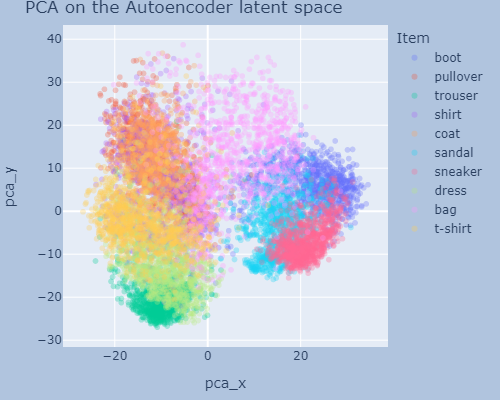

In [32]:
fig = px.scatter(pca_df, x=0, y=1, color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="PCA on the Autoencoder latent space",
                labels={"0":"pca_x","1":"pca_y","color":"Item"})

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")
fig.write_image("Img/CAE_PCA.svg")

## TSNE

In [33]:
tsne = TSNE(n_components=2)
encoded_samples_reduced_TSNE = tsne.fit_transform(encoded_samples)


C:\Users\hilar\anaconda3\envs\NNDL_torch\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\hilar\anaconda3\envs\NNDL_torch\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [34]:
tsne_df = pd.DataFrame(encoded_samples_reduced_TSNE)
tsne_df['label'] = encoded_samples.label 


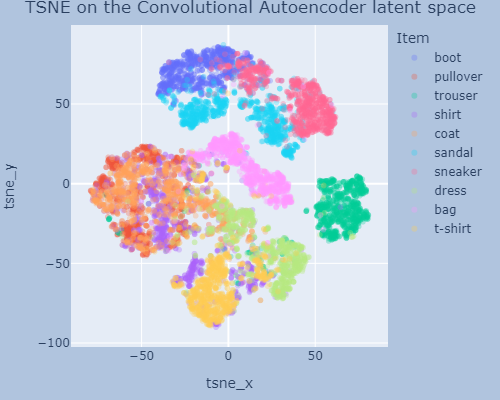

In [35]:
fig = px.scatter(tsne_df, x=0, y=1, color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="TSNE on the Convolutional Autoencoder latent space",
                labels={"0":"tsne_x","1":"tsne_y","color":"Item"})

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")
fig.write_image("Img/CAE_TSNE.svg")

## Sample generation

For the sample generation I will go to a model with a latent space dimension equal to two.

In [36]:
encoded_space_dim = 2
max_epochs     = 20
learning_rate  = 0.0067
regularization = 0.

In [37]:
# Initialize the autoencoder
AE_2 = model.Autoencoder(encoded_space_dim)

In [38]:
### Define the loss function for reconstruction
loss_fn = nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': AE_2.encoder.parameters()},
    {'params': AE_2.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
AE_2.to(device)

Selected device: cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (8): ReLU(inplac

In [39]:
_,_ =AE_2.training_cycle(device,
                train_dataloader,
                test_dataloader,
                loss_fn,
                optim,
                max_epochs,
                test_dataset,
                2)

  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH 1/20
AVERAGE TRAIN LOSS: 0.04886174947023392


  5%|▌         | 1/20 [00:18<05:47, 18.30s/it]

AVERAGE TEST LOSS: 0.03555888682603836
EPOCH 2/20
AVERAGE TRAIN LOSS: 0.03530498221516609


 10%|█         | 2/20 [00:46<07:16, 24.27s/it]

AVERAGE TEST LOSS: 0.032995037734508514
EPOCH 3/20
AVERAGE TRAIN LOSS: 0.032309405505657196


 15%|█▌        | 3/20 [01:18<07:48, 27.56s/it]

AVERAGE TEST LOSS: 0.03190305829048157
EPOCH 4/20
AVERAGE TRAIN LOSS: 0.03152428939938545


 20%|██        | 4/20 [01:45<07:20, 27.52s/it]

AVERAGE TEST LOSS: 0.03113926574587822
EPOCH 5/20
AVERAGE TRAIN LOSS: 0.03066357970237732


 25%|██▌       | 5/20 [02:26<08:07, 32.47s/it]

AVERAGE TEST LOSS: 0.03093334473669529
EPOCH 6/20
AVERAGE TRAIN LOSS: 0.03046402335166931


 30%|███       | 6/20 [02:52<07:03, 30.24s/it]

AVERAGE TEST LOSS: 0.030062317848205566
EPOCH 7/20
AVERAGE TRAIN LOSS: 0.030033454298973083


 35%|███▌      | 7/20 [03:26<06:47, 31.35s/it]

AVERAGE TEST LOSS: 0.03008067049086094
EPOCH 8/20
AVERAGE TRAIN LOSS: 0.029747625812888145


 40%|████      | 8/20 [03:55<06:05, 30.45s/it]

AVERAGE TEST LOSS: 0.03044513799250126
EPOCH 9/20
AVERAGE TRAIN LOSS: 0.02985318750143051


 45%|████▌     | 9/20 [04:28<05:44, 31.32s/it]

AVERAGE TEST LOSS: 0.029406774789094925
EPOCH 10/20
AVERAGE TRAIN LOSS: 0.02926814556121826


 50%|█████     | 10/20 [04:58<05:11, 31.11s/it]

AVERAGE TEST LOSS: 0.029293948784470558
EPOCH 11/20
AVERAGE TRAIN LOSS: 0.029220789670944214


 55%|█████▌    | 11/20 [05:30<04:41, 31.23s/it]

AVERAGE TEST LOSS: 0.02907468006014824
EPOCH 12/20
AVERAGE TRAIN LOSS: 0.029714033007621765


 60%|██████    | 12/20 [06:00<04:08, 31.03s/it]

AVERAGE TEST LOSS: 0.029255127534270287
EPOCH 13/20
AVERAGE TRAIN LOSS: 0.02904530242085457


 65%|██████▌   | 13/20 [06:31<03:36, 30.97s/it]

AVERAGE TEST LOSS: 0.030596386641263962
EPOCH 14/20
AVERAGE TRAIN LOSS: 0.02876392751932144


 70%|███████   | 14/20 [07:02<03:04, 30.76s/it]

AVERAGE TEST LOSS: 0.02873283624649048
EPOCH 15/20
AVERAGE TRAIN LOSS: 0.02904149331152439


 75%|███████▌  | 15/20 [07:33<02:35, 31.04s/it]

AVERAGE TEST LOSS: 0.028769463300704956
EPOCH 16/20
AVERAGE TRAIN LOSS: 0.028672605752944946


 80%|████████  | 16/20 [08:11<02:11, 32.95s/it]

AVERAGE TEST LOSS: 0.02941429615020752
EPOCH 17/20
AVERAGE TRAIN LOSS: 0.0287568848580122


 85%|████████▌ | 17/20 [08:50<01:45, 35.01s/it]

AVERAGE TEST LOSS: 0.028719836845993996
EPOCH 18/20
AVERAGE TRAIN LOSS: 0.02837153524160385


 90%|█████████ | 18/20 [09:26<01:10, 35.15s/it]

AVERAGE TEST LOSS: 0.028630346059799194
EPOCH 19/20
AVERAGE TRAIN LOSS: 0.028349826112389565


 95%|█████████▌| 19/20 [09:49<00:31, 31.65s/it]

AVERAGE TEST LOSS: 0.028240863233804703
EPOCH 20/20
AVERAGE TRAIN LOSS: 0.028032928705215454


100%|██████████| 20/20 [10:11<00:00, 30.57s/it]

AVERAGE TEST LOSS: 0.02813968062400818


Lets check the latent space

In [40]:
### Get the encoded representation of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    AE_2.encoder.eval()
    with torch.no_grad():
        encoded_img  = AE_2.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)

100%|██████████| 10000/10000 [00:05<00:00, 1874.33it/s]


In [41]:
# Convert to a dataframe
encoded_samples = pd.DataFrame(encoded_samples)
print(min(encoded_samples["Enc. Variable 0"]), max(encoded_samples["Enc. Variable 0"]))
print(min(encoded_samples["Enc. Variable 1"]), max(encoded_samples["Enc. Variable 1"]))

-2.5518710613250732 20.09143829345703
-11.167080879211426 3.0138487815856934


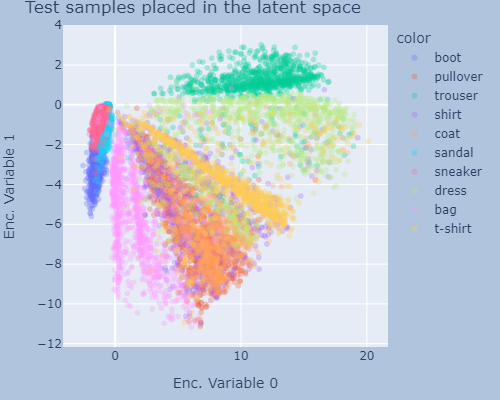

In [42]:
fig = px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="Test samples placed in the latent space")

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")

In [43]:
def image_generator(x,y,decoder,device):
    decoder.to(device)
    #move the input to the GPU and predict the output
    decoder.eval()
    latent_space_vector = torch.tensor([[x,y]])
    latent_space_vector.to(device)
    with torch.no_grad():
        # Encode the data
        decoded_img   = decoder(latent_space_vector)    
    return decoded_img.squeeze().cpu().numpy()

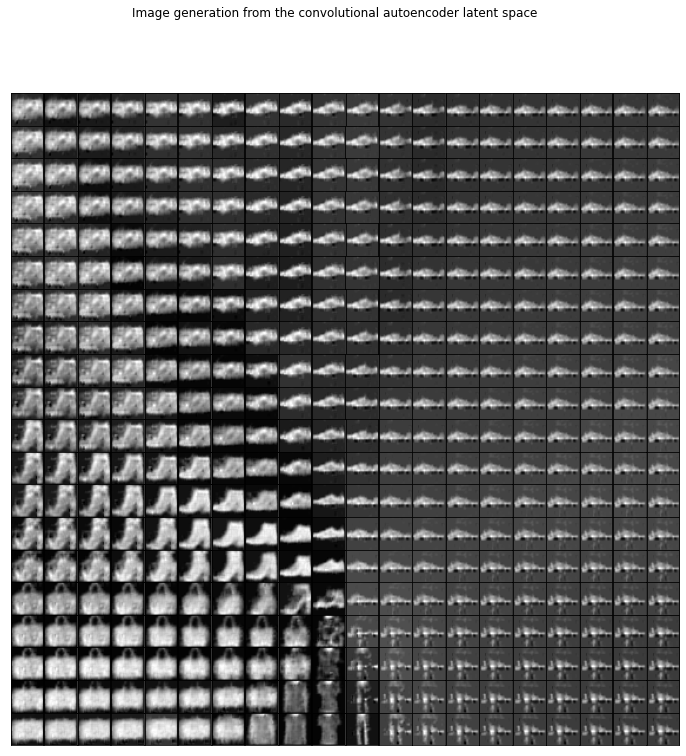

In [44]:
fig, axs = plt.subplots(20, 20, figsize=(12,12))
fig.suptitle("Image generation from the convolutional autoencoder latent space")
fig.subplots_adjust(top=0.88)
axs = axs.ravel()
X = np.linspace(-10, 2, num=20).astype(np.float32)
Y = np.linspace(-10, 10, num=20).astype(np.float32)
i = 0
for x in X:
    for y in Y: 
        img = image_generator(x,y,AE_2.decoder,device)
        axs[i].imshow(img, cmap='gist_gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        i +=1
# Save figures
fig.savefig('./Img/CAE_generation.svg', format='svg')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
plt.close()

Autoencoders are not designed to generate data, the lack of this ability is closely related to the lack of regularity (order) in the latent space [Here there is a bit about it and why GANS are capable of doing so](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

# Fine tuning - Transfer learning

**1 pt - fine-tune the (convolutional) autoencoder using a supervised classification task, and compare classification accuracy and learning speed with results achieved in Homework 1**

## Data

In [45]:
#Define a validation dataset
train_percent = 0.7
n_train      = int(train_percent * len(train_dataset))
n_validation = len(train_dataset) - n_train
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [n_train, n_validation])

print('# of training samples  :',len(train_dataset))
print('# of validation samples:',len(val_dataset))
print('# of test samples      :',len(test_dataset))


# of training samples  : 42000
# of validation samples: 18000
# of test samples      : 10000


In [46]:
batch_size = 256
train_dataloader      = DataLoader(train_dataset,  batch_size=batch_size,        shuffle=True, num_workers=0)
validation_dataloader = DataLoader(val_dataset,    batch_size=len(val_dataset),  shuffle=False, num_workers=0)
test_dataloader       = DataLoader(test_dataset,   batch_size=len(test_dataset), shuffle=False, num_workers=0)


## Transfer the autoencoder encoder weights to the supervised network

In [47]:
encoded_space_dim = trial.params["encoded_space_dim"]

In [48]:
# Initialize the old autoencoder
AE = model.Autoencoder(encoded_space_dim)
# Load network parameters
AE.encoder.load_state_dict(torch.load('./Models/encoder_params.pth'))

<All keys matched successfully>

In [49]:
#Initialize the Autoencoder for fine tuning
FTAE = model.Fine_Tuned_Autoencoder(encoded_space_dim,AE)


In [50]:
FTAE

Fine_Tuned_Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
  (fine_tuner): Linear(in_features=10, out_features=10, bias=True)
)

In [51]:
### Disable the weight update for the trained encoder
for param_name, param in FTAE.encoder.named_parameters():
    param.requires_grad = False

### Allow weight update (training) of the last layers (linear layers)
for param in FTAE.encoder[7].parameters():
    param.requires_grad = True
    
### Allow weight update (training) of the last layers (linear layers)
for param in FTAE.encoder[9].parameters():
    param.requires_grad = True

### Check which weights and biases will be updated
for param_name, param in FTAE.encoder.named_parameters():
    print(param_name,param.requires_grad)

0.weight False
0.bias False
2.weight False
2.bias False
4.weight False
4.bias False
7.weight True
7.bias True
9.weight True
9.bias True


In [52]:
learning_rate       = 1e-3
regularization_term = 0.
n_epochs = 50

In [53]:
### Define the loss function
loss_fn = nn.CrossEntropyLoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': FTAE.encoder.parameters()},
    {'params': FTAE.fine_tuner.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization_term)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [54]:
train, test = FTAE.tune_training_cycle(device,
                                       train_dataloader,
                                       validation_dataloader,
                                       loss_fn,
                                       optim,
                                       n_epochs,
                                       test_dataloader,
                                      verbose=False)

100%|██████████| 50/50 [07:55<00:00,  9.52s/it]


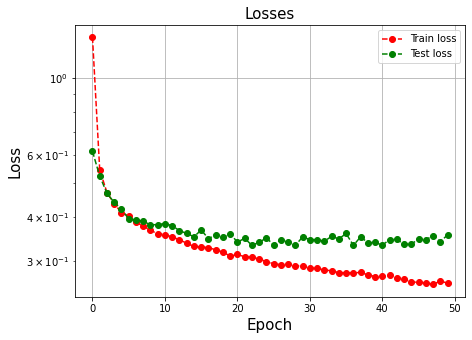

In [55]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.ylim(0,2)
plt.savefig('./Img/fine_tunning_losses.svg', format='svg')
plt.show()

In [56]:
test_acc = 0

y_test=[]
y_pred=[]

FTAE.to(device)

with torch.no_grad():
    for x_batched, y_batched in test_dataloader:
        # Move data to device
        x_batched = x_batched.to(device)
        y_batched = y_batched.to(device)

        # forward the data
        out = FTAE.forward(x_batched,"Test")

        y_test.append(y_batched)
        y_pred.append(out)

        pred = np.argmax(out.detach().cpu().numpy(), axis = 1)
        right = np.sum(pred == np.array(y_batched.cpu()))
        test_acc = test_acc + right

print(f"The obtained accuracy is {test_acc/len(test_dataset)*100} %")

The obtained accuracy is 86.88 %


In [59]:
def confussion_plot(real, prediction):
    categories = ['T-shirt/top','Trouser','Pullover',
                    'Dress','Coat','Sandal','Shirt',
                    'Sneaker','Bag','Ankle boot']

    array = confusion_matrix(real, prediction,normalize="true")
    df_cm = pd.DataFrame(array, index = categories, columns = categories)
    
    fig = plt.figure(figsize=(8,7))
    sns.heatmap(df_cm, annot=True, fmt='.2f')
    plt.ylabel("Correct",fontsize=15)
    plt.xlabel("Predicted",fontsize=15)
    plt.title("Confussion matrix",fontsize=15)
    plt.savefig('./Img/confussion.svg', format='svg')
    plt.show()

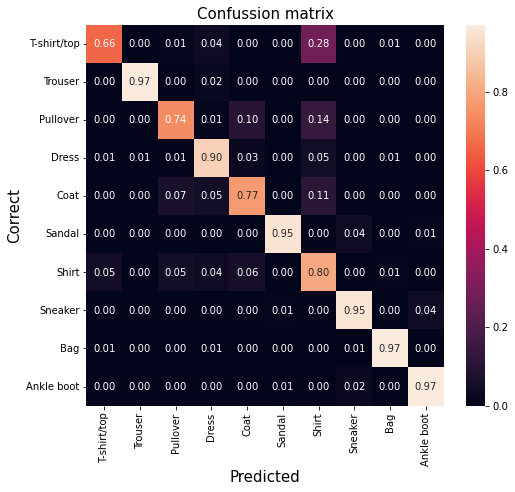

In [60]:
confussion_plot(y_batched, pred)

# Generative models


**2 pt: implement and test variational (convolutional) autoencoder or GAN or SimCLR**

## Variational Autoencoder


![LALA](./Img/variational_autoencoder.png)

[VAES by towarddatascience](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

- a variational autoencoder can be defined as being an autoencoder whose training is regularised to avoid overfitting and ensure that the latent space has good properties that enable generative process.
-  instead of encoding an input as a single point, we encode it as a distribution over the latent space.
- The model is then trained as follows:

    - first, the input is encoded as distribution over the latent space

    - second, a point from the latent space is sampled from that distribution
    
    - third, the sampled point is decoded and the reconstruction error can be computed
    - finally, the reconstruction error is backpropagated through the network

[GANS by towarddatasicence](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29)

In [61]:
encoded_space_dim = 2
max_epochs     = 50
learning_rate  = 0.0067
regularization = 0.

In [62]:
# Initialize the autoencoder
VAE = model.Variational_Autoencoder(encoded_space_dim)

In [63]:
### Define the loss function for reconstruction
#loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': VAE.encoder.parameters()},
    {'params': VAE.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [64]:
train, test = VAE.training_cycle(device,
                                   train_dataloader,
                                   test_dataloader,
                                   optim,
                                   max_epochs,
                                   test_dataset,
                                   verbose = False)

100%|██████████| 50/50 [14:48<00:00, 17.76s/it]


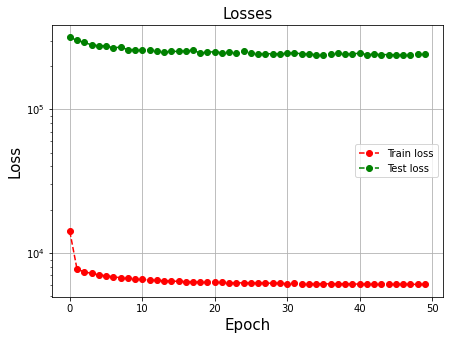

In [65]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.ylim(0,2)
plt.savefig('./Img/Variational_AE_losses.svg', format='svg')
plt.show()

In [66]:
### Get the encoded representation of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    with torch.no_grad():
        _,latent_mn,latent_std = VAE.forward(img, "Test")
        encoded_img = VAE.sampler(latent_mn,latent_std)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)
    
# Convert to a dataframe
encoded_samples = pd.DataFrame(encoded_samples)

100%|██████████| 10000/10000 [00:10<00:00, 916.42it/s]


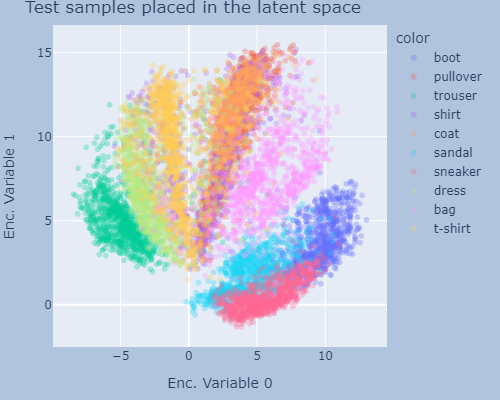

In [67]:
fig = px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="Test samples placed in the latent space")

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")
fig.write_image("Img/VAE_latent_space.svg")

In [68]:
def image_generator(x,y,decoder,device):
    decoder.to(device)
    #move the input to the GPU and predict the output
    decoder.eval()
    latent_space_vector = torch.tensor([[x,y]])
    latent_space_vector.to(device)
    with torch.no_grad():
        # Encode the data
        decoded_img   = decoder(latent_space_vector)    
    return decoded_img.squeeze().cpu().numpy()

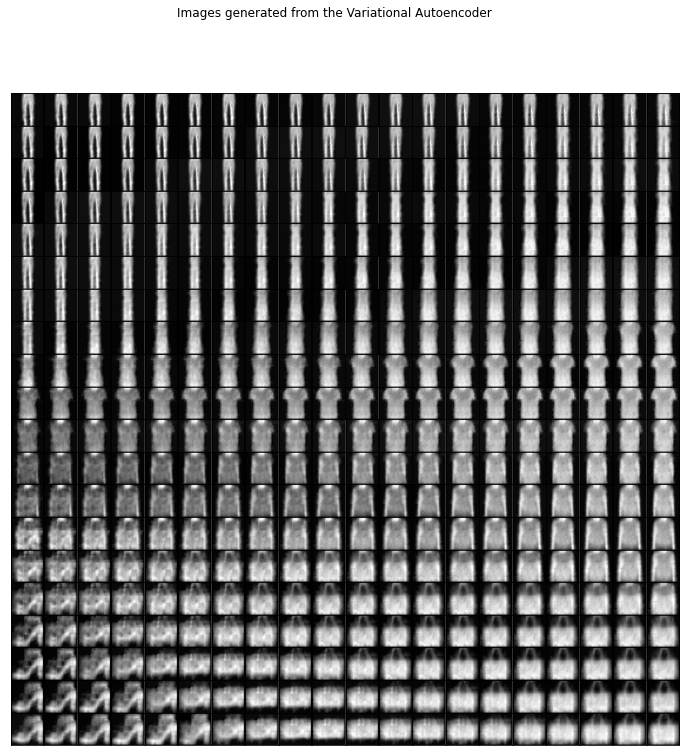

In [77]:
fig, axs = plt.subplots(20, 20, figsize=(12,12))
fig.suptitle("Images generated from the Variational Autoencoder")
fig.subplots_adjust(top=0.88)
axs = axs.ravel()
X = np.linspace(-5, 5, num=20).astype(np.float32)
Y = np.linspace(3, 7, num=20).astype(np.float32)
i = 0
for x in X:
    for y in Y: 
        img = image_generator(x,y,VAE.decoder,device)
        axs[i].imshow(img, cmap='gist_gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        i +=1
# Save figures
fig.savefig('./Img/VAE_generation.svg', format='svg')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
plt.close()

## GAN - Generative Adversarial Network

[A bit of theory](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29) and a [bit of coding](https://towardsdatascience.com/building-a-gan-with-pytorch-237b4b07ca9a). But based on [this post](https://realpython.com/generative-adversarial-networks/#the-architecture-of-generative-adversarial-networks).

Goodfellow et al., in their original paper Generative Adversarial Networks, proposed an interesting idea: use a very well-trained classifier to distinguish between a generated image and an actual image. If such a classifier exists, we can create and train a generator network until it can output images that can completely fool the classifier.

![LALA](./Img/GAN_pipeline.jpeg)

In [6]:
batch_size =32

### Define train dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [7]:
class Discriminator(nn.Module):
    def __init__(self,dp=0.3):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(dp),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(dp),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dp),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output
    
    
def sample_generator_to_train_discriminator(real_samples, device, batch_size):
    
    # Assign label 1 to real images
    real_samples = real_samples.to(device)
    real_labels  = torch.ones((batch_size,1)).to(device)
    
    # Generate some fake images
    noise_sample = torch.randn((batch_size, 100)).to(device)
    fake_samples = generator(noise_sample)
    fake_labels  = torch.zeros((batch_size, 1)).to(device)
    
    # Concatenate all the data which will serve as training dataset for the discriminator
    all_samples = torch.cat((real_samples,fake_samples))
    all_labels  = torch.cat((real_labels, fake_labels))
    
    return all_samples, all_labels,real_labels

In [8]:
learning_rate = 0.0001
regularization = 0.
num_epochs = 200


In [9]:
discriminator = Discriminator()
generator = Generator()

In [10]:
### Define the loss function
loss_fn = nn.BCELoss()

### Define an optimizer (both for the encoder and the decoder!)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator     = torch.optim.Adam(generator.parameters(), lr=learning_rate)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
discriminator.to(device)
generator.to(device)

Selected device: cpu


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

In [11]:
loss_discriminator_ = []
loss_generator_     = []

for epoch in tqdm(range(num_epochs)):
    for n, (real_samples, mnist_labels) in enumerate(train_dataloader):
        
        
        ### Data for training the discriminator
        all_samples,all_samples_labels,real_samples_labels = sample_generator_to_train_discriminator(real_samples, device, batch_size)

        
        ### Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator   = loss_fn(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        ### Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)  # Sample some noise to feed the generator

        ### Training the generator
        generator.zero_grad()
        generated_samples              = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        
        loss_generator = loss_fn(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            loss_batch_discriminator = loss_discriminator.detach().cpu().numpy()
            loss_batch_generator = loss_generator.detach().cpu().numpy()
            loss_discriminator_.append(loss_batch_discriminator)
            loss_generator_.append(loss_batch_generator)
            #Save model
            if (epoch % 5==0):
                torch.save(generator.state_dict(), f'./Models/GAN_generator_epoch_{epoch}.pth')
                print(f"Epoch: {epoch} Loss D.: {loss_batch_discriminator}")
                print(f"Epoch: {epoch} Loss G.: {loss_batch_generator}")

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

Epoch: 0 Loss D.: 0.6928901076316833
Epoch: 0 Loss G.: 0.4795057475566864


  2%|█▉                                                                             | 5/200 [12:02<7:54:16, 145.93s/it]

Epoch: 5 Loss D.: 0.14013734459877014
Epoch: 5 Loss G.: 2.5658886432647705


  5%|███▉                                                                          | 10/200 [24:38<7:57:16, 150.72s/it]

Epoch: 10 Loss D.: 0.40220221877098083
Epoch: 10 Loss G.: 1.7448612451553345


  8%|█████▊                                                                        | 15/200 [37:10<7:43:17, 150.26s/it]

Epoch: 15 Loss D.: 0.4620330333709717
Epoch: 15 Loss G.: 1.5551127195358276


 10%|███████▊                                                                      | 20/200 [50:15<7:36:37, 152.21s/it]

Epoch: 20 Loss D.: 0.34823375940322876
Epoch: 20 Loss G.: 1.4755096435546875


 12%|█████████▌                                                                  | 25/200 [1:02:49<7:22:24, 151.68s/it]

Epoch: 25 Loss D.: 0.4246756136417389
Epoch: 25 Loss G.: 1.6859338283538818


 15%|███████████▍                                                                | 30/200 [1:15:50<7:25:17, 157.16s/it]

Epoch: 30 Loss D.: 0.42689570784568787
Epoch: 30 Loss G.: 1.6074508428573608


 18%|█████████████▎                                                              | 35/200 [1:28:08<6:49:30, 148.92s/it]

Epoch: 35 Loss D.: 0.3404289186000824
Epoch: 35 Loss G.: 1.153576374053955


 20%|███████████████▏                                                            | 40/200 [1:40:46<6:44:12, 151.58s/it]

Epoch: 40 Loss D.: 0.37816110253334045
Epoch: 40 Loss G.: 1.7084225416183472


 22%|█████████████████                                                           | 45/200 [1:54:04<6:50:30, 158.91s/it]

Epoch: 45 Loss D.: 0.385436475276947
Epoch: 45 Loss G.: 1.214661717414856


 25%|███████████████████                                                         | 50/200 [2:07:59<6:57:24, 166.96s/it]

Epoch: 50 Loss D.: 0.4562584161758423
Epoch: 50 Loss G.: 1.864416480064392


 28%|████████████████████▉                                                       | 55/200 [2:23:02<7:16:40, 180.69s/it]

Epoch: 55 Loss D.: 0.40507039427757263
Epoch: 55 Loss G.: 1.6249816417694092


 30%|██████████████████████▊                                                     | 60/200 [2:37:56<6:54:48, 177.78s/it]

Epoch: 60 Loss D.: 0.35932907462120056
Epoch: 60 Loss G.: 1.5787490606307983


 32%|████████████████████████▋                                                   | 65/200 [2:52:01<6:23:40, 170.52s/it]

Epoch: 65 Loss D.: 0.4788506329059601
Epoch: 65 Loss G.: 1.4548453092575073


 35%|██████████████████████████▌                                                 | 70/200 [3:06:09<6:09:48, 170.68s/it]

Epoch: 70 Loss D.: 0.3663240373134613
Epoch: 70 Loss G.: 1.6272192001342773


 38%|████████████████████████████▌                                               | 75/200 [3:20:34<6:00:18, 172.95s/it]

Epoch: 75 Loss D.: 0.4078994393348694
Epoch: 75 Loss G.: 1.5624650716781616


 40%|██████████████████████████████▍                                             | 80/200 [3:34:45<5:41:37, 170.82s/it]

Epoch: 80 Loss D.: 0.38133877515792847
Epoch: 80 Loss G.: 1.270695447921753


 42%|████████████████████████████████▎                                           | 85/200 [3:50:15<5:55:14, 185.34s/it]

Epoch: 85 Loss D.: 0.49815988540649414
Epoch: 85 Loss G.: 1.513077974319458


 45%|██████████████████████████████████▏                                         | 90/200 [4:04:43<5:39:58, 185.44s/it]

Epoch: 90 Loss D.: 0.401596337556839
Epoch: 90 Loss G.: 1.8500350713729858


 48%|████████████████████████████████████                                        | 95/200 [4:19:16<5:07:20, 175.63s/it]

Epoch: 95 Loss D.: 0.3844434320926666
Epoch: 95 Loss G.: 1.9611709117889404


 50%|█████████████████████████████████████▌                                     | 100/200 [4:33:59<4:53:57, 176.38s/it]

Epoch: 100 Loss D.: 0.3597579598426819
Epoch: 100 Loss G.: 1.6343910694122314


 52%|███████████████████████████████████████▍                                   | 105/200 [4:48:52<4:51:09, 183.89s/it]

Epoch: 105 Loss D.: 0.4480992257595062
Epoch: 105 Loss G.: 1.3109254837036133


 55%|█████████████████████████████████████████▎                                 | 110/200 [5:03:35<4:23:50, 175.90s/it]

Epoch: 110 Loss D.: 0.40295159816741943
Epoch: 110 Loss G.: 1.7286391258239746


 57%|███████████████████████████████████████████▏                               | 115/200 [5:18:35<4:13:19, 178.81s/it]

Epoch: 115 Loss D.: 0.31460535526275635
Epoch: 115 Loss G.: 1.4944911003112793


 60%|█████████████████████████████████████████████                              | 120/200 [5:31:57<3:32:03, 159.05s/it]

Epoch: 120 Loss D.: 0.4996550977230072
Epoch: 120 Loss G.: 1.6402913331985474


 62%|██████████████████████████████████████████████▉                            | 125/200 [5:48:13<3:53:32, 186.83s/it]

Epoch: 125 Loss D.: 0.3034213185310364
Epoch: 125 Loss G.: 1.5658897161483765


 65%|████████████████████████████████████████████████▊                          | 130/200 [6:02:33<3:23:29, 174.41s/it]

Epoch: 130 Loss D.: 0.29936718940734863
Epoch: 130 Loss G.: 1.5150660276412964


 68%|██████████████████████████████████████████████████▋                        | 135/200 [6:17:00<3:08:23, 173.91s/it]

Epoch: 135 Loss D.: 0.4761194884777069
Epoch: 135 Loss G.: 1.8155051469802856


 70%|████████████████████████████████████████████████████▌                      | 140/200 [6:31:34<2:50:41, 170.69s/it]

Epoch: 140 Loss D.: 0.36370518803596497
Epoch: 140 Loss G.: 1.6940847635269165


 72%|██████████████████████████████████████████████████████▍                    | 145/200 [6:45:20<2:38:41, 173.12s/it]

Epoch: 145 Loss D.: 0.33634766936302185
Epoch: 145 Loss G.: 1.554060459136963


 75%|████████████████████████████████████████████████████████▎                  | 150/200 [6:59:42<2:26:47, 176.16s/it]

Epoch: 150 Loss D.: 0.29738837480545044
Epoch: 150 Loss G.: 1.592291235923767


 78%|██████████████████████████████████████████████████████████▏                | 155/200 [7:14:34<2:11:05, 174.79s/it]

Epoch: 155 Loss D.: 0.4195873737335205
Epoch: 155 Loss G.: 1.9332656860351562


 80%|████████████████████████████████████████████████████████████               | 160/200 [7:28:01<1:46:02, 159.07s/it]

Epoch: 160 Loss D.: 0.31840527057647705
Epoch: 160 Loss G.: 1.895764946937561


 82%|█████████████████████████████████████████████████████████████▉             | 165/200 [7:39:55<1:25:04, 145.86s/it]

Epoch: 165 Loss D.: 0.44831112027168274
Epoch: 165 Loss G.: 1.7793071269989014


 85%|███████████████████████████████████████████████████████████████▊           | 170/200 [7:51:07<1:08:00, 136.01s/it]

Epoch: 170 Loss D.: 0.2145729959011078
Epoch: 170 Loss G.: 1.8061716556549072


 88%|█████████████████████████████████████████████████████████████████▋         | 175/200 [8:15:21<1:33:48, 225.13s/it]

Epoch: 175 Loss D.: 0.30603086948394775
Epoch: 175 Loss G.: 1.6848481893539429


 90%|███████████████████████████████████████████████████████████████████▌       | 180/200 [8:30:00<1:01:17, 183.87s/it]

Epoch: 180 Loss D.: 0.4427001476287842
Epoch: 180 Loss G.: 1.6131031513214111


 92%|███████████████████████████████████████████████████████████████████████▏     | 185/200 [8:44:27<44:04, 176.30s/it]

Epoch: 185 Loss D.: 0.3406544029712677
Epoch: 185 Loss G.: 2.1331100463867188


 95%|█████████████████████████████████████████████████████████████████████████▏   | 190/200 [8:58:48<28:11, 169.10s/it]

Epoch: 190 Loss D.: 0.3473951816558838
Epoch: 190 Loss G.: 1.7671902179718018


 98%|███████████████████████████████████████████████████████████████████████████  | 195/200 [9:10:47<12:16, 147.31s/it]

Epoch: 195 Loss D.: 0.3366374671459198
Epoch: 195 Loss G.: 1.589280128479004


100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [9:24:04<00:00, 169.22s/it]


### Losses

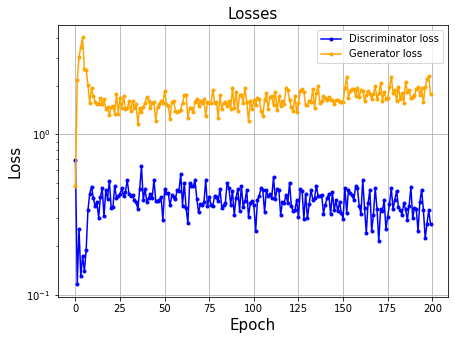

In [29]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(loss_discriminator_, linestyle='-', marker='.', color='b', label='Discriminator loss')
plt.semilogy(loss_generator_, linestyle='-', marker='.', color='orange', label='Generator loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('./imgs/classification/losses.svg', format='svg')
plt.show()

### Image generation

In [15]:
import imageio
from IPython.display import Image

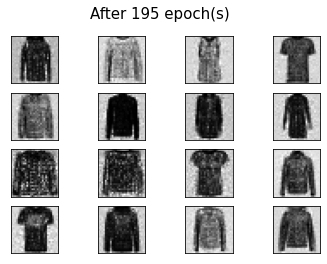

In [16]:
every_n = [i for i in range(num_epochs)]
for j in every_n[::5]:
    # Load network parameters
    generator.load_state_dict(torch.load(f'Models/GAN_generator_epoch_{j}.pth'))

    latent_space_samples = torch.randn(batch_size, 100).to(device)
    generated_samples = generator(latent_space_samples)

    generated_samples = generated_samples.cpu().detach()
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(f'After {j} epoch(s)',fontsize=15)    
    plt.savefig(f"./Img/GAN/{j}.png")

In [24]:
# Build GIF
every_n = [i for i in range(100)]
gif_files = [f"./Img/GAN/{j}.png" for j in every_n[::5]]
with imageio.get_writer('./Img/GAN.gif', mode='I') as writer:
    for filename in gif_files:
        image = imageio.imread(filename)
        writer.append_data(image)
    
gif = imageio.mimread('./Img/GAN.gif')
gif_speed_up = './Img/GAN.gif'
imageio.mimsave(gif_speed_up, gif, fps=2)


In [26]:
Image(url='./Img/GAN.gif')  

### CGAN